<img src="https://arbiterz.com/wp-content/uploads/2023/05/Bank_of_England_Logo.png" alt="Me :)" width="300"/>

# Employer Project: Bank of England

# Dream Team

#

<a id="Table_of_contents"></a>
# Table of Contents

### 1. Data ingestion and Initial Inspection

1.1 **[Introduction](#Introduction)**
   
1.2 **[Key information from the Metadata](#Key_information_from_the_Metadata)** \
   I. Data dictionary\
   II. Original and Final Data after cleaning
      
1.3 **[Setting up the Notebook workflow](#Setting-up-the-Notebook-workflow)** \
    I. Imports\
    II. Configuration settings and constants\
    III. Functions to load and save data

1.4 **[Sense Checking Raw Data](#Sense-Checking-Raw-Data)**


> **Critical: Economic Indicator selection and rationale**


### 2. Data cleaning and Text data Preprocessing 

2.1 **[Data Cleaning](#Data-Cleaning)**

2.2 **[Sense Checking resulting DataFrames](#Sense_Checking_resulting_DataFrames)**

2.2 **[Text data Preprocessing](#Text_data_Preprocessing)**


> **Objective:** Clean DataFrames, saved as .csv files

### 3. Exploratory Analysis and Context discoveries

3.1 **[Exploratory Data Analysis (EDA)](#Exploratory_Data_Analysis_(EDA))** \
    I. Data Distribution Visualisations\
    II. Summary Statistics for economic indicators\
    III. Outliers and Distribution
    
3.2 **[Time Series Visualisations](#Time_Series_Visualisations)** 


> **objective:** Economic Trends and Patterns


### 4. Sentiment Analysis on Speech Data

4.1 **[Naive Bayes Sentiment Classifier](#Naive_Bayes_Sentiment_Classifier)** \
    I. WordClouds and Frequency Distribution\
    II. Polarity and Sentiment Score\
    III. Top 20 Positive and Negative Speeches
   
4.2 **[Loughran and McDonald Sentiment Word List](#Loughran_and_McDonald_Sentiment_Word_Lists)**

4.3 **[Exploratory Data Visualisations](#4_Exploratory_Data_Visualisations)** \
    I. Timeline and Speech Sentiment Changes \
    II. Pattern Investigation


> **Objective:** Patterns and trends


#

# 1. Data ingestion and Initial Inspection

<a id="Introduction"></a>
## 1.1 Introduction

This notebook is designed as draft one of three. The purpose of this notebook is to inspect and assess the quality of data provided for a series of in-depth analyses. It begins with an introduction to the dataset metadata, and initial quality observations, establishing a clear understanding of data structure and assumptions. The workflow then covers setup, including imports and configurations, followed by initial sense-checking of raw data to ensure relevance, completeness, and consistency. Key events and economic indicators are examined to validate their suitability for further analysis. Finally, data cleaning, text preprocessing, and exploratory visualisations provide insights into data trends, preparing clean DataFrames for subsequent, more detailed analyses.

**Stages of analysis:**

- Data ingestion and inspection
- Data Cleaning and Text Data Preprocessing
- Exploratory Data Analysis and Context Discoveries
- Initial Senitment Analysis



  > **Economic Indicator selection and rationale**
>   
> The selected indicators are useful for studying BoE speech sentiment because they highlight core economic conditions that influence policy tone:
> 1. *GDP Rate*: Reflects economic growth; strong growth aligns with positive sentiment.
> 2. *CPI Rate*: Tracks inflation; rising rates may prompt cautious, hawkish tones.
> 3. *Unemployment Rate*: Indicates labor market health; high unemployment can lead to cautious sentiment.
> 4. *Weekly Earnings Rate*: Wage growth impacts consumer spending; strong growth may mean tighter policy.
> 5. *Redundancies*: High redundancies indicate economic stress, often leading to supportive tone.
> 6. *Bank Rate*: The BoE’s rate affects sentiment; lower rates imply a supportive stance.
> 7. *Gilt Purchases*: Large purchases suggest stimulus, aligning with cautious sentiment.
> 8. *Bond Purchases*: Reflect economic support; high levels indicate interventionist tone.
> 9. *Asset Purchase Decisions*: Show the BoE’s approach to monetary support, influencing overall tone.
>
> These indicators provide context for the BoE’s policy tone in response to economic conditions.

##

<a id="Key_information_from_the_Metadata"></a>
## 1.2 Key information from the metadata:

### I. Data dictionary

- *all_speeches and sentiment_word_list datasets*

The **all_speeches** dataset includes the following fields: *reference*, *country*, *date*, *author*, *is_gov*, and *text*.

The **sentiment_word_list** dataset contains sentiment categories: *Negative*, *Positive*, *Uncertain*, *Litigious*, *Strong*, *Weak*, and *Constraining*.

Both *all_speeches* and *sentiment_word_list* datasets were provided by the Bank of England.


- *economic_indicators dataset*

The **economic_indicators** dataset has been sourced from ONS data and collated in an Excel file. It tracks key metrics like growth, inflation, labor market trends, wages, redundancies, interest rates, and asset purchases, essential for understanding the Bank of England’s (BoE) economic outlook.

###

### II. Original and Final Data after cleaning

The analysis begins with three primary datasets provided in *BoE_1*: 

- **all_speeches.csv**: Loaded as the *all_speeches* DataFrame and processed to create two cleaned files—*clean_speeches.csv* and *processed_speeches.csv Together with the sentiment_wordlist DF they generated *loughran_mcdonald_sentimentscore.csv* for sentiment analysis.*.
- **economic_indicators.xlsx**: Loaded as the *economic_indicators* DataFrame, resulting in the cleaned file *clean_economic_indicators.csv*.
- **sentiment_wordlist.xlsx**: Loaded as the *sentiment_wordlist* DataFrame, resulting in *clean_wordlist..sis.

Each dataset underwent cleaning and filtering to prepare refined DataFrames for further analysis.


##

<a id="Setting-up-the-Notebook-workflow"></a>
## 1.3 Setting up the Notebook workflow

### I. Imports

In [2]:
# Data Manipulation and Analysis
import pandas as pd  
import numpy as np
import pmdarima as pm
import re

# Utility and System Management
import os 
import sys 
import subprocess 
import logging  
from datetime import datetime 

# Statistical Modeling and Analysis
import math
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from statsmodels.formula.api import ols 
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tsa.stattools import adfuller  
from scipy import stats 
from scipy.spatial.distance import cdist  
from scipy.stats import shapiro, norm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.stats.diagnostic import acorr_ljungbox

# Visualisation
import matplotlib.pyplot as plt  
import matplotlib.cm as cm 
import seaborn as sns  
from wordcloud import WordCloud
from IPython.display import display, Markdown, HTML
from matplotlib.backends.backend_pdf import PdfPages

# Machine Learning (ML) Algorithms and Evaluation
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.ensemble import RandomForestRegressor  
from sklearn.cluster import KMeans 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, 
    accuracy_score, confusion_matrix, classification_report, silhouette_score)
from sklearn.model_selection import (
    train_test_split, cross_val_score, learning_curve)
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Natural Language Processing (NLP)
import nltk  
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import (AutoTokenizer, AutoModelForSequenceClassification, pipeline)
from transformers import BertTokenizer, BertForSequenceClassification 
import spacy

# Warnings and Settings
import warnings  #
warnings.filterwarnings("ignore") 
plt.rcParams['figure.figsize'] = [15, 10]  


###

### II. Configuration settings and constants

In [5]:
# To print your directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\user\Desktop\BoE\Data\core_data_sets


In [6]:
# Configuration settings and constants

# Suppress FutureWarning
warnings.filterwarnings("ignore")

# Suppress informational messages
logging.getLogger('matplotlib').setLevel(logging.WARNING)

# Insert your own directory where data files are stored. Use \\
# sign to separate in the path. 
DATA_PATH = (r'C:\Users\user\Desktop\BoE\Data\core_data_sets')  
# Directory path where output files will be saved
OUTPUT_PATH = DATA_PATH
# Ensure the directories exist
LOG_FILE = os.path.join(OUTPUT_PATH, 'analysis.log')  # Log file path

os.makedirs(DATA_PATH, exist_ok=True)
os.makedirs(OUTPUT_PATH, exist_ok=True)

# Set up logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s', handlers=[
    logging.FileHandler(LOG_FILE),
    logging.StreamHandler()
])

# Version information
__version__ = "1.0.0"

# Print version
print(f"Current version: {__version__}")

print("Configuration settings:")
print(f"DATA_PATH: {DATA_PATH}")
print(f"OUTPUT_PATH: {OUTPUT_PATH}")
print(f"Output path exists: {os.path.exists(OUTPUT_PATH)}")
print(f"Output path is writable: {os.access(OUTPUT_PATH, os.W_OK)}")
print(f"LOG_FILE: {LOG_FILE}")

Current version: 1.0.0
Configuration settings:
DATA_PATH: C:\Users\user\Desktop\BoE\Data\core_data_sets
OUTPUT_PATH: C:\Users\user\Desktop\BoE\Data\core_data_sets
Output path exists: True
Output path is writable: True
LOG_FILE: C:\Users\user\Desktop\BoE\Data\core_data_sets\analysis.log


###

### III. Functions to load and save data

In [10]:
def load_multiple_files(file_paths):
    dataframes = {}
    
    for file_path in file_paths:
        try:
            file_name = file_path.split('/')[-1].split('.')[0]
            if file_path.endswith('.csv'):
                df = pd.read_csv(file_path)
            elif file_path.endswith('.xlsx') or file_path.endswith('.xls'):
                df = pd.read_excel(file_path)
            else:
                logging.warning(f"Unsupported file format: {file_path}")
                continue

            dataframes[file_name] = df
            logging.info(f"Data loaded successfully from {file_path}")
        except Exception as e:
            logging.error(f"Error loading data from {file_path}: {str(e)}")

    return dataframes


In [12]:
file_list = ['all_speeches.csv', 'economic_indicators.xlsx', 'sentiment_wordlist.xlsx']
dataframes_dict = load_multiple_files(file_list)

2024-11-18 14:23:04,330 - INFO - Data loaded successfully from all_speeches.csv
2024-11-18 14:23:04,935 - INFO - Data loaded successfully from economic_indicators.xlsx
2024-11-18 14:23:05,308 - INFO - Data loaded successfully from sentiment_wordlist.xlsx


In [14]:
# Function to save results
def save_results(df_list, file_path):
    if df is None:
        logging.error(f"Cannot save results to {file_path}: DataFrame is None")
        return
    try:
        logging.info(f'Saving results to {file_path}')
        df.to_csv(file_path, index=False)
        logging.info(f'Successfully saved results to {file_path}')
    except Exception as e:
        logging.error(f"Error saving file to {file_path}: {str(e)}")
        raise
        
# Optional, to save it to pickle for faster file handling
# def save_to_pickle(df, file_path):
    #logging.info(f'Saving DataFrame to {file_path}')
    #df.to_pickle(file_path)

# def load_from_pickle(file_path):
    #logging.info(f'Loading DataFrame from {file_path}')
    #return pd.read_pickle(file_path)

# Utility function to save plots
def save_plot(filename):
    plt.savefig(filename, bbox_inches='tight')
    print(f"Plot saved to {filename}")

In [16]:
def save_plots_to_pdf(plot_functions, pdf_path=None):
    """
    Generates and saves multiple plots to a single PDF file if a path is provided.
    """
    if pdf_path:
        with PdfPages(pdf_path) as pdf:
            for plot_func in plot_functions:
                # Clear any existing figures
                plt.close('all') 
                # Call the plotting function to create the plots
                plot_func()
                # Save all open figures to the PDF
                for figure in [plt.figure(i) for i in plt.get_fignums()]:
                    pdf.savefig(figure)
                # Close all figures after saving
                plt.close('all')
        print(f"Plots saved to {pdf_path}")
    else:
        # Display the plots if no path is specified
        for plot_func in plot_functions:
            plot_func()

# Using the save_plots_to_pdf function
# plot_functions = [plot1, plot2]
# save_plots_to_pdf(plot_functions, pdf_path="output_plots.pdf")

In [18]:
# Load the datasets
economic_indicators = pd.read_excel('economic_indicators.xlsx')
all_speeches = pd.read_csv('all_speeches.csv')
sentiment_wordlist = pd.read_excel('sentiment_wordlist.xlsx')

##

<a id="Sense-Checking-Raw-Data"></a>
# 1.4 Sense Checking Raw Data

In [21]:
def process_dataframe(df, show_description=True):
    """
    Function to inspect and process the DataFrame.
    
    Steps:
    1. View the DataFrame (first 5 rows).
    2. Show the shape of the DataFrame.
    3. Check for missing values.
    4. Display metadata information.
    5. Show descriptive statistics for numerical columns-.
    """
    # View the first 5 rows of the DataFrame
    print('\033[1mFirst 5 rows of the DataFrame:\033[0m')
    print(df.head())

    # Investigate the shape of the DataFrame
    print('\n\033[1mShape of the DataFrame:\033[0m', df.shape)
    
    # Check for missing values in each column
    print('\n\033[1mMissing values for each column:\033[0m')
    print(df.isna().sum())
    
    # Show metadata of the DataFrame
    print('\n\033[1mDataFrame info:\033[0m')
    df.info()

    # Show the column names
    print('\n\033[1mColumn Names:\033[0m')
    print(df.columns.tolist())

    # Show descriptive statistics for numerical columns
    if show_description:
        print('\n\033[1mDescriptive statistics of the numerical data:\033[0m')
        print(df.describe().round(2))

    return df

In [23]:
# Call the function for the DataFrames

# List of DataFrames to process
df_list = [all_speeches, economic_indicators, sentiment_wordlist ]
df_names = ['all_speeches', 'economic_indicators', 'sentiment_wordlist']

# Process each DataFrame
for df, name in zip(df_list, df_names):
    print(f"\nProcessing DataFrame: {name}")
    process_dataframe(df, show_description=True)


Processing DataFrame: all_speeches
First 5 rows of the DataFrame:
      reference    country        date                               title  \
0  r901128a_BOA  australia  1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia  1991-10-03                                       
2  r920314a_BOA  australia  1992-03-14                                       
3  r920529a_BOA  australia  1992-05-29                                       
4  r920817a_BOA  australia  1992-08-17                                       

   author  is_gov                                               text  
0  fraser       0  They would no doubt argue that to have two obj...  
1  fraser       0  Today I wish to talk about real interest rates...  
2  fraser       0  I welcome this opportunity to talk about prosp...  
3  fraser       0  It is a pleasure to have this opportunity to a...  
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...  

Shape of the DataFrame: (7721, 7)

Mi

**[Table of Contents](#Table_of_contents)**

#

<a id="Data-Cleaning"></a>
# 2. Data Cleaning and Text Data Preprocessing

<a id="Data_Cleaning"></a>
## 2.1 Data Cleaning

- *speeches DataFrame*

In [25]:
# Filter the DataFrame for only United Kingdom
speeches = all_speeches[all_speeches['country'].str.lower() == 'united kingdom']

# Ensure 'date' is in datetime format
speeches['date'] = pd.to_datetime(speeches['date'], errors='coerce')

# Extract the year from the 'date' column and create the 'year' column
speeches['year'] = speeches['date'].dt.year

# Sort the speeches in ascending way
speeches = speeches.sort_values(by='date')

# Convert 'reference' to string format
speeches['reference'] = speeches['reference'].astype('object')

# Convert 'author' to category to optimize for repeated names
speeches['author'] = speeches['author'].astype('category')

# Convert 'is_gov' to boolean
speeches['is_gov'] = speeches['is_gov'].astype('bool')

# Convert 'text' to string for text data handling
speeches['text'] = speeches['text'].astype('string')

# Convert 'year' to int32 for memory efficiency
speeches['year'] = speeches['year'].astype('int32')

# Drop unecessary columns
speeches = speeches.drop(['country', 'title'], axis=1)

# Reset the index
speeches.reset_index(drop=True, inplace=True)


In [27]:
# Replace the incorrect date '1900-01-01' and any date in 1900 with '2000-02-10'
speeches['date'] = speeches['date'].where(speeches['date'].dt.year != 1900, pd.Timestamp('2000-02-10'))

# Update the 'year' column to reflect the corrected 'date'
speeches['year'] = speeches['date'].dt.year

# Check if there are still any rows with year 1900
if speeches['year'].eq(1900).any():
    print(speeches[speeches['year'] == 1900])  # This should return an empty DataFrame

# Remove duplicates if any
speeches.drop_duplicates(inplace=True)

# Display the column names
print(f"Df's columns:")
print(speeches.columns.tolist())

# Ensure no missing data
missing_data = speeches.isnull().sum()
print(f"\nCount of missing values:")
print(missing_data) 


Df's columns:
['reference', 'date', 'author', 'is_gov', 'text', 'year']

Count of missing values:
reference    0
date         0
author       0
is_gov       0
text         0
year         0
dtype: int64


In [29]:
# Drop duplicate speeches
print(f"\nDuplicates before removal: {speeches['text'].duplicated().sum()}")

# Drop duplicate rows based on the 'text' column
speeches = speeches.drop_duplicates(subset='text')

# Verify that duplicates have been removed
print(f"Duplicates after removal: {speeches['text'].duplicated().sum()}")


Duplicates before removal: 7
Duplicates after removal: 0


In [31]:
# Calculate the length of text in each entry
speeches['text_length'] = speeches['text'].str.len()

# Display summary statistics of text lengths to understand distribution
print("Text Length Summary:")
print(speeches['text_length'].describe())

# Set a minimum threshold for text length (e.g., 750 characters) and filter entries below this threshold
threshold = 750
short_entries = speeches[speeches['text_length'] < threshold]

# Count and display the number of very short entries
print(f"\nTotal entries with text length below {threshold} characters: {short_entries.shape[0]}")

# Drop short entries from the dataset and reset index
speeches = speeches[speeches['text_length'] >= threshold].reset_index(drop=True)

# Display the new shape of the dataset
print(f"New dataset shape: {speeches.shape}")


Text Length Summary:
count          1202.0
mean      25965.84609
std      19189.692645
min            1292.0
25%          15444.25
50%           22459.5
75%          30510.75
max          239461.0
Name: text_length, dtype: Float64

Total entries with text length below 750 characters: 0
New dataset shape: (1202, 7)


- *economic_indicators DataFrame*

In [34]:
# Convert 'date' to datetime if it isn’t already
economic_indicators['date'] = pd.to_datetime(economic_indicators['date'], errors='coerce')

# Specify data types for each column for consistency
economic_indicators = economic_indicators.astype({
    'gdp': 'float64',
    'gdp_rate': 'float64',
    'cpi': 'float64',
    'cpi_rate': 'float64',
    'unemployment_rate': 'float64',
    'unemployment_rate_change': 'float64',
    'weekly_earning': 'float64',
    'weekly_earning_rate': 'float64',
    'redundancies': 'float64',
    'redundancies_rate_change': 'float64',
    'bank_rate': 'float64',
    'gilt_purchases_bn': 'float64',
    'bond_purchases': 'float64',
    'asset_purchase_decisions': 'float64'
})


- *sentiment_wordlist DataFrame*

In [37]:
# Preprocessing word list data
# Change all column names to lowercase
sentiment_wordlist.columns = sentiment_wordlist.columns.str.lower()

# Ensure all words are in lowercase for matching
sentiment_wordlist['word'] = sentiment_wordlist['word'].str.lower()

# Convert 'Word' to string format
sentiment_wordlist['word'] = sentiment_wordlist['word'].astype('string')

# Drop duplicates in the 'word' column, keeping only the first occurrence
sentiment_wordlist = sentiment_wordlist.drop_duplicates('word', keep='first').reset_index(drop=True)


In [39]:
# Check if any binary columns contain values other than 0 or 1
binary_columns = ['negative', 'positive', 'uncertainty', 'litigious', 'strong', 'weak', 'constraining']
invalid_values = sentiment_wordlist[binary_columns].apply(lambda col: ~col.isin([0, 1])).any().any()

if invalid_values:
    print("There are values other than 0 and 1 in the binary columns.")
else:
    print("All values in the binary columns are 0 or 1.")

All values in the binary columns are 0 or 1.


- *Raw Data Visualisation*

In [42]:
def vis_check_data(df, file_name):
    try:
        # Data Shape
        print(f"Sense checking data for {file_name}")
        
        print(f"\n{file_name} - Data Shape: {df.shape}")
        
        # Plot histograms for numerical columns
        numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        if numerical_cols:
            print("\nPlotting histograms for numerical columns...")
            df[numerical_cols].hist(figsize=(10, 10))
            plt.suptitle(f'Histograms for {file_name} - Numerical Columns')
            plt.show()

        # Plot count plots for non-numerical (categorical) columns
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        if categorical_cols:
            print("\nPlotting count plots for categorical columns...")
            for col in categorical_cols:
                # Get top 10 and bottom 10 unique values
                value_counts = df[col].value_counts()
                if len(value_counts) > 20:
                    top_10 = value_counts.nlargest(10)
                    bottom_10 = value_counts.nsmallest(10).sort_values(ascending=False)
                    value_counts = pd.concat([top_10, bottom_10])

                plt.figure(figsize=(10, 6))
                sns.countplot(y=df[col], order=value_counts.index)
                plt.title(f'Count Plot of {col} in {file_name}')
                plt.xlabel('Count')
                plt.ylabel(col)
                
                # Add subtitle below the title
                plt.text(0.5, -0.15, 'Note: For larger sets, the top and bottom 10 are displayed',
                         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, style='italic')

                plt.tight_layout()
                plt.show()

        # Plot all columns (just for a general view)
        print("\nPlotting all columns in the dataset...")
        df.plot(figsize=(10, 6))
        plt.title(f'Plot of all columns in {file_name}')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error during sense check for {file_name}: {str(e)}")

Sense checking data for speeches

speeches - Data Shape: (1202, 7)

Plotting histograms for numerical columns...


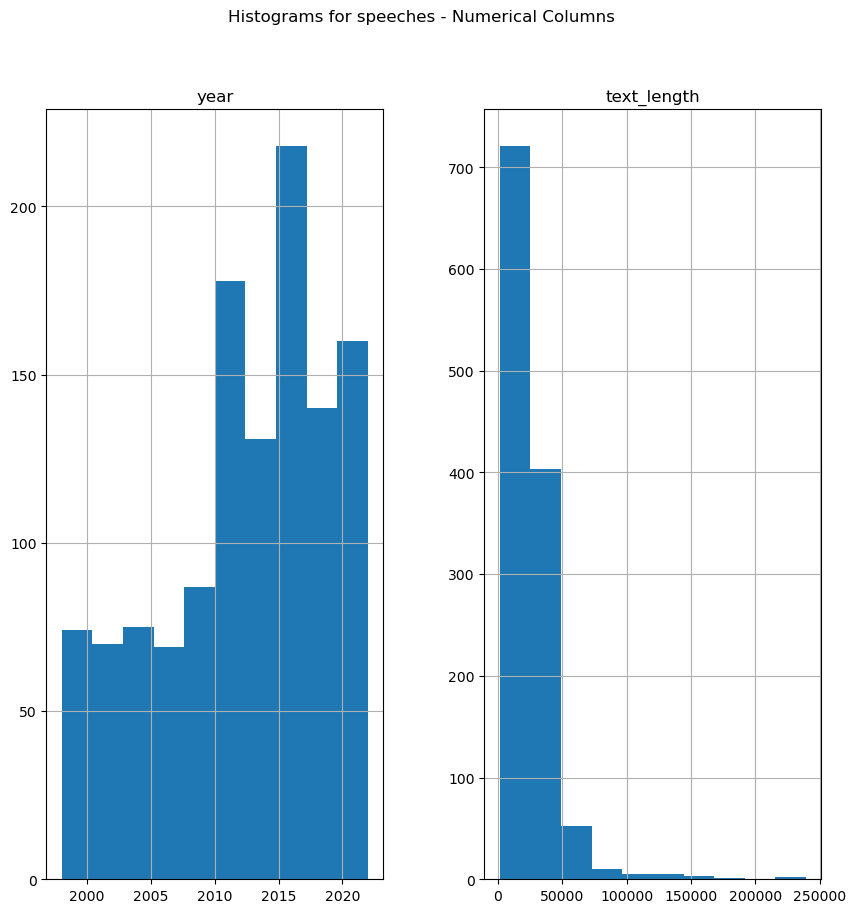


Plotting count plots for categorical columns...


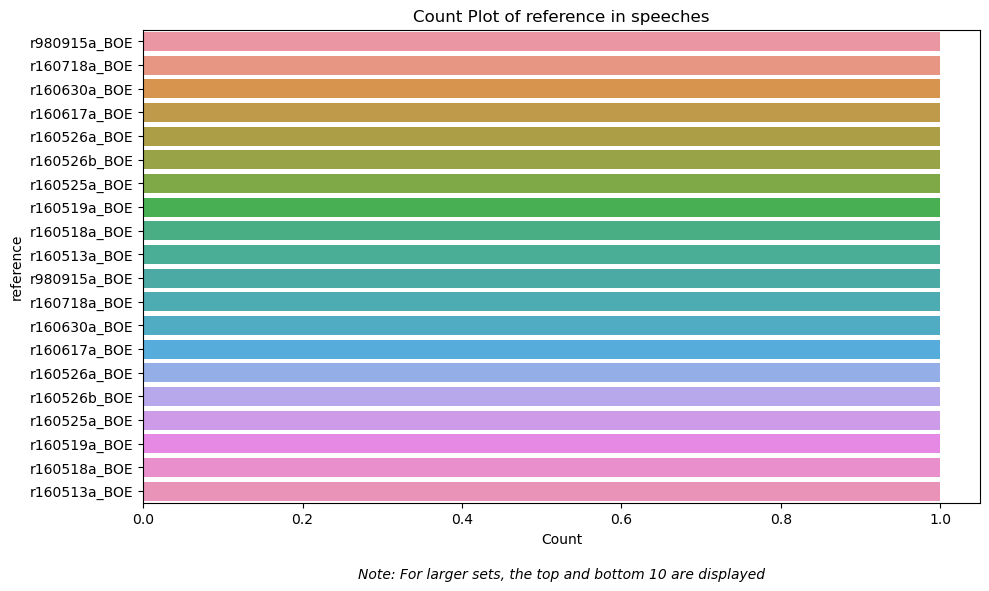

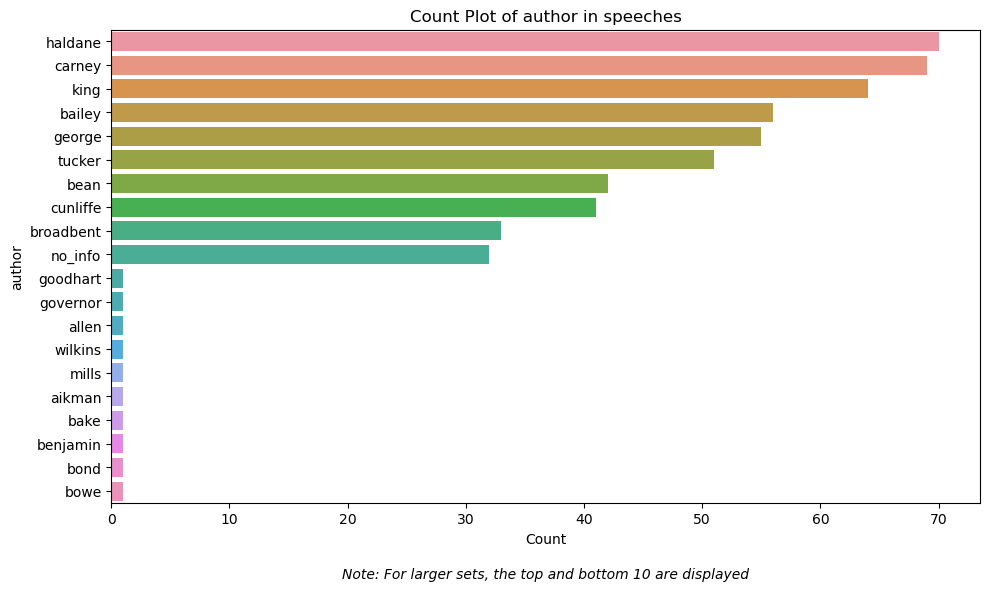


Plotting all columns in the dataset...


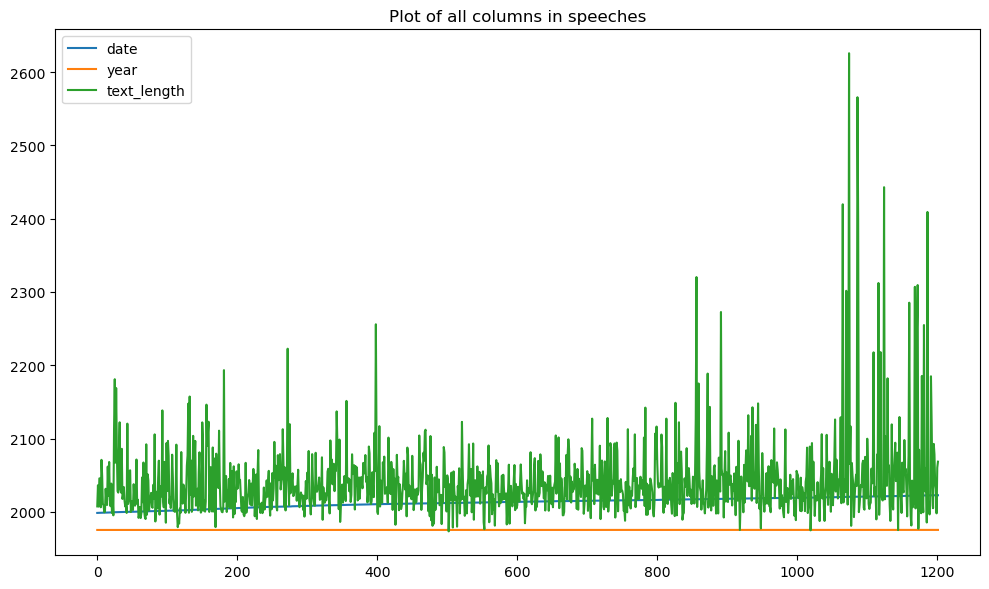

Sense checking data for economic_indicators

economic_indicators - Data Shape: (296, 15)

Plotting histograms for numerical columns...


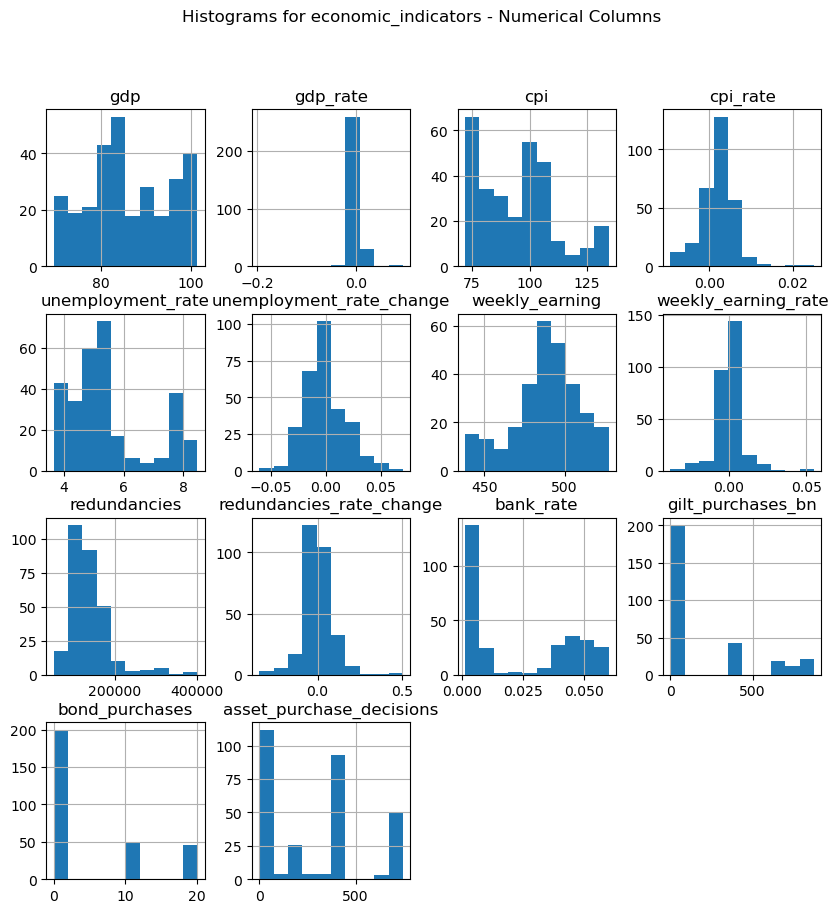


Plotting all columns in the dataset...


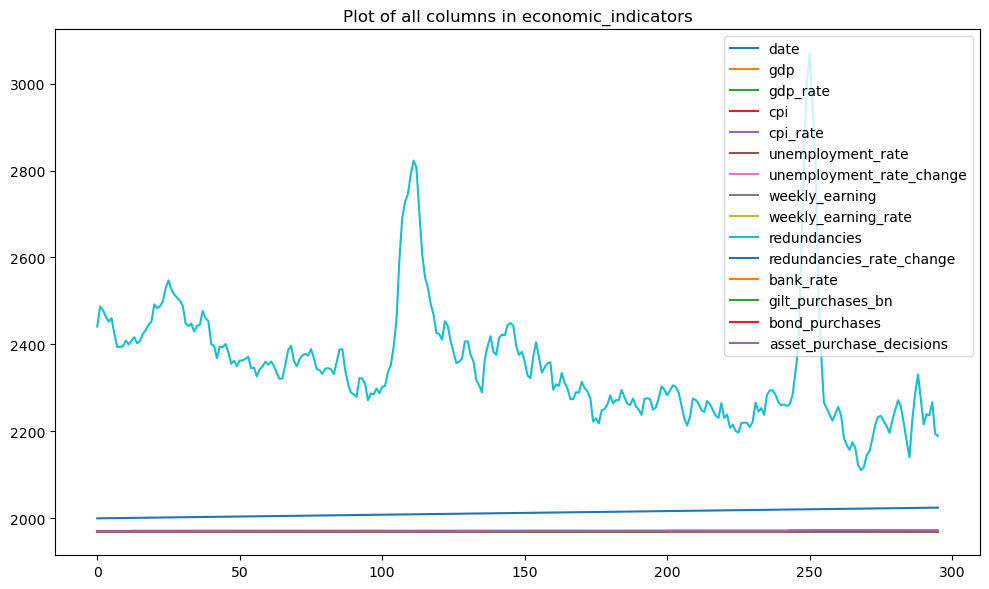

Sense checking data for sentiment_wordlist

sentiment_wordlist - Data Shape: (3880, 8)

Plotting histograms for numerical columns...


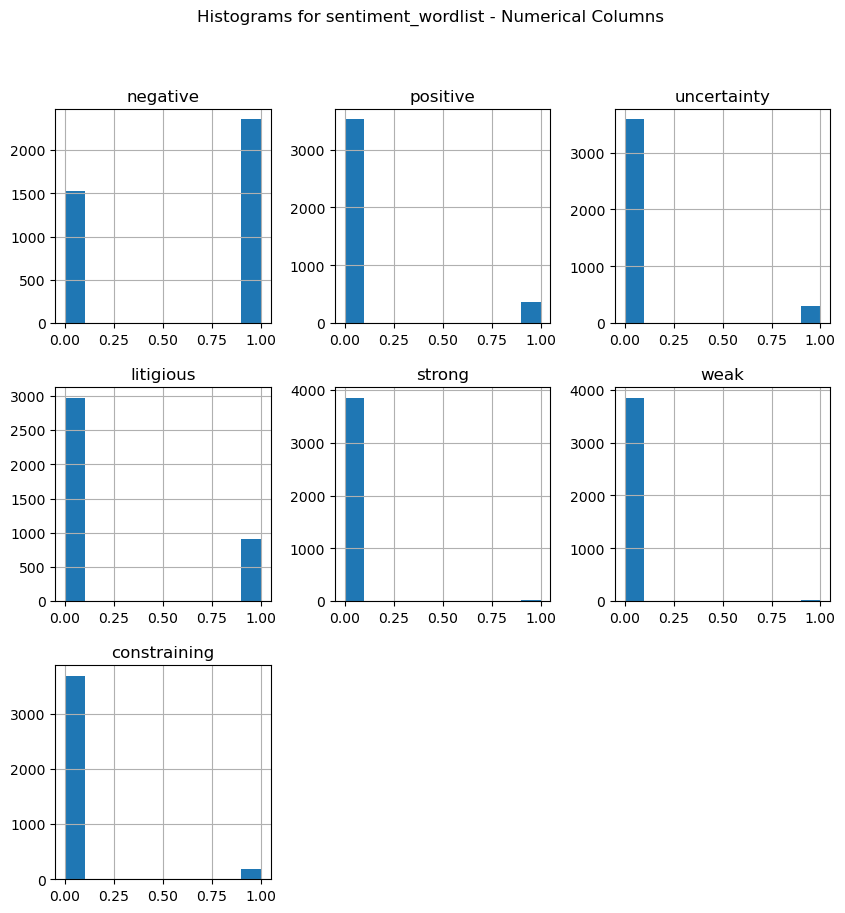


Plotting all columns in the dataset...


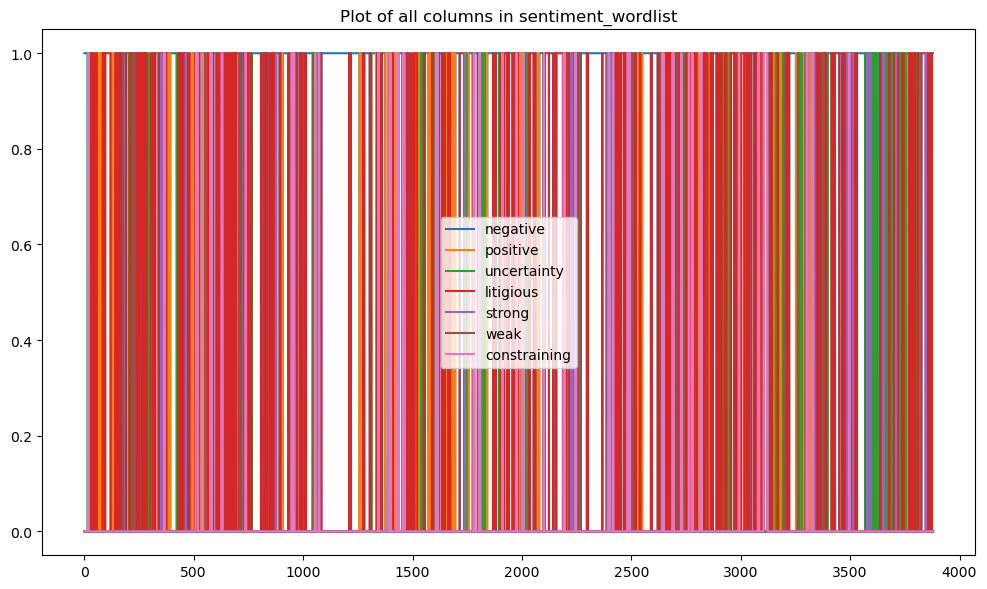

In [44]:
vis_check_data(speeches, 'speeches')
vis_check_data(economic_indicators, 'economic_indicators')
vis_check_data(sentiment_wordlist, 'sentiment_wordlist')

Sense checking data for speeches

speeches - Data Shape: (1202, 7)

Plotting histograms for numerical columns...


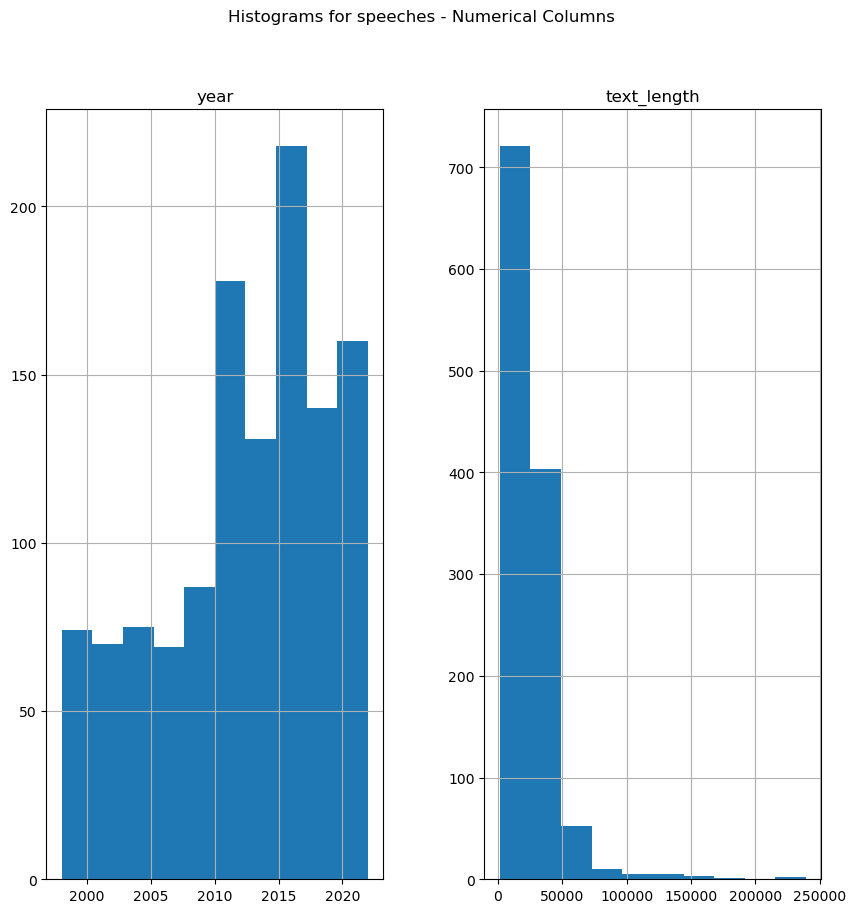


Plotting count plots for categorical columns...


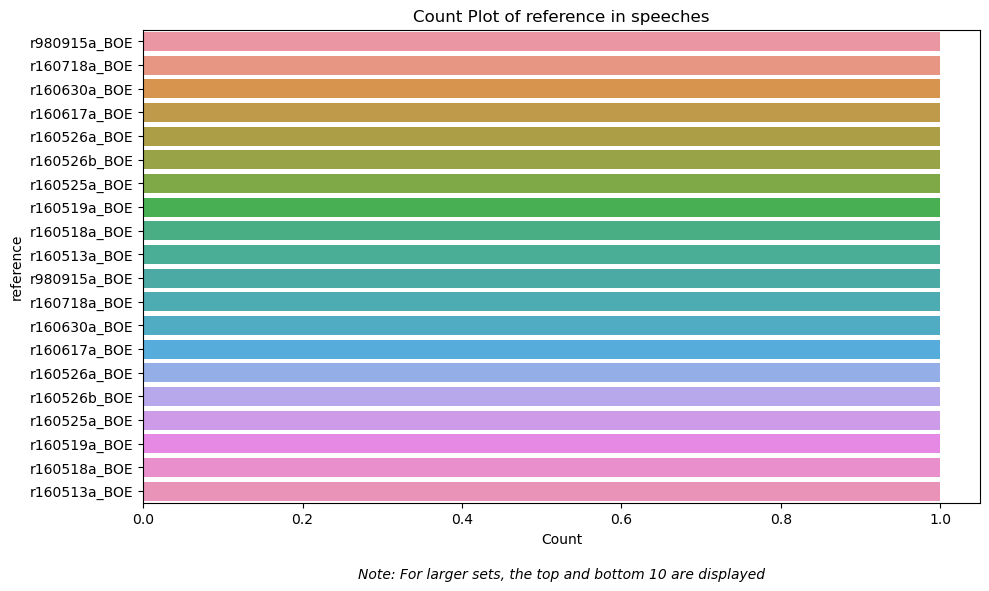

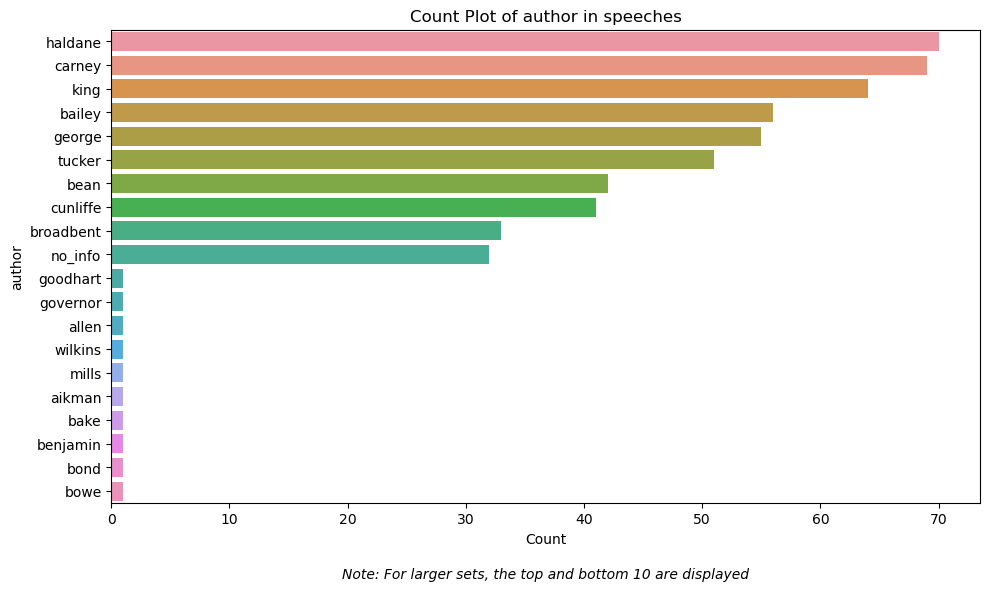


Plotting all columns in the dataset...


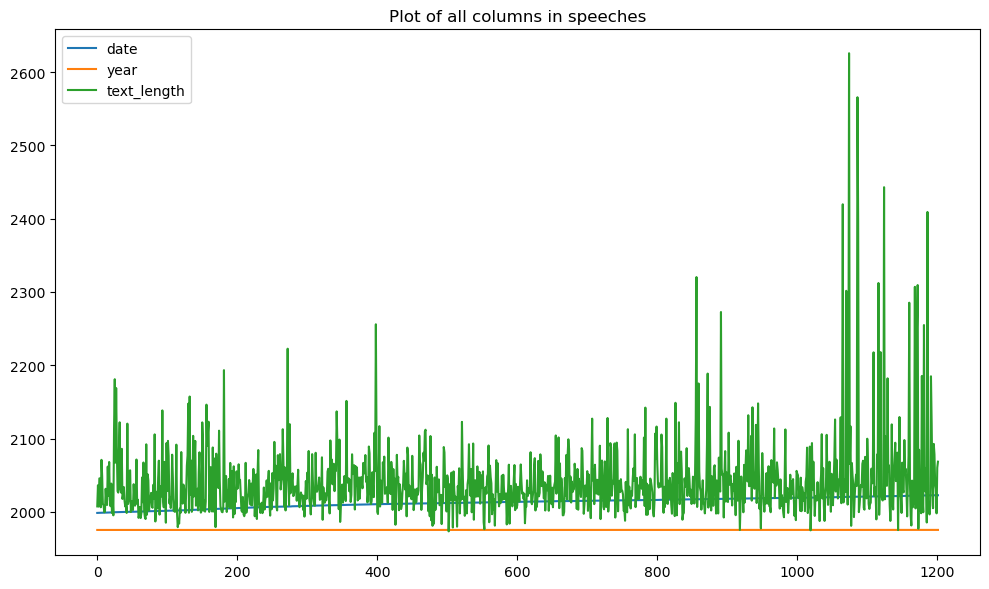

Sense checking data for economic_indicators

economic_indicators - Data Shape: (296, 15)

Plotting histograms for numerical columns...


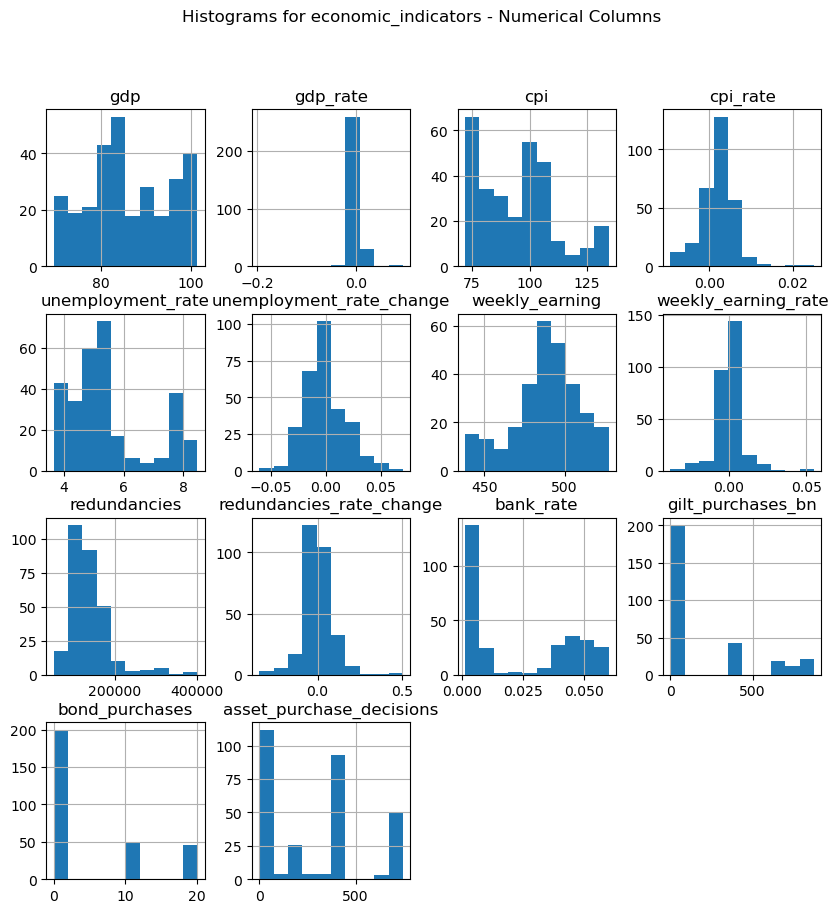


Plotting all columns in the dataset...


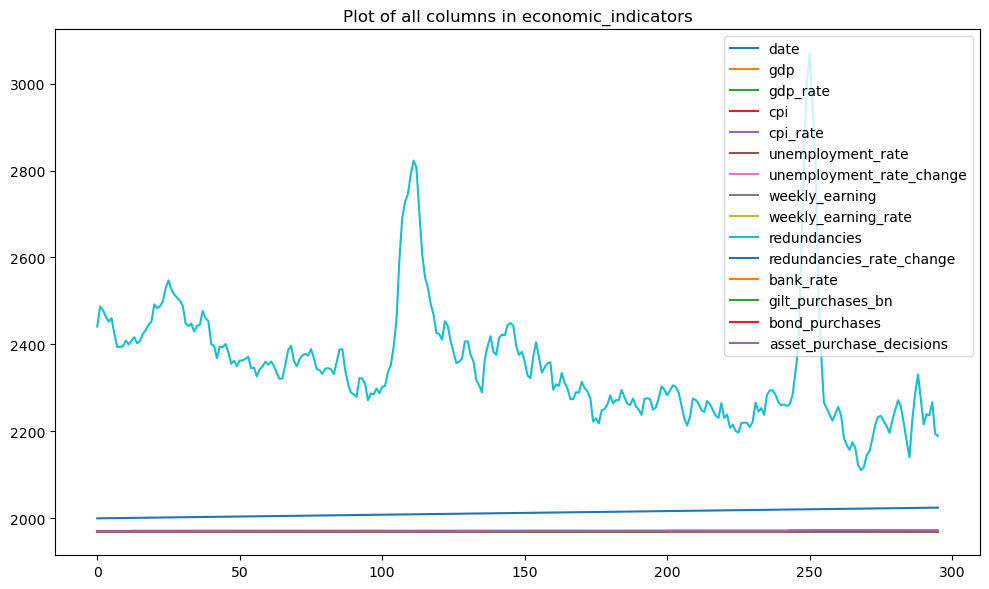

Sense checking data for sentiment_wordlist

sentiment_wordlist - Data Shape: (3880, 8)

Plotting histograms for numerical columns...


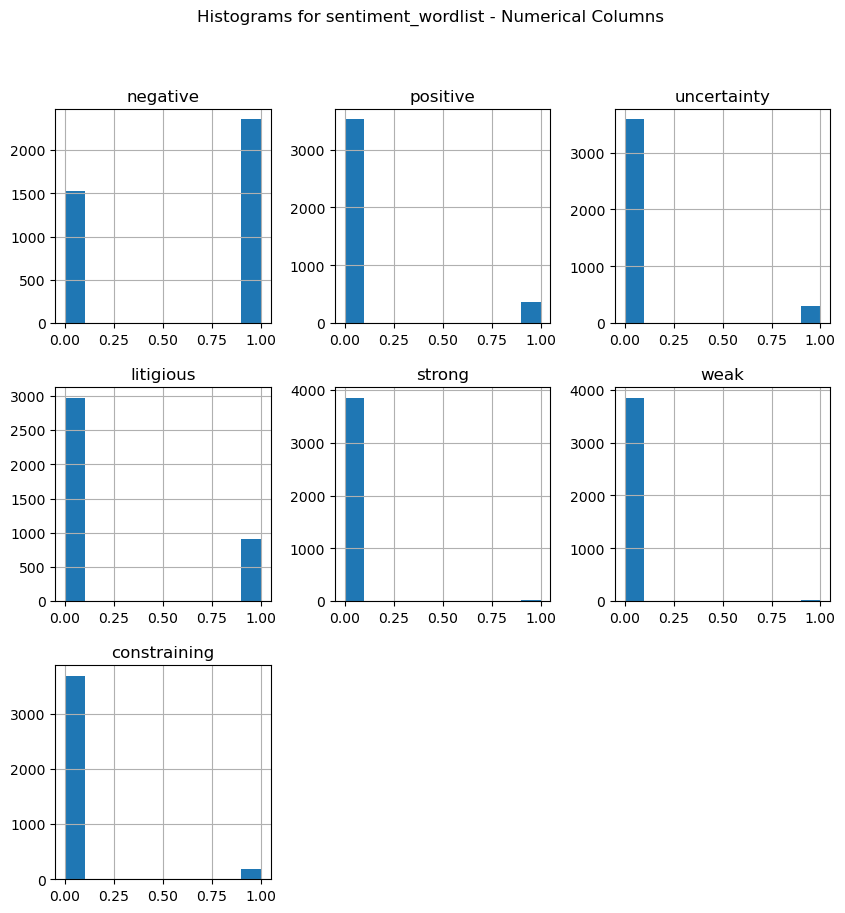


Plotting all columns in the dataset...


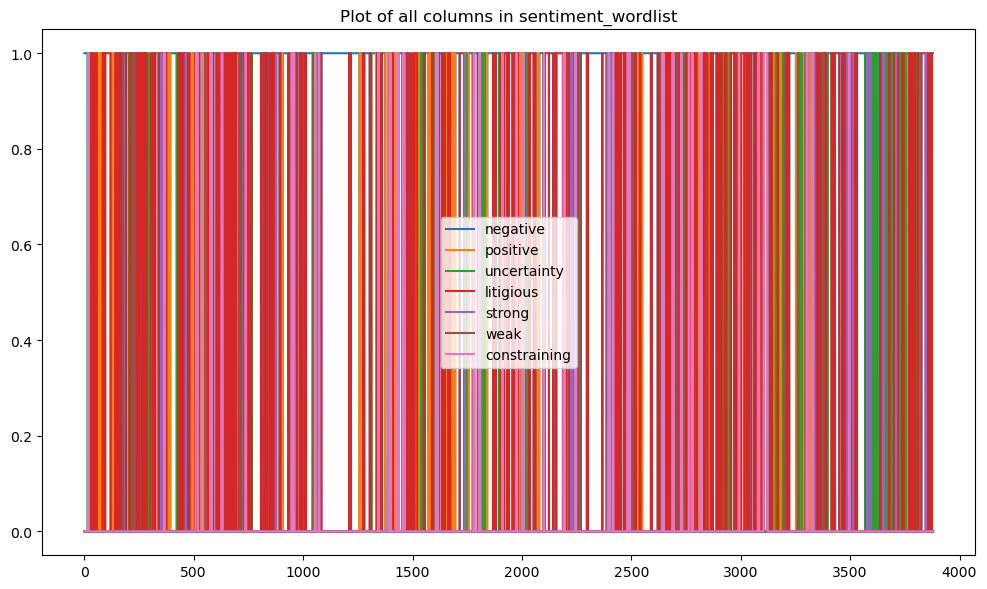

Plots saved to data_visualisations.pdf


In [46]:
# Create a PDF.
# Define a list of plotting functions with their arguments
plot_functions = [
    lambda: vis_check_data(speeches, 'speeches'),
    lambda: vis_check_data(economic_indicators, 'economic_indicators'),
    lambda: vis_check_data(sentiment_wordlist, 'sentiment_wordlist')
]

# Save plots to a single PDF
save_plots_to_pdf(plot_functions, pdf_path="data_visualisations.pdf")


In [48]:
# Create functions to remove whitespace, handle missing values, datetime, convert to lowercase, normalise and create consistent structure
# Step 1: Initial Data Cleaning
def clean_data(df, file_name):
    """
    Removes whitespace from column headers and string data, logging before/after shapes.
    """
    try:
        logging.info(f'\nCleaning data in {file_name}')
        logging.info(f"Shape before cleaning: {df.shape}")
        df.columns = df.columns.str.strip()
        df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
        logging.info(f"Shape after cleaning: {df.shape}")
        return df
    except Exception as e:
        logging.error(f"Error cleaning data for {file_name}: {str(e)}")
        return df

# Step 2: Handle Missing Values
def handle_missing_values(df, strategy='mean', columns=None):
    """
    Handles missing values by filling based on a strategy or dropping rows with missing data.
    """
    try:
        if columns is None:
            columns = df.columns

        for column in columns:
            if strategy == 'mean' and pd.api.types.is_numeric_dtype(df[column]):
                df[column].fillna(df[column].mean(), inplace=True)
            elif strategy == 'median' and pd.api.types.is_numeric_dtype(df[column]):
                df[column].fillna(df[column].median(), inplace=True)
            elif strategy == 'mode':
                df[column].fillna(df[column].mode()[0], inplace=True)
            elif strategy == 'drop':
                df.dropna(subset=columns, inplace=True)

        return df
    except Exception as e:
        logging.error(f"Error handling missing values: {str(e)}")
        return df

# Step 3: Standardize Data Formats (dates and numerical values)
def standardize_formats(df, date_columns=None, number_columns=None):
    """
    Converts date columns to datetime and number columns to numeric format.
    """
    try:
        if date_columns:
            for col in date_columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')

        if number_columns:
            for col in number_columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')

        return df
    except Exception as e:
        logging.error(f"Error standardizing formats: {str(e)}")
        return df

# Step 4: Normalize Text Data
def normalize_text_data(df, columns=None):
    """
    Trims whitespace, converts to lowercase, and standardizes text data in specified columns.
    """
    try:
        if columns is None:
            columns = df.select_dtypes(include='object').columns.tolist()

        for column in columns:
            df[column] = df[column].str.strip().str.lower().replace('find_this', 'replace_with')
        
        return df
    except Exception as e:
        logging.error(f"Error normalizing text data: {str(e)}")
        return df

# Step 5: Ensure Consistent Structure
def ensure_consistent_structure(df, column_mapping=None, dtype_mapping=None):
    """
    Ensures consistency in column names and data types.
    """
    try:
        if column_mapping:
            df.rename(columns=column_mapping, inplace=True)

        if dtype_mapping:
            for column, dtype in dtype_mapping.items():
                df[column] = df[column].astype(dtype)

        return df
    except Exception as e:
        logging.error(f"Error ensuring consistent structure: {str(e)}")
        return df


# Step 6: Display the DataFrame for Inspection
def display_dataframe(df, name, num_rows=5):
    """
    Displays the first few rows of the DataFrame with a title.
    """
    try:
        if df is not None:
            logging.info(f'Displaying the first {num_rows} rows of {name}:')
            display(Markdown(f"### First {num_rows} rows of {name}:"))
            display(df.head(num_rows))
            display(Markdown("<br><br>"))
        else:
            logging.error(f"DataFrame {name} is None and cannot be displayed")
    except Exception as e:
        logging.error(f"Error displaying DataFrame: {str(e)}")


- *speeches DataFrame*

In [50]:
# speeches DataFrame cleaning actions:

clean_data(speeches,'speeches')

handle_missing_values(speeches, strategy='drop', columns=None)

display_dataframe(speeches, 'speeches', num_rows=5)

2024-11-16 16:56:34,093 - INFO - 
Cleaning data in speeches
2024-11-16 16:56:34,093 - INFO - Shape before cleaning: (1202, 7)
2024-11-16 16:56:34,101 - INFO - Shape after cleaning: (1202, 7)
2024-11-16 16:56:34,125 - INFO - Displaying the first 5 rows of speeches:


### First 5 rows of speeches:

reference       date   author  is_gov  \
0  r980915a_BOE 1998-09-15   george   False   
1  r981021b_BOE 1998-10-21   george   False   
2  r981021a_BOE 1998-10-21     king    True   
3  r981101a_BOE 1998-11-01     budd   False   
4  r981101b_BOE 1998-11-01  vickers   False   

                                                text  year  text_length  
0  Thank you, Chairman. I'm actually very pleased...  1998        13731  
1  It's a great pleasure to be here in the beauti...  1998        24263  
2  Few industries have suffered more from volatil...  1998        13678  
3  My topic this evening is the use of forecasts ...  1998        27679  
4  Six years ago this week, sterling left the exc...  1998        27693

<br><br>

- *economic_indicators DataFrame*

In [52]:
# economic_indicators DataFrame cleaning actions:

# Step 1: Clean Data
clean_data(economic_indicators,'economic_indicators')

# Step 2: Standardize Formats - Convert date and numerical columns to appropriate formats
standardize_formats(
    economic_indicators, 
    date_columns=['date'], 
    number_columns=['gdp', 'gdp_rate', 'cpi', 'cpi_rate', 'unemployment_rate', 'unemployment_rate_change', 
                    'weekly_earning', 'weekly_earning_rate', 'redundancies', 'redundancies_rate_change', 'bank_rate',
                    'gilt_purchases_bn', 'bond_purchases', 'asset_purchase_decisions'])

# Step 3: Handle Missing Values - Fill missing values using the specified strategy
handle_missing_values(economic_indicators, strategy='mean', columns=['gdp', 'gdp_rate', 'cpi', 'cpi_rate', 
                                                                     'unemployment_rate', 'unemployment_rate_change', 'weekly_earning', 
                                                                     'weekly_earning_rate', 'redundancies', 'redundancies_rate_change',
                                                                     'bank_rate', 'gilt_purchases_bn', 'bond_purchases', 'asset_purchase_decisions'])

# Step 4: Display the DataFrame to verify the results
display_dataframe(economic_indicators, 'economic_indicators', num_rows=5)

2024-11-16 16:56:34,196 - INFO - 
Cleaning data in economic_indicators
2024-11-16 16:56:34,196 - INFO - Shape before cleaning: (296, 15)
2024-11-16 16:56:34,212 - INFO - Shape after cleaning: (296, 15)
2024-11-16 16:56:34,212 - INFO - Displaying the first 5 rows of economic_indicators:


### First 5 rows of economic_indicators:

date      gdp  gdp_rate     cpi  cpi_rate  unemployment_rate  \
0 2000-01-01  69.9472  0.013554  71.936 -0.009351           5.866417   
1 2000-02-01  69.6997 -0.003538  72.159  0.003100           5.810690   
2 2000-03-01  69.5429 -0.002250  72.338  0.002481           5.792770   
3 2000-04-01  69.9213  0.005441  72.573  0.003249           5.694816   
4 2000-05-01  70.3622  0.006306  72.771  0.002728           5.638501   

   unemployment_rate_change  weekly_earning  weekly_earning_rate  \
0                  0.010358      488.258263             0.000648   
1                 -0.009499      488.258263             0.000648   
2                 -0.003084      488.258263             0.000648   
3                 -0.016910      488.258263             0.000648   
4                 -0.009889      488.258263             0.000648   

   redundancies  redundancies_rate_change  bank_rate  gilt_purchases_bn  \
0      172145.0                  0.072768     0.0550                0.0   
1      188991.0                  0.097859     0.0575                0.0   
2      185854.0                 -0.016599     0.0600                0.0   
3      180351.0                 -0.029609     0.0600                0.0   
4      176216.0                 -0.022928     0.0600                0.0   

   bond_purchases  asset_purchase_decisions  
0             0.0                       0.0  
1             0.0                       0.0  
2             0.0                       0.0  
3             0.0                       0.0  
4             0.0                       0.0

<br><br>

- *sentiment_wordlist DataFrame*

In [57]:
# sentiment_wordlist DataFrame cleaning actions:
# Step 1: Clean Data - Remove whitespace from column names and values
clean_data(sentiment_wordlist, 'sentiment_wordlist')

# Step 2: Standardize Formats - Ensure 'word' is of string type and other columns are integers
standardize_formats(
    sentiment_wordlist,
    date_columns=[],  # No date columns in this dataset
    number_columns=['negative', 'positive', 'uncertainty', 'litigious', 'strong', 'weak', 'constraining']
)

# Step 3: Handle Missing Values - Fill missing values in sentiment columns with 0 (if applicable)
handle_missing_values(
    sentiment_wordlist,
    strategy='mode',  # Using 'mode' as a backup, though for binary columns, this should fill with 0 if needed
    columns=['negative', 'positive', 'uncertainty', 'litigious', 'strong', 'weak', 'constraining']
)

# Step 4: Display the DataFrame to verify results
display_dataframe(sentiment_wordlist, 'sentiment_wordlist', num_rows=5)


2024-11-16 16:56:34,453 - INFO - 
Cleaning data in sentiment_wordlist
2024-11-16 16:56:34,453 - INFO - Shape before cleaning: (3880, 8)
2024-11-16 16:56:34,453 - INFO - Shape after cleaning: (3880, 8)
2024-11-16 16:56:34,466 - INFO - Displaying the first 5 rows of sentiment_wordlist:


### First 5 rows of sentiment_wordlist:

word  negative  positive  uncertainty  litigious  strong  weak  \
0       abandon         1         0            0          0       0     0   
1     abandoned         1         0            0          0       0     0   
2    abandoning         1         0            0          0       0     0   
3   abandonment         1         0            0          0       0     0   
4  abandonments         1         0            0          0       0     0   

   constraining  
0             0  
1             0  
2             0  
3             0  
4             0

<br><br>

##

<a id="Sense_Checking_resulting_DataFrames"></a>
## 2.2 Sense Checking resulting DataFrames

In [62]:
# Check the resulting DataFrames
df_list = [speeches, economic_indicators, sentiment_wordlist]
df_names = ['speeches', 'economic_indicators', 'sentiment_wordlist']

# Process each DataFrame
for df, name in zip(df_list, df_names):
    print(f"\nProcessing DataFrame: {name}")
    process_dataframe(df, show_description=True)


Processing DataFrame: speeches
First 5 rows of the DataFrame:
      reference       date   author  is_gov  \
0  r980915a_BOE 1998-09-15   george   False   
1  r981021b_BOE 1998-10-21   george   False   
2  r981021a_BOE 1998-10-21     king    True   
3  r981101a_BOE 1998-11-01     budd   False   
4  r981101b_BOE 1998-11-01  vickers   False   

                                                text  year  text_length  
0  Thank you, Chairman. I'm actually very pleased...  1998        13731  
1  It's a great pleasure to be here in the beauti...  1998        24263  
2  Few industries have suffered more from volatil...  1998        13678  
3  My topic this evening is the use of forecasts ...  1998        27679  
4  Six years ago this week, sterling left the exc...  1998        27693  

Shape of the DataFrame: (1202, 7)

Missing values for each column:
reference      0
date           0
author         0
is_gov         0
text           0
year           0
text_length    0
dtype: int64

DataFrame

In [64]:
# Apply the function to save the resulting DataFrames
df_list = [speeches, economic_indicators, sentiment_wordlist]
file_path = r'C:\Users\user\Desktop\BoE\Data\core_data_set'

save_results(df_list, file_path)

2024-11-16 16:56:37,737 - INFO - Saving results to C:\Users\user\Desktop\BoE\Data\core_data_set
2024-11-16 16:56:37,756 - INFO - Successfully saved results to C:\Users\user\Desktop\BoE\Data\core_data_set


In [66]:
# Save the filtered DataFrame to CSV

speeches.to_csv('clean_speeches.csv', index=False)
sentiment_wordlist.to_csv('clean_wordlist.csv', index=False)
economic_indicators.to_csv('clean_economic_indicators.csv', index=False)

**This collection of datasets provides a robust foundation for analyzing speeches, tracking economic indicators, and performing sentiment analysis.**

### Data Observation

#### Speeches Data
- **Data Completeness**: No missing values across columns.
- **Date Range**: Covers speeches from September 15, 1998, to October 20, 2022.
- **Memory Usage**: Efficient storage at 49.5 KB due to optimized data types (bool, category, int32).
- **Distribution**: The median speech year is 2013, with most speeches occurring between 2012 and 2017.

#### Economic Indicators Data
- **Data Completeness**: Fully complete, with no missing values.
- **Date Range**: Covers January 1, 2000, to September 1, 2024.
- **Descriptive Statistics**:
- **GDP**: Average of 86.35, ranging from 69.54 to 101.38.
- **CPI**: Mean of 95.28, showing a consistent upward trend over time.
- **Unemployment Rate**: Ranges from 3.65% to 8.47%, clustering around 5%.
- **Bank Rate**: Low overall, averaging 0.02, with a maximum of 0.06.
- **Bond Purchases**: Predominantly government bonds, skewed towards lower values.
- **Weekly Earnings**: Many entries are zero (potentially non-recorded), with recorded values averaging 468.98.

#### Sentiment Wordlist Data
- **Data Completeness**: One missing value in the "word" column; all other columns are complete.
- **Sentiment Distribution**:
- **Negative**: 61% of words are tagged as negative.
- **Positive**: Only 9% of words have a positive tag.
- **Uncertainty and Litigious**: Significant tags, with approximately 8% and 23%, respectively.
- **Sparse Tags**: Categories like strong and weak are rare, with few words carrying these tags.
- **Descriptive Statistics**: Constraining sentiment appears in only about 5% of words, while most other categories have low means, indicating relatively few words have multiple sentiment tags.s.

##

<a id="Text_data_Preprocessing"></a>
## 2.3 Text Data Preprocessing

In [71]:
# Define a function to prepare the data.
def preprocess_text_columns(df, columns):
    """
    Preprocess text columns: change to lowercase, remove punctuation, 
    remove alphanumeric characters, and drop duplicates based on all specified columns.
    """
    # Process each column in the provided list
    for col in columns:
        # 1. Change text to lowercase and join elements (if split)
        df[col] = df[col].apply(lambda x: " ".join(x.lower().strip() for x in str(x).split()))
        
        # 2. Remove punctuation from the text
        df[col] = df[col].str.replace(r'[^\w\s]', '', regex=True)

        # 3. Remove alphanumeric characters (only keep alphabetic characters)
        df[col] = df[col].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).strip())
        
        # 4. Drop duplicates based on all specified columns
        df = df.drop_duplicates(subset=[col])

        # 5. Reset index after dropping duplicates
        df.reset_index(drop=True, inplace=True)
    
    return df

In [73]:
# Define the columns you want to process (review and summary)
text_columns = ['text']

# Preprocess the text columns
preprocess_text_columns(speeches, text_columns)

# View the preprocessed DataFrame
print(f"df shape:", speeches.shape)


df shape: (1202, 7)


In [74]:
# Save the filtered DataFrame to CSV
speeches.to_csv('processed_speeches.csv', index=False)

**[Table of Contents](#Table_of_contents)**

#

# 3. Exploratory Data Analysis and Context Discoveries

<a id="Exploratory_Data_Analysis_(EDA)"></a>
## 3.1 Exploratory Data Analysis (EDA)

### I. Data Distribution Visualisation

Sense checking data for speeches

speeches - Data Shape: (1202, 6)

Plotting histograms for numerical columns...


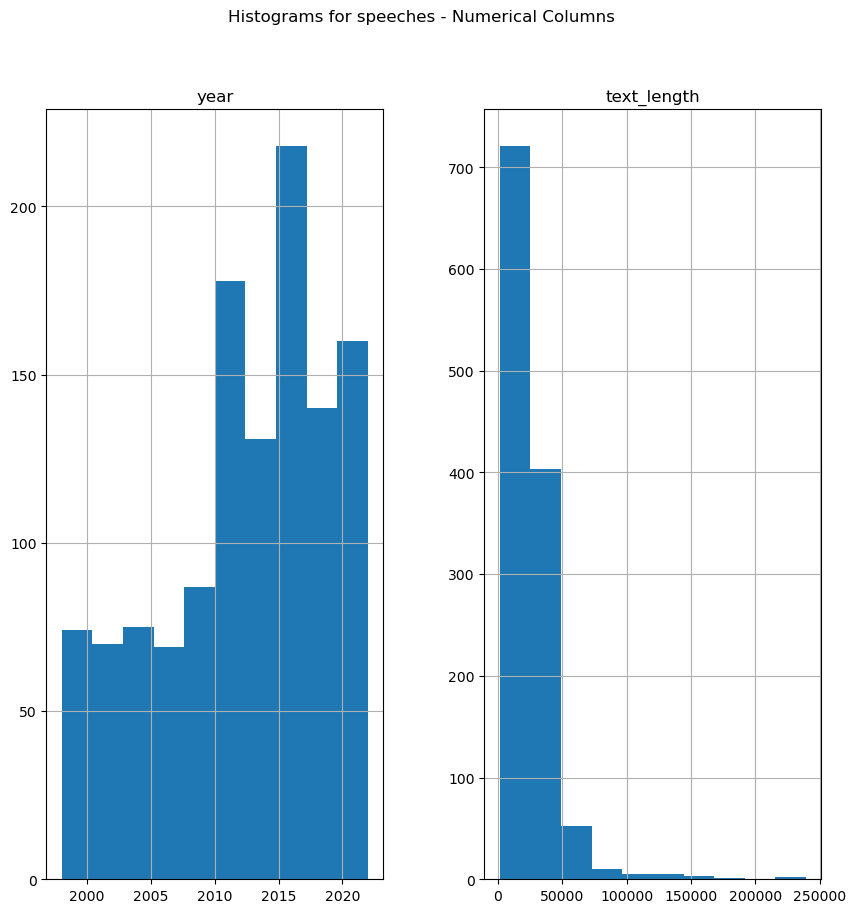


Plotting count plots for categorical columns...


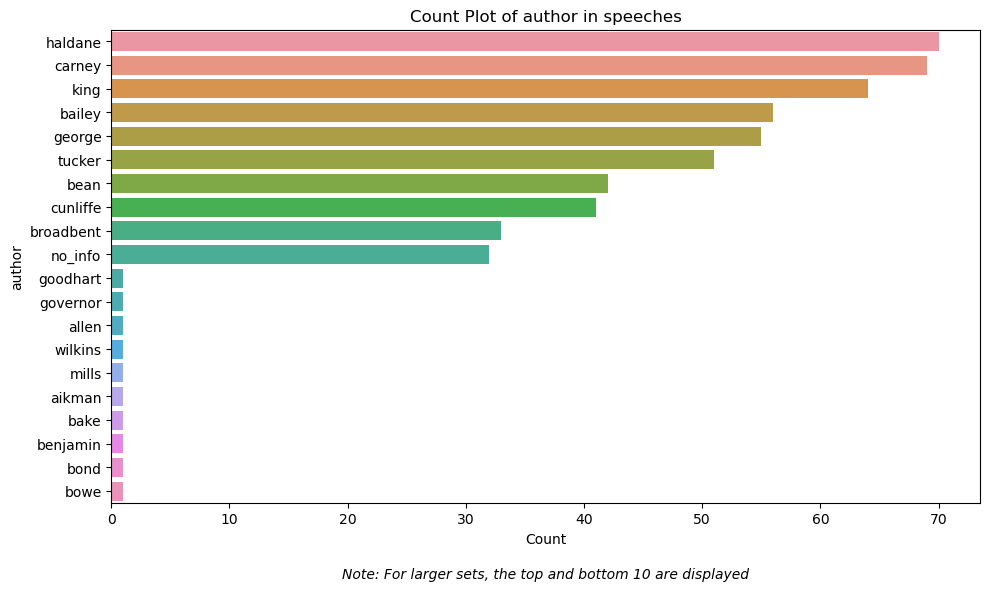

ValueError: Image size of 361873x578 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>


Plotting all columns in the dataset...


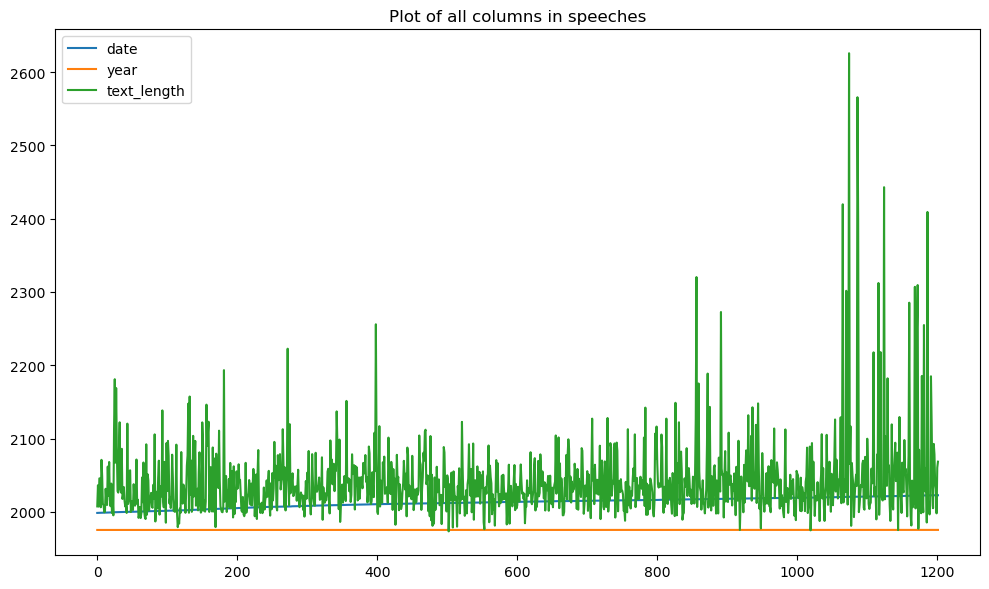

Sense checking data for economic_indicators

economic_indicators - Data Shape: (296, 15)

Plotting histograms for numerical columns...


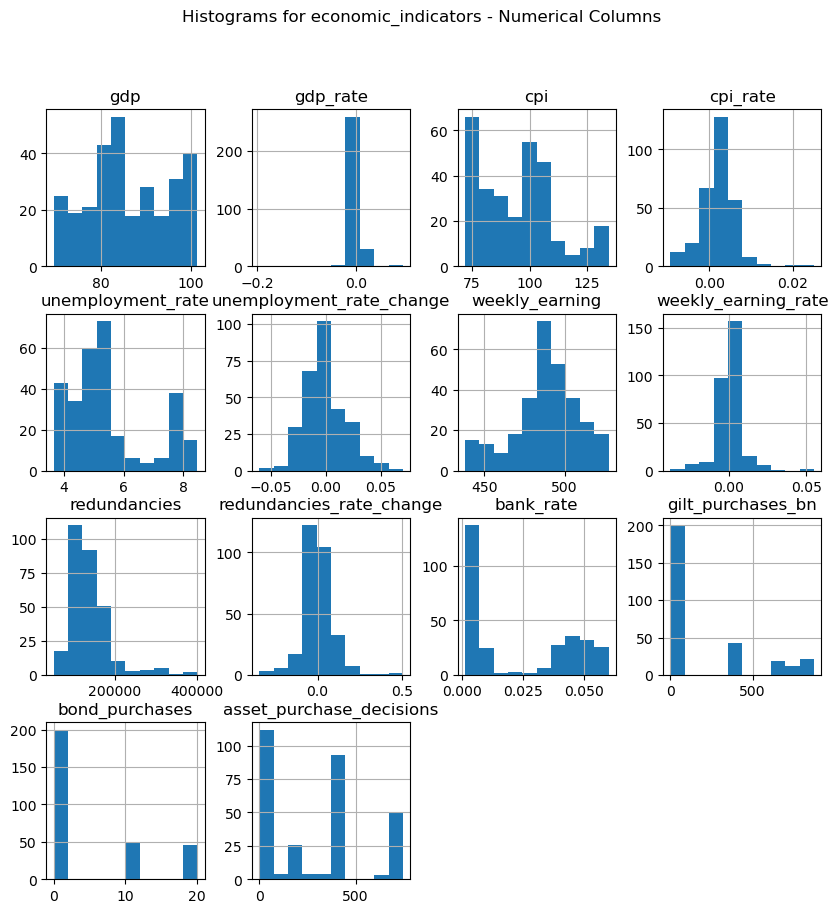


Plotting all columns in the dataset...


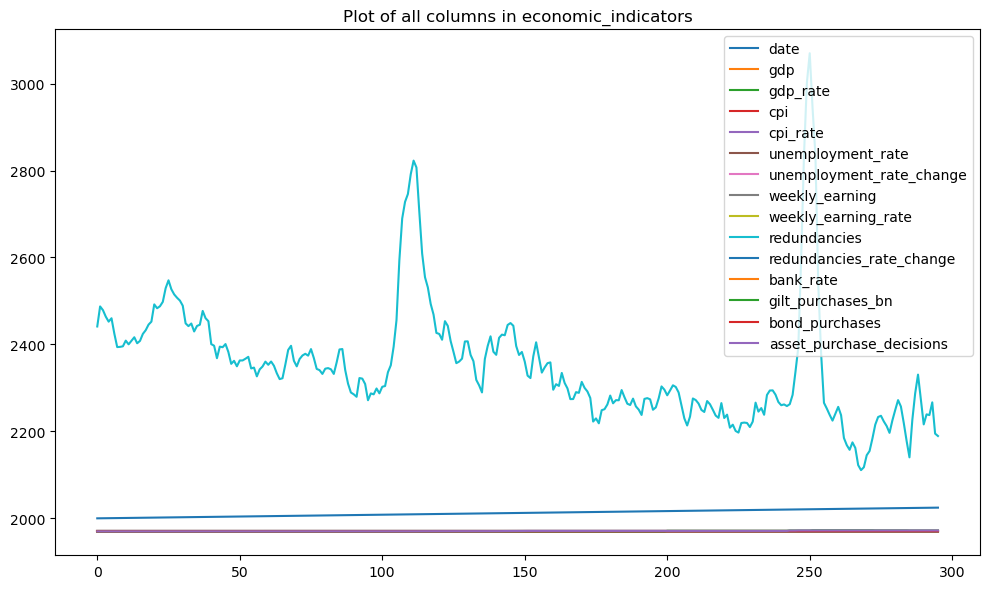

Sense checking data for sentiment_wordlist

sentiment_wordlist - Data Shape: (3880, 7)

Plotting histograms for numerical columns...


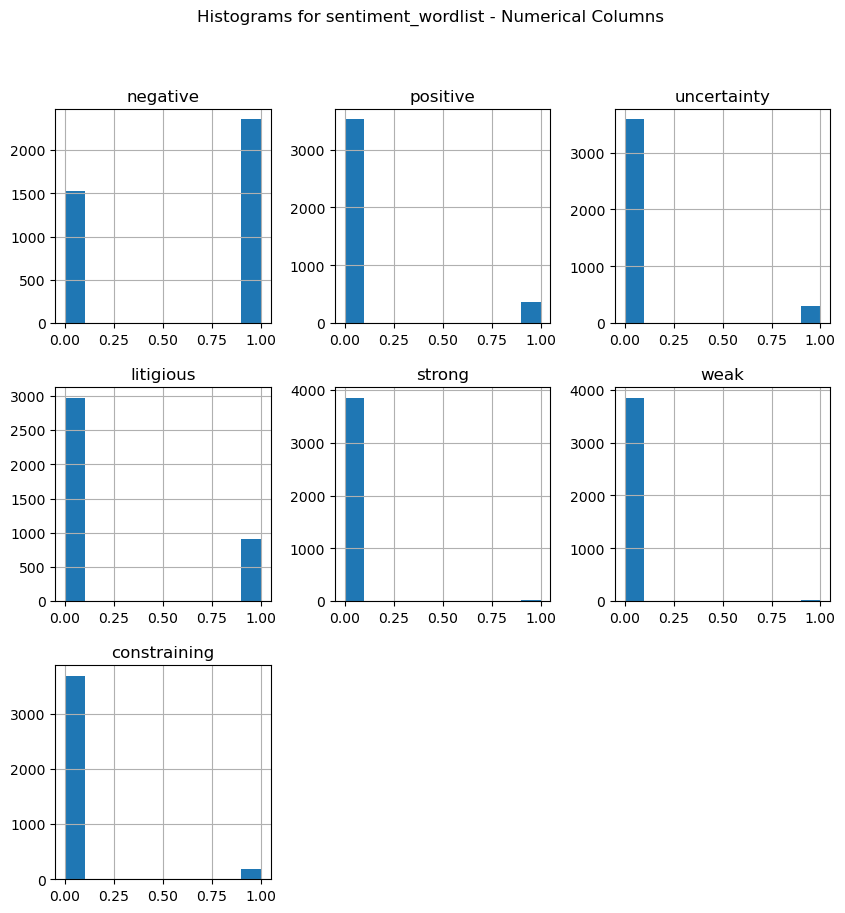


Plotting all columns in the dataset...


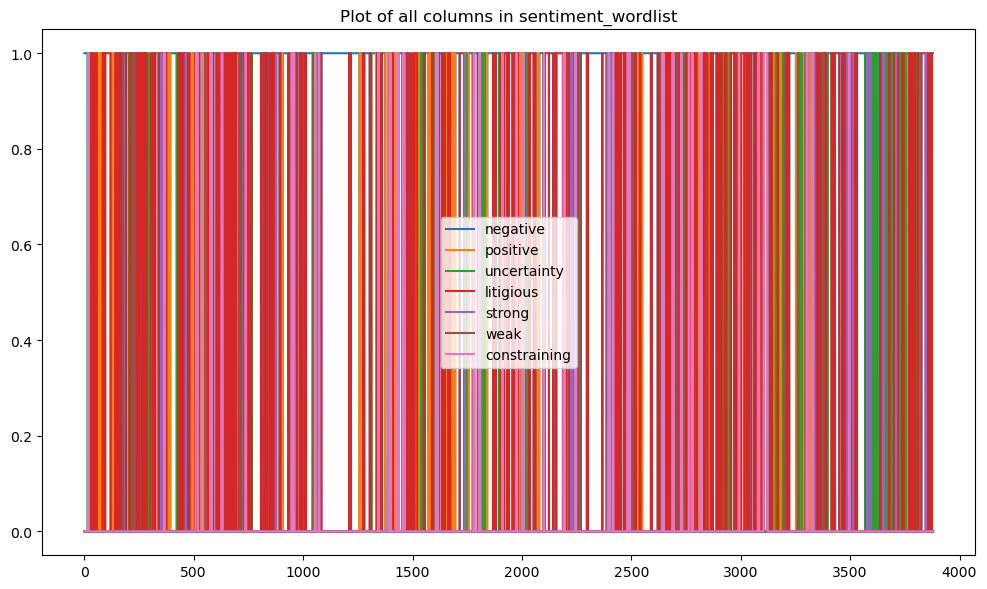

In [80]:
# Temporary remove columns that will be analysed in a second moment.
speeches_vis = speeches.drop(['text'], axis=1)
speeches_vis = speeches.drop(['reference'], axis=1)
sentiment_wordlist_vis = sentiment_wordlist.drop(['word'], axis=1)

vis_check_data(speeches_vis, 'speeches')
vis_check_data(economic_indicators, 'economic_indicators')
vis_check_data(sentiment_wordlist_vis, 'sentiment_wordlist')

###

### II. Summary Statistics for economic indicators

In [85]:
# Function to generate summary statistics
def generate_summary_statistics(df, file_name):
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if numerical_cols:
        print(f'\nNumerical summary statistics for {file_name}:\n{df[numerical_cols].describe()}\n')
    else:
        print(f'\nNo numerical columns found in {file_name}.')

# Applying the function
generate_summary_statistics(economic_indicators, 'economic_indicators')


Numerical summary statistics for economic_indicators:
              gdp    gdp_rate         cpi    cpi_rate  unemployment_rate  \
count  296.000000  296.000000  296.000000  296.000000         296.000000   
mean    86.196180    0.001427   94.883747    0.002087           5.479580   
std      9.022061    0.015358   16.742134    0.004071           1.334827   
min     69.542900   -0.195984   71.936000   -0.009351           3.646717   
25%     80.034025   -0.000947   78.939000   -0.000044           4.504189   
50%     84.666350    0.001835   95.600000    0.002459           5.157945   
75%     94.602350    0.004604  105.810250    0.004185           5.875312   
max    101.382800    0.093757  134.257000    0.025125           8.468759   

       unemployment_rate_change  weekly_earning  weekly_earning_rate  \
count                296.000000      296.000000           296.000000   
mean                  -0.001093      488.258263             0.000648   
std                    0.018785       19.923

**Data Findings**:

- Skewed Distributions: Government bond purchases, corporate bond purchases, and asset purchase decisions show skewed distributions, likely reflecting responses to economic downturns or periods of economic stimulus.

- Moderate Variability: GDP, CPI, and unemployment rate show moderate variability, reflecting typical economic fluctuations.

- Economic Policies: Low average values for the Bank Rate suggest prolonged periods of low interest rates, likely tied to monetary policy strategies aimed at boosting economic growth.

###

### III. Outliers

In [89]:
# Function to detect outlier values
def detect_outlier_values(df, column_list, file_name):
    outlier_summary = {}
    for column in column_list:
        if column in df.columns:
            print(f'\nOutlier detection for {file_name} - {column}:')
            
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            IQRLower = Q1 - 1.5 * IQR
            IQRUpper = Q3 + 1.5 * IQR
            
            outliers = df[(df[column] < IQRLower) | (df[column] > IQRUpper)]
            print(f'Column: {column}')
            print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}')
            print(f'IQRLower: {IQRLower}, IQRUpper: {IQRUpper}')
            print(f'Number of outliers: {outliers.shape[0]}')
            
            outlier_summary[column] = {
                'IQRLower': IQRLower,
                'IQRUpper': IQRUpper,
                'num_outliers': outliers.shape[0]
            }
    return outlier_summary


# 
column_list = [
    'gdp', 'gdp_rate', 'cpi', 'cpi_rate', 'unemployment_rate', 
    'unemployment_rate_change', 'weekly_earning', 'weekly_earning_rate', 
    'redundancies', 'redundancies_rate_change', 'bank_rate', 'gilt_purchases_bn', 
    'bond_purchases', 'asset_purchase_decisions'
]

outlier_info = detect_outlier_values(economic_indicators, column_list, 'economic_indicators.csv')
print("\nOutlier Info:", outlier_info)


Outlier detection for economic_indicators.csv - gdp:
Column: gdp
Q1: 80.034025, Q3: 94.60235, IQR: 14.568325000000002
IQRLower: 58.1815375, IQRUpper: 116.4548375
Number of outliers: 0

Outlier detection for economic_indicators.csv - gdp_rate:
Column: gdp_rate
Q1: -0.0009465273681747396, Q3: 0.004604157382161531, IQR: 0.005550684750336271
IQRLower: -0.009272554493679145, IQRUpper: 0.012930184507665936
Number of outliers: 31

Outlier detection for economic_indicators.csv - cpi:
Column: cpi
Q1: 78.939, Q3: 105.81025, IQR: 26.871250000000003
IQRLower: 38.63212499999999, IQRUpper: 146.117125
Number of outliers: 0

Outlier detection for economic_indicators.csv - cpi_rate:
Column: cpi_rate
Q1: -4.367205958511653e-05, Q3: 0.004184776568052833, IQR: 0.0042284486276379495
IQRLower: -0.0063863450010420405, IQRUpper: 0.010527449509509759
Number of outliers: 16

Outlier detection for economic_indicators.csv - unemployment_rate:
Column: unemployment_rate
Q1: 4.504189442929386, Q3: 5.875311593275371

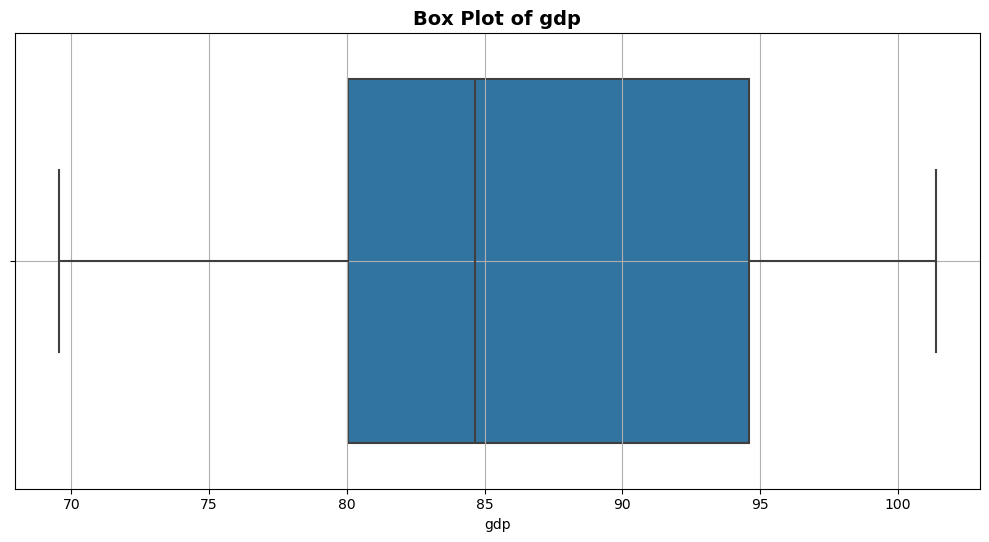

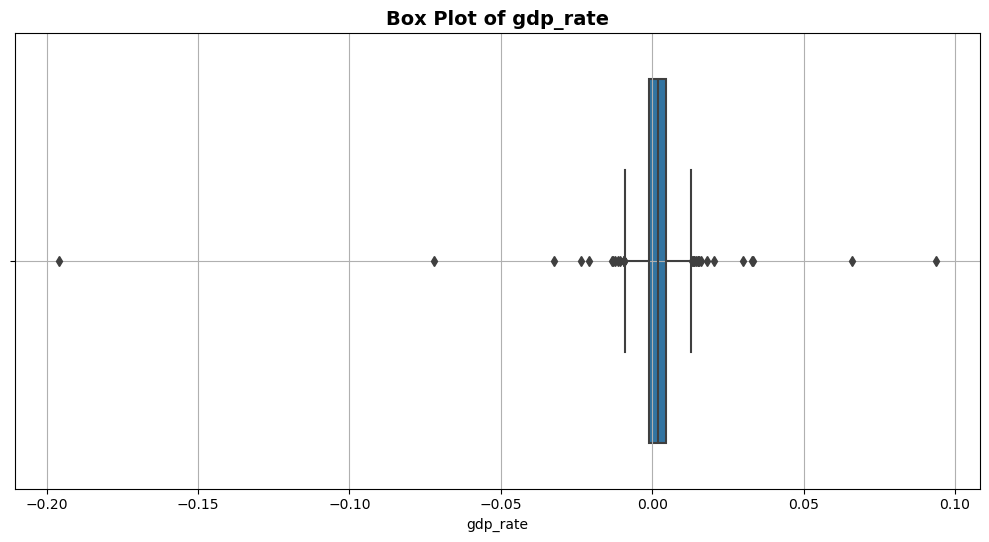

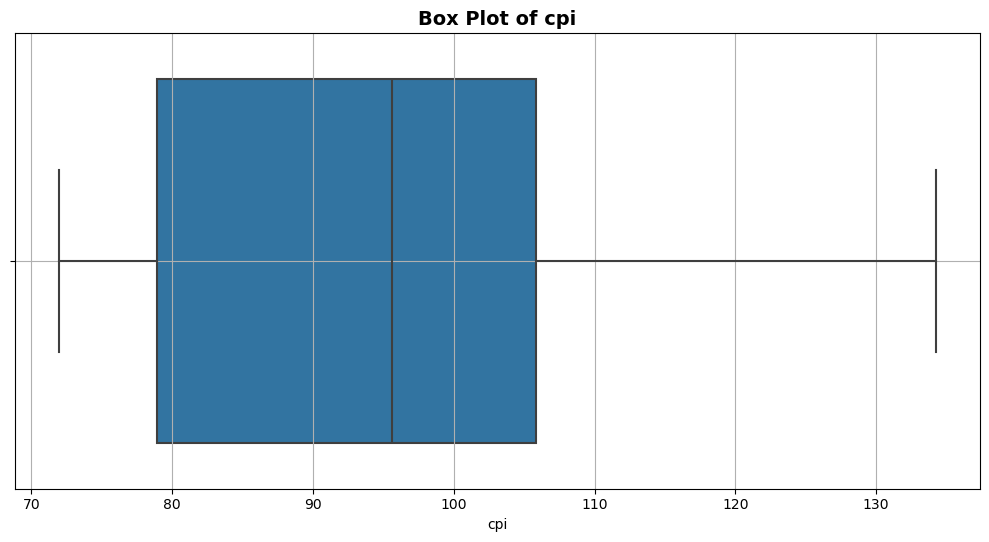

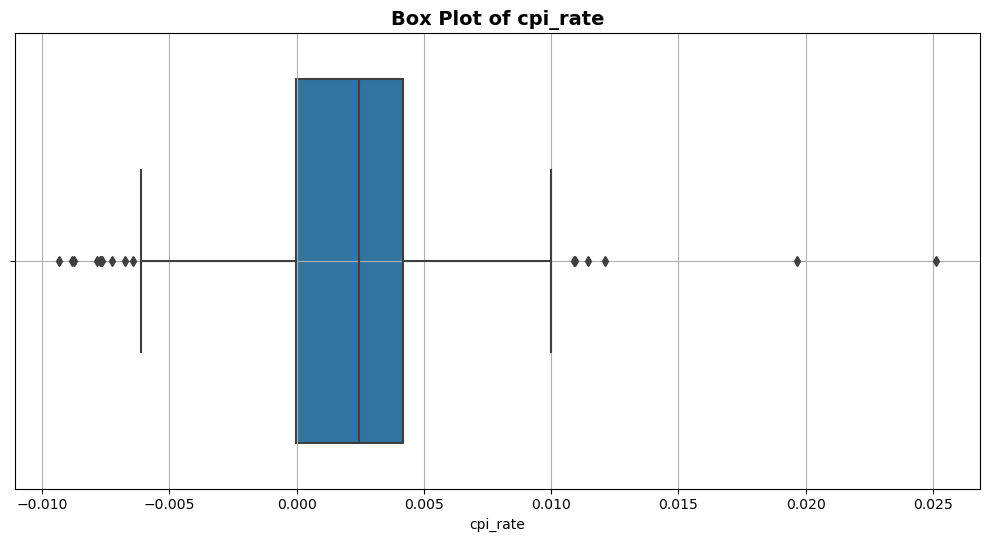

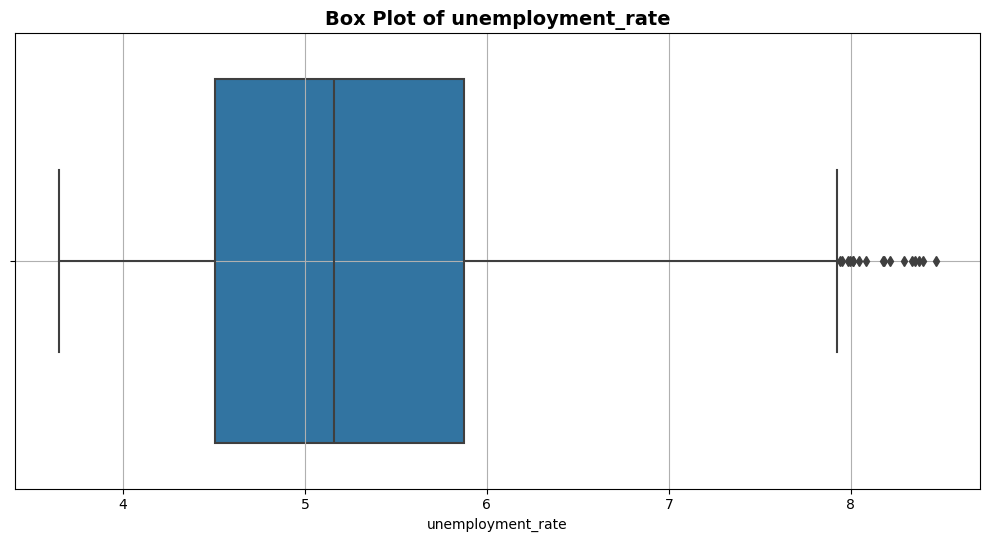

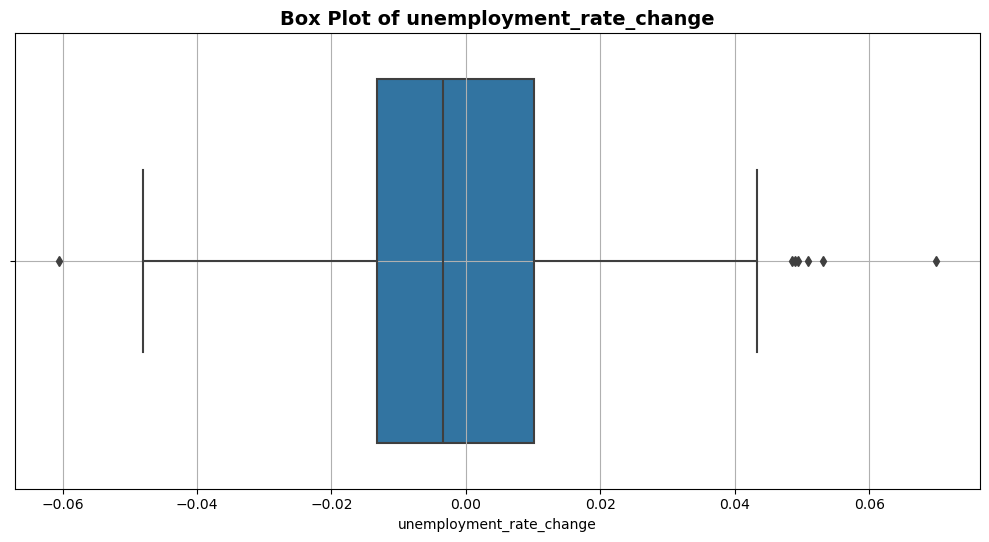

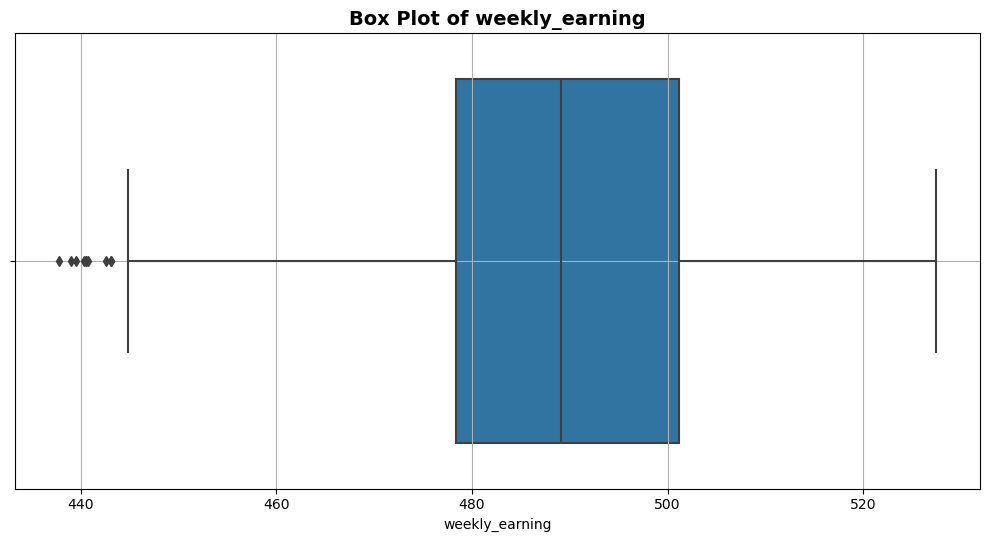

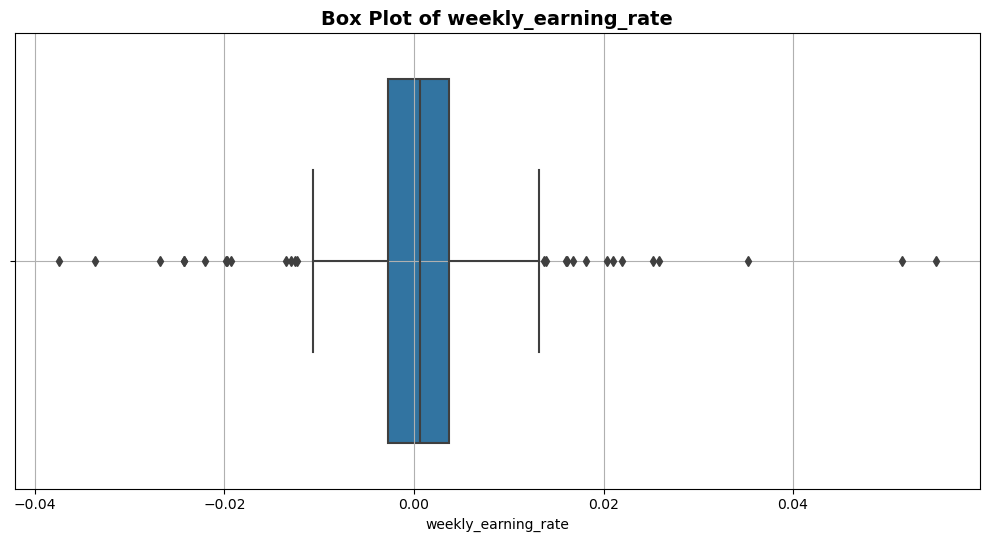

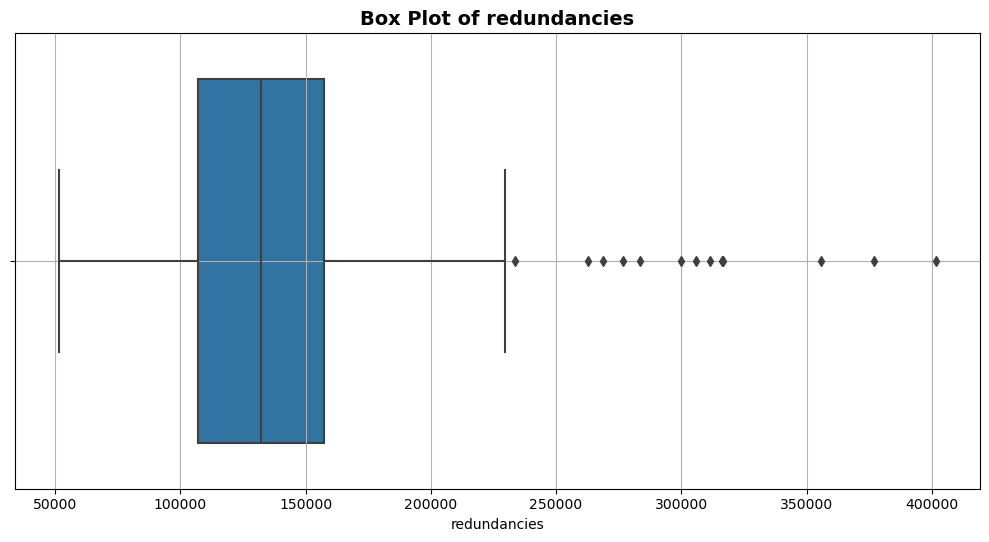

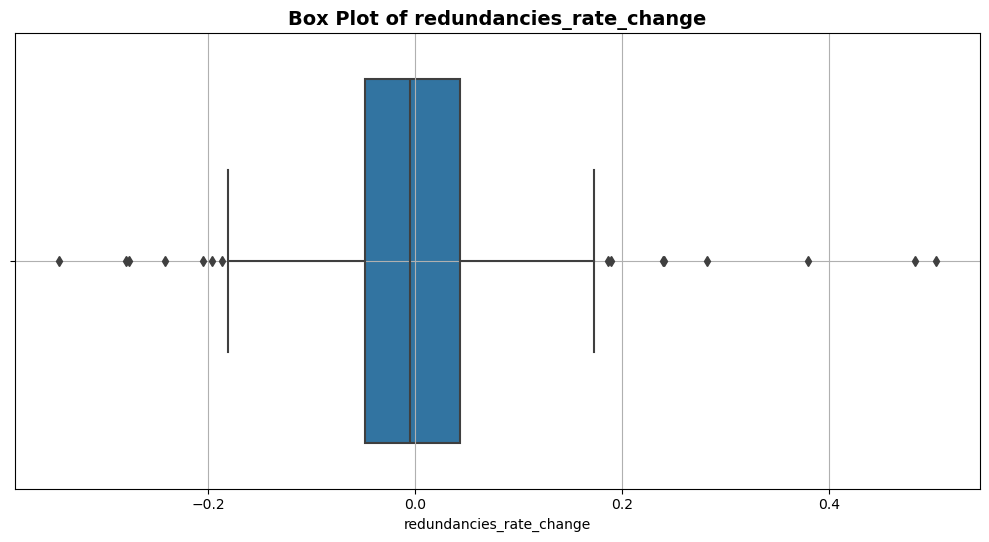

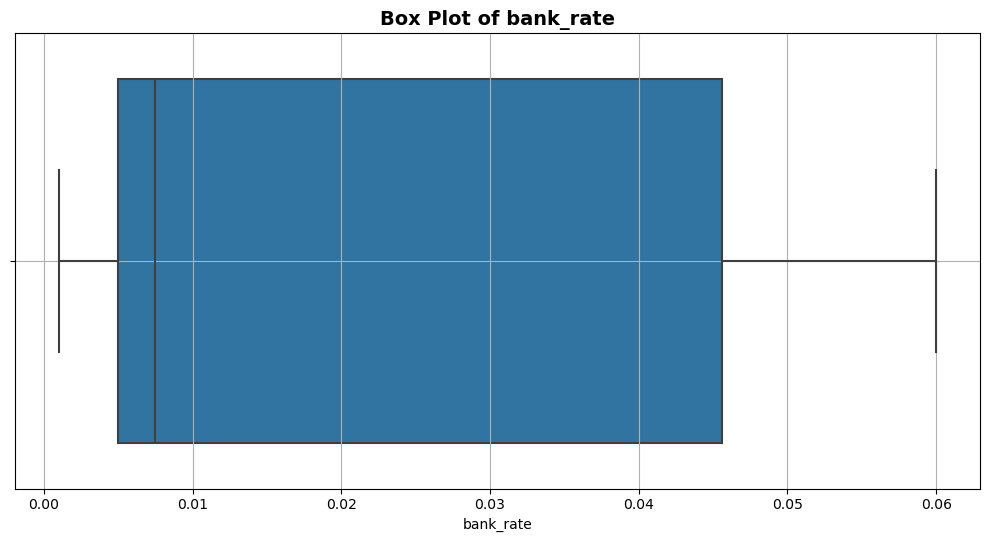

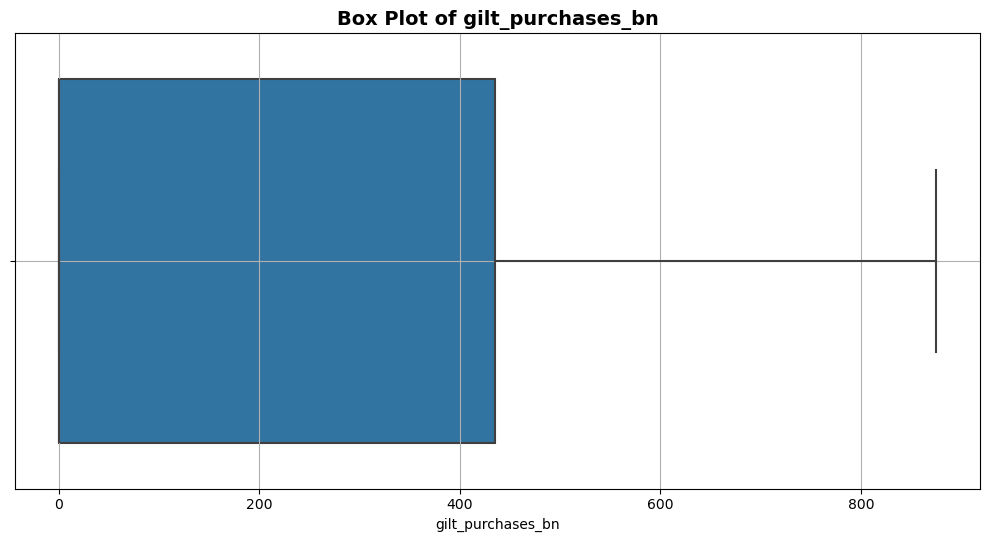

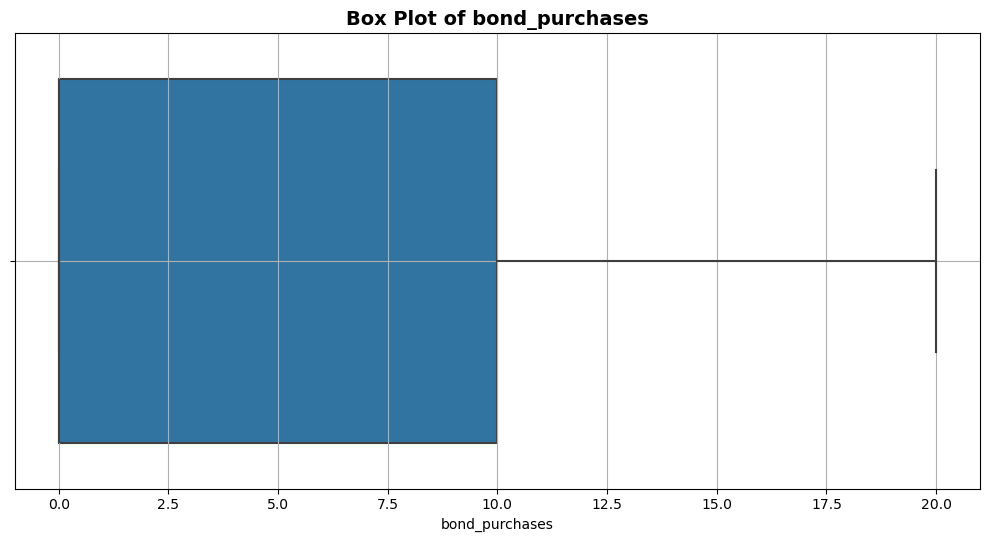

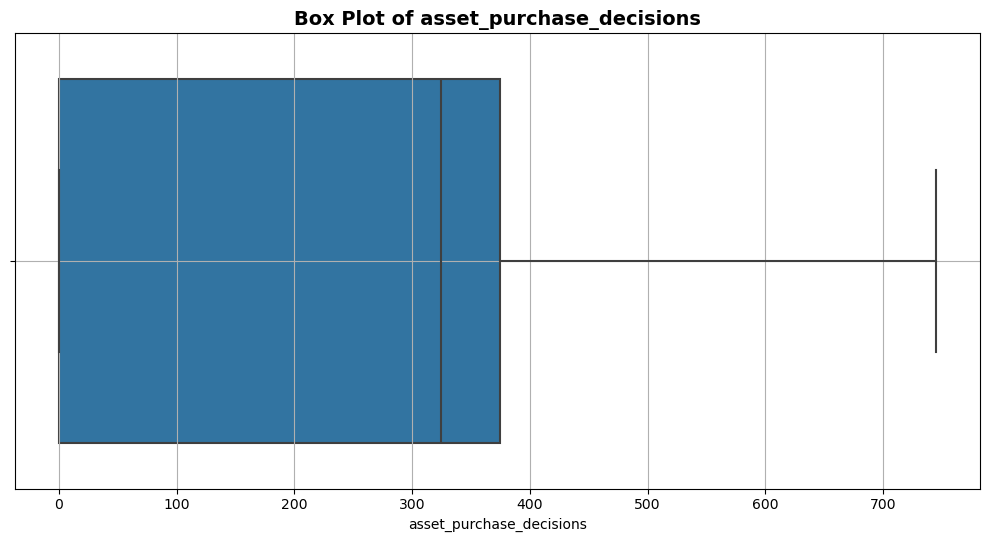

In [93]:
# Function to plot box plots without log transformation
def plot_boxplots(df, column_list):
    for column in column_list:
        if column in df.columns:
            plt.figure(figsize=(10, 6))
            try:
                sns.boxplot(x=df[column])
                
                # Main title and subtitle
                plt.title(f'Box Plot of {column}', fontsize=14, fontweight='bold')
                
                # Label the x-axis
                plt.xlabel(column)
                
                # Add grid for better readability
                plt.grid(True)
                
                plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make sure everything fits
                plt.show()

            except Exception as e:
                logging.error(f"Error while plotting box plot for {column}: {str(e)}")

# Example usage
plot_boxplots(economic_indicators, column_list)


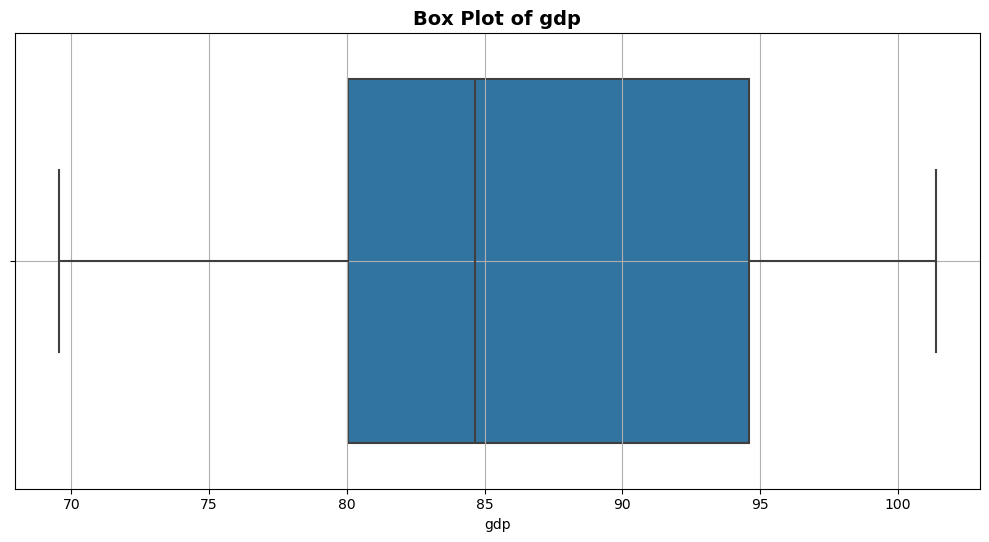

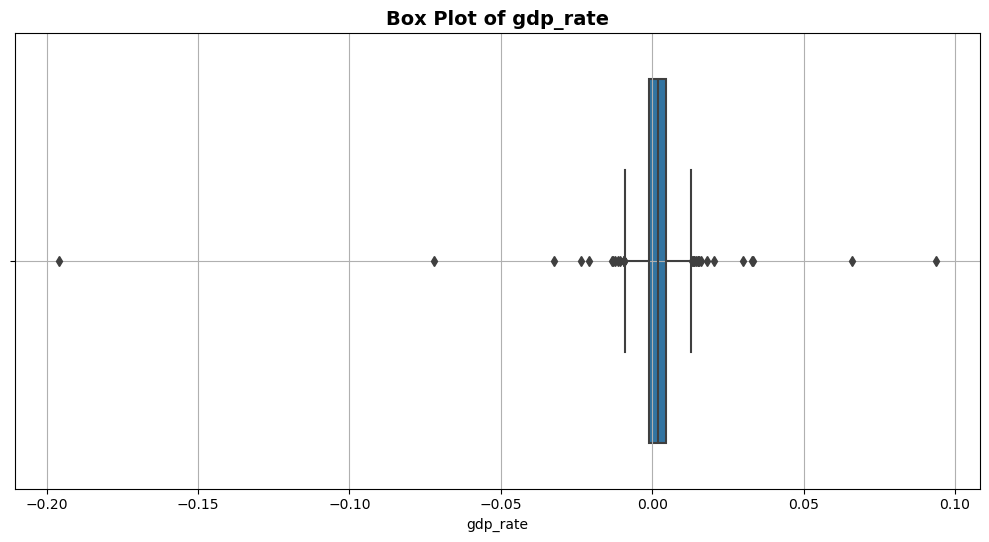

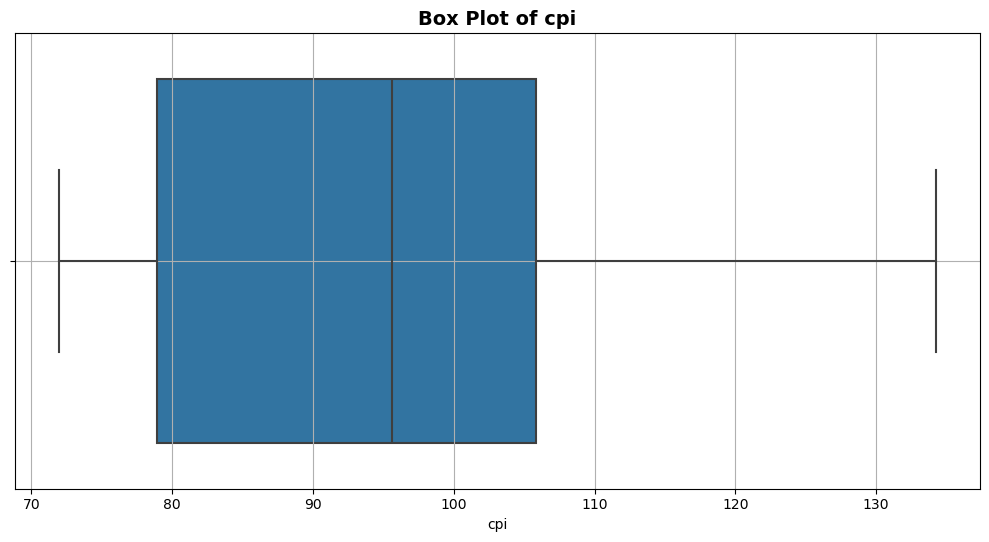

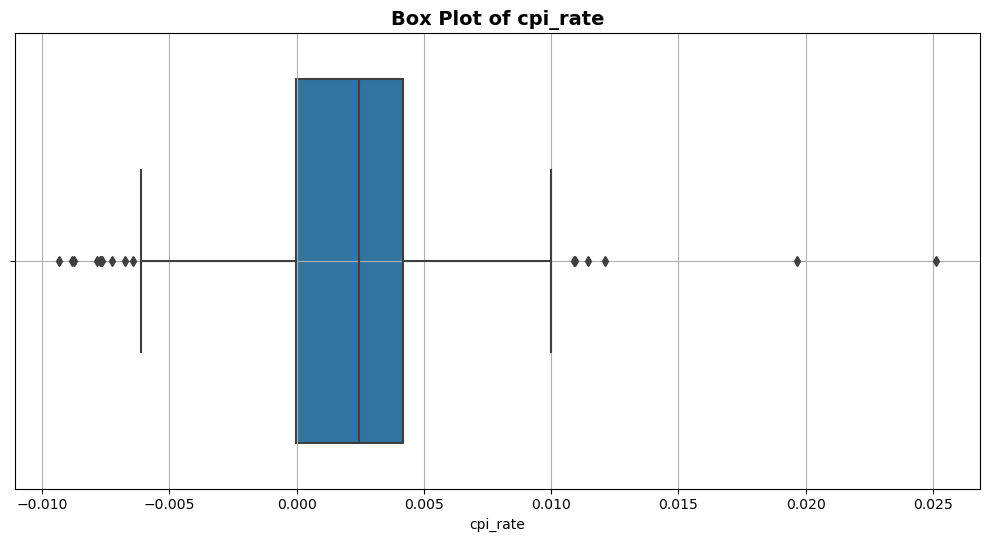

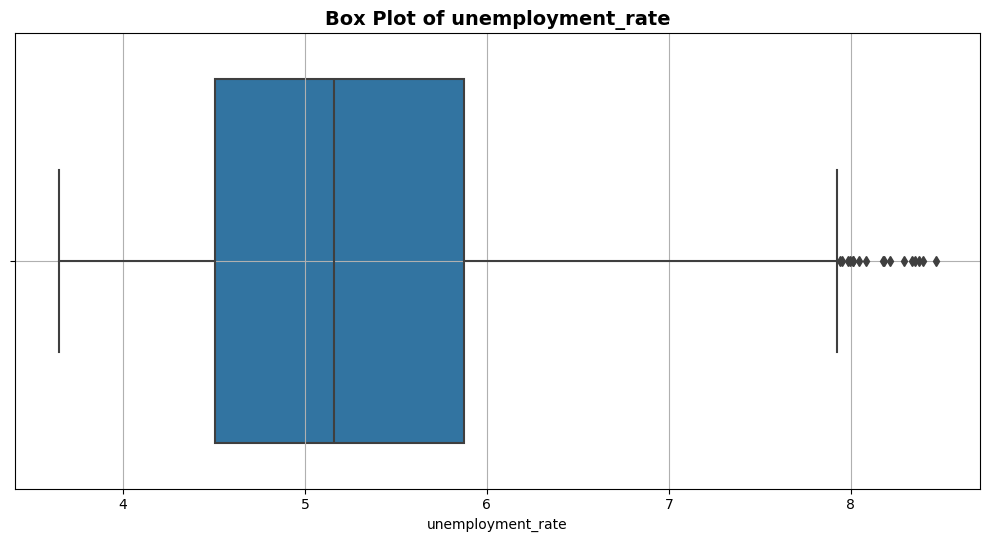

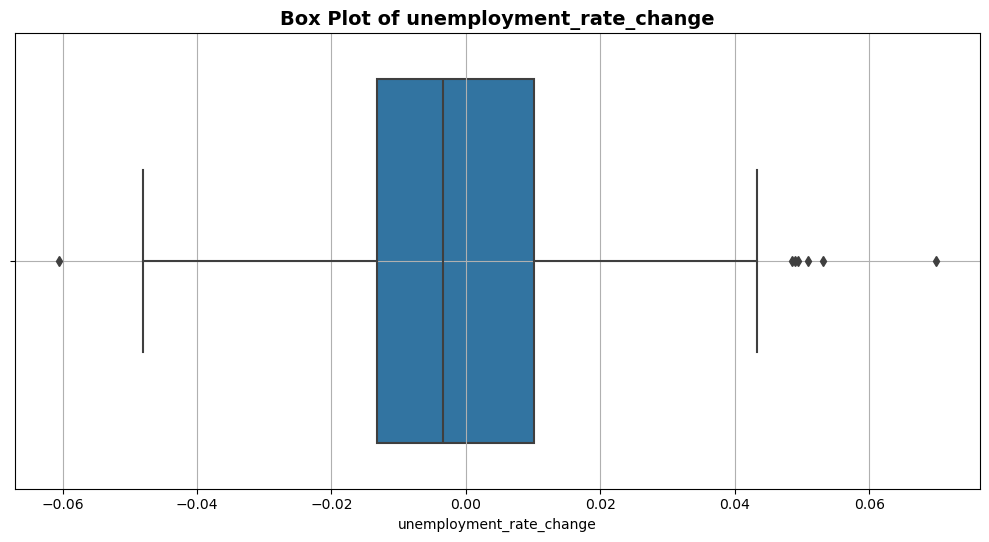

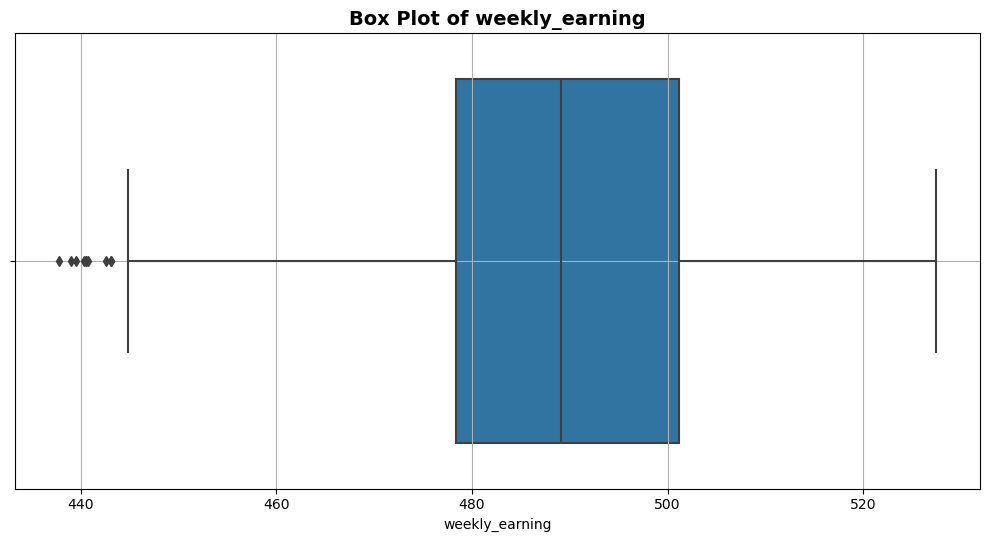

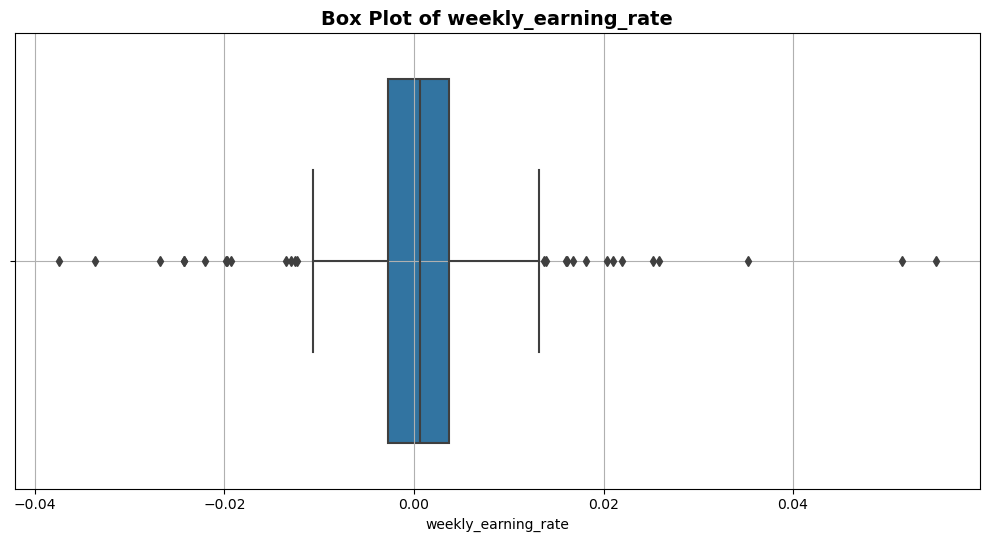

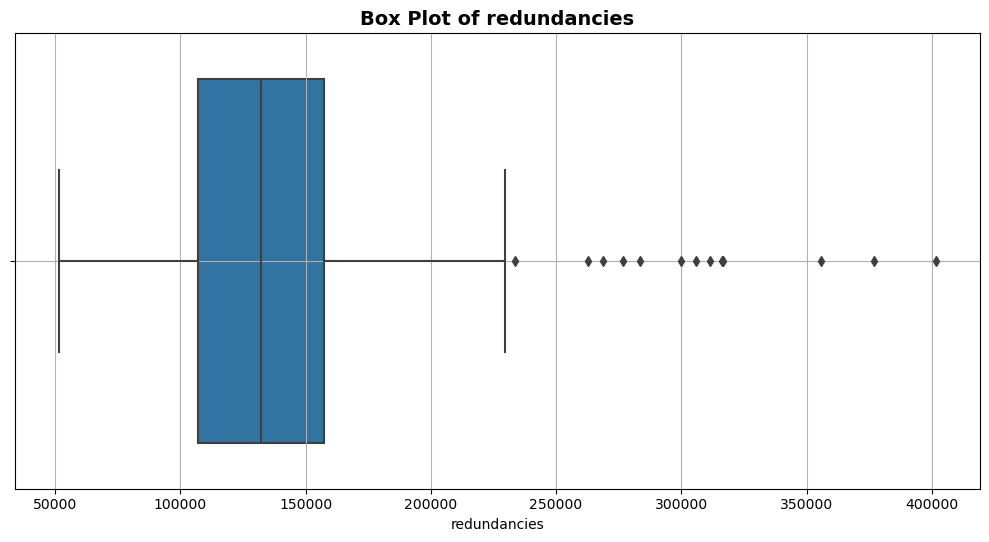

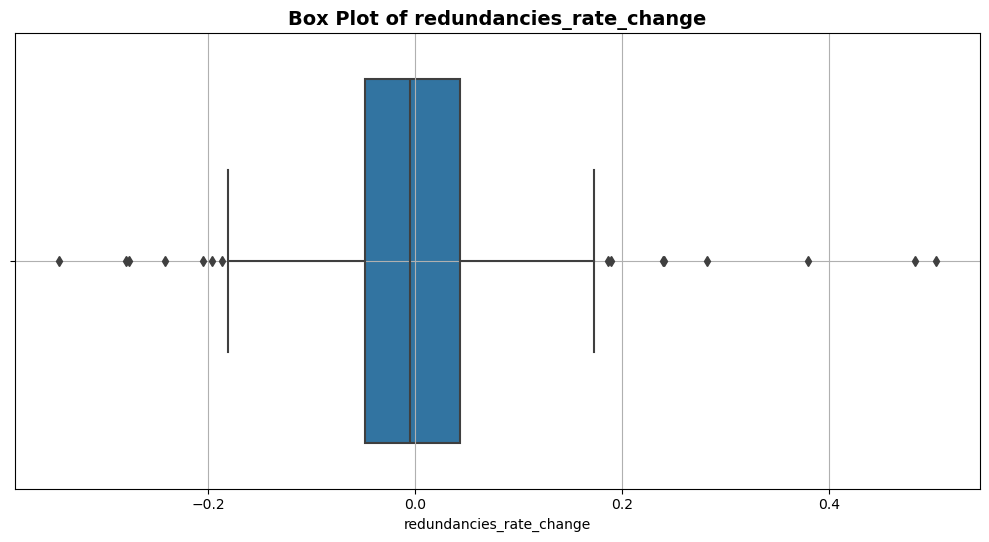

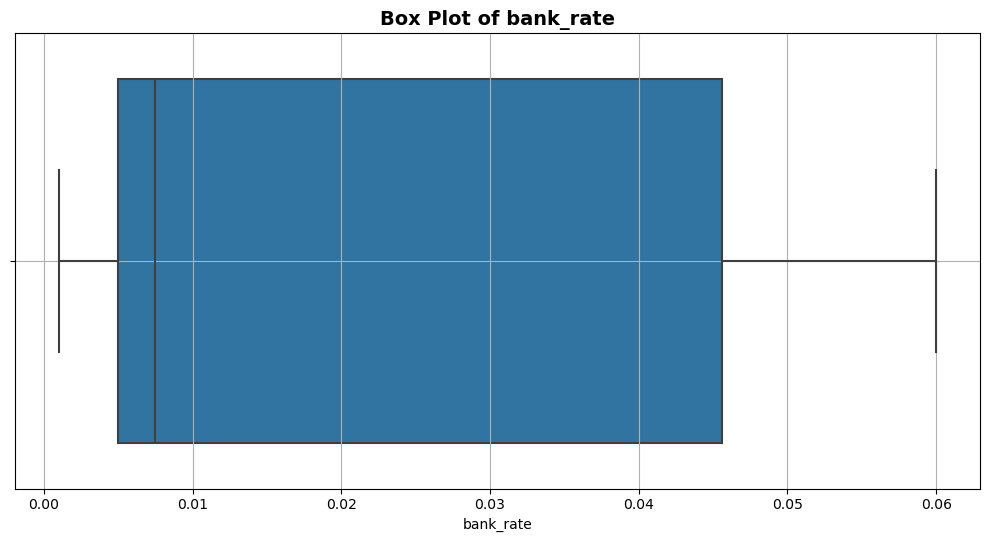

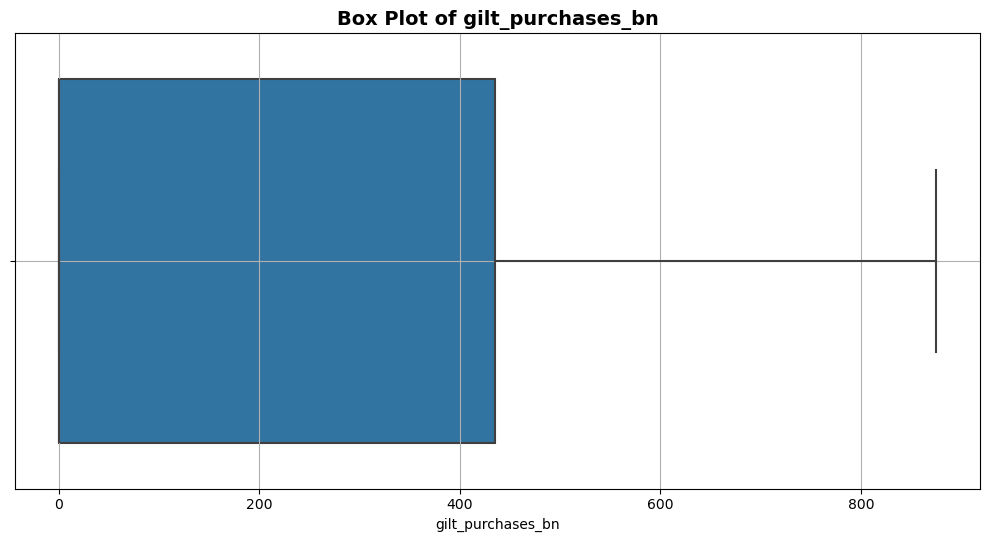

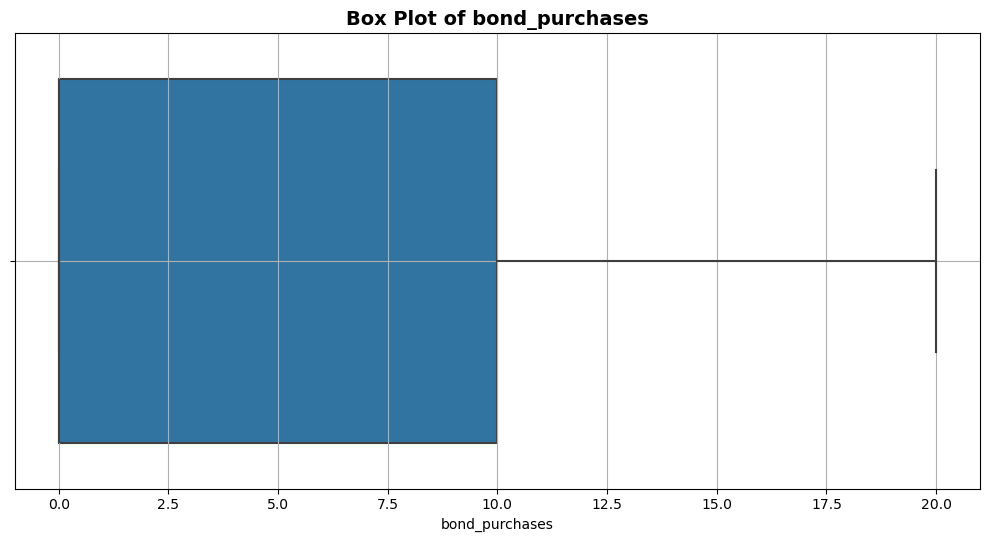

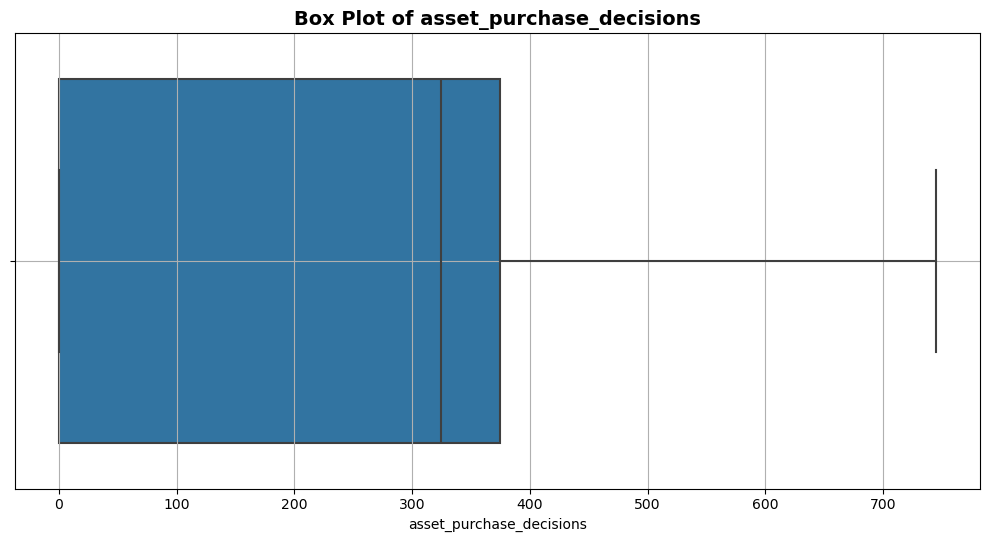

Plots saved to economic_indicators_distribution.pdf


In [94]:
# Create a PDF.
# Define a list of plotting functions with their arguments
plot_functions = [
    lambda: plot_boxplots(economic_indicators, column_list)
]

# Save plots to a single PDF
save_plots_to_pdf(plot_functions, pdf_path="economic_indicators_distribution.pdf")


**Data Findings:**

- Periods of Economic Instability: The presence of outliers in unemployment rate and redundancies suggests that there were periods where economic conditions deviated significantly from the norm, potentially due to recessions or crises.

- Sudden Changes in Employment Metrics: Outliers in unemployment rate change reflect times when the labor market underwent abrupt adjustments, indicating rapid job losses or gains.

- Data Issues in Weekly Earnings: Zero values and other deviations in weekly earnings could signify data quality issues or periods with atypical earnings data.

- Consistent Economic Indicators: The lack of outliers in GDP and CPI suggests more stable trends in these indicators without extreme deviations, indicating gradual economic growth or controlled inflation.

##

<a id="Time_Series_Visualisations"></a>
## 3.2 Time series Analysis 

In [97]:
def visualize_trend_over_time(df, time_col, value_cols, aggregation='mean', rolling_window=7, file_name=None):
    """
    Visualizes trends over time for the given DataFrame.
    """
    try:
        print(f"Visualising trends for {file_name if file_name else 'Data'}")
        
        # Ensure the time column is datetime type
        if not pd.api.types.is_datetime64_any_dtype(df[time_col]):
            df[time_col] = pd.to_datetime(df[time_col], errors='coerce')

        # Remove rows where time_col is NaT (Not a Timestamp)
        df = df.dropna(subset=[time_col])

        # Step 1: Plot raw trends over time
        plt.figure(figsize=(12, 6))
        for col in value_cols:
            plt.plot(df[time_col], df[col], label=f'Raw {col}', alpha=0.7)
        
        plt.title(f'Trends Over Time - Raw Data')
        plt.xlabel('Time')
        plt.ylabel('Values')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Step 2: Plot Rolling Averages
        plt.figure(figsize=(12, 6))
        for col in value_cols:
            rolling_col = df[col].rolling(window=rolling_window).mean()
            plt.plot(df[time_col], rolling_col, label=f'Rolling Avg {col}', alpha=0.8)

        plt.title(f'Trends Over Time - {rolling_window}-Day Rolling Averages')
        plt.xlabel('Time')
        plt.ylabel('Values')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Step 3: Aggregated view (optional, based on user-specified aggregation)
        df_aggregated = df.set_index(time_col).resample('M').agg(aggregation)  # Resample to monthly
        plt.figure(figsize=(12, 6))
        for col in value_cols:
            plt.plot(df_aggregated.index, df_aggregated[col], label=f'{aggregation.capitalize()} {col}', marker='o')
        
        plt.title(f'{aggregation.capitalize()} Values Over Time (Aggregated Monthly)')
        plt.xlabel('Time')
        plt.ylabel(f'{aggregation.capitalize()} Values')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print(f"Visualisation complete for {file_name if file_name else 'Data'}")

    except Exception as e:
        print(f"An error occurred: {e}")


Visualizing trends for economic_indicators


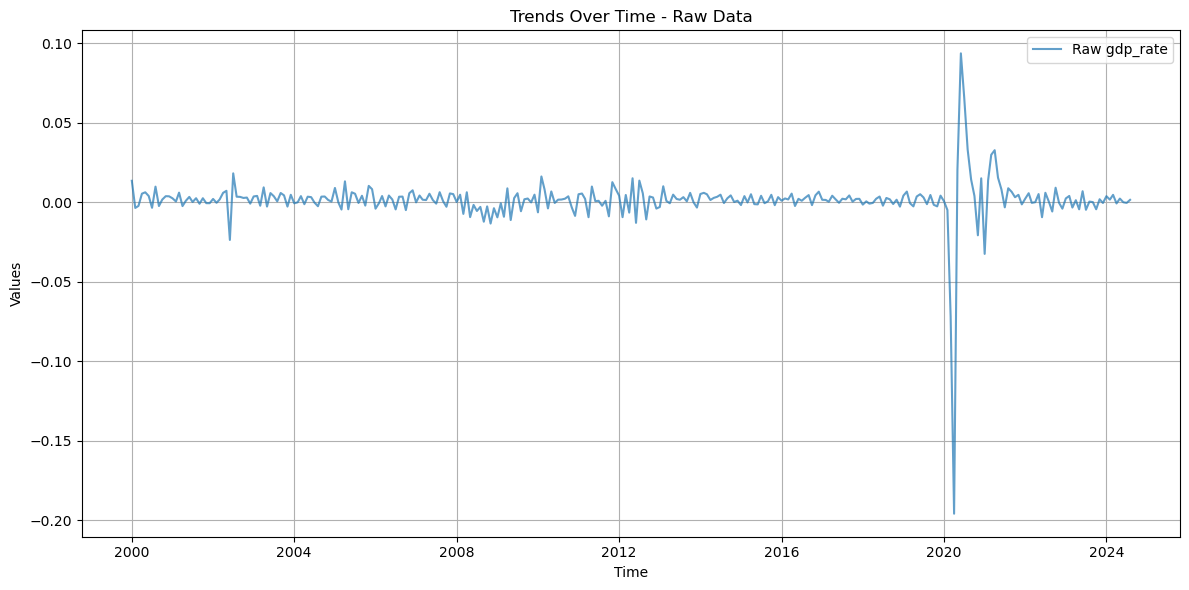

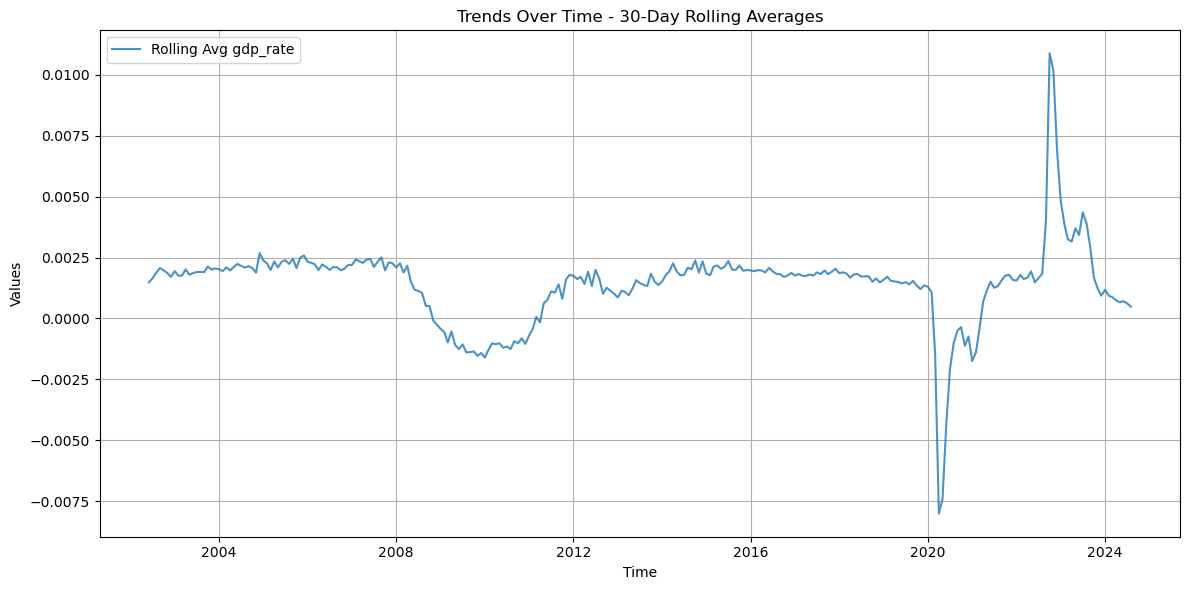

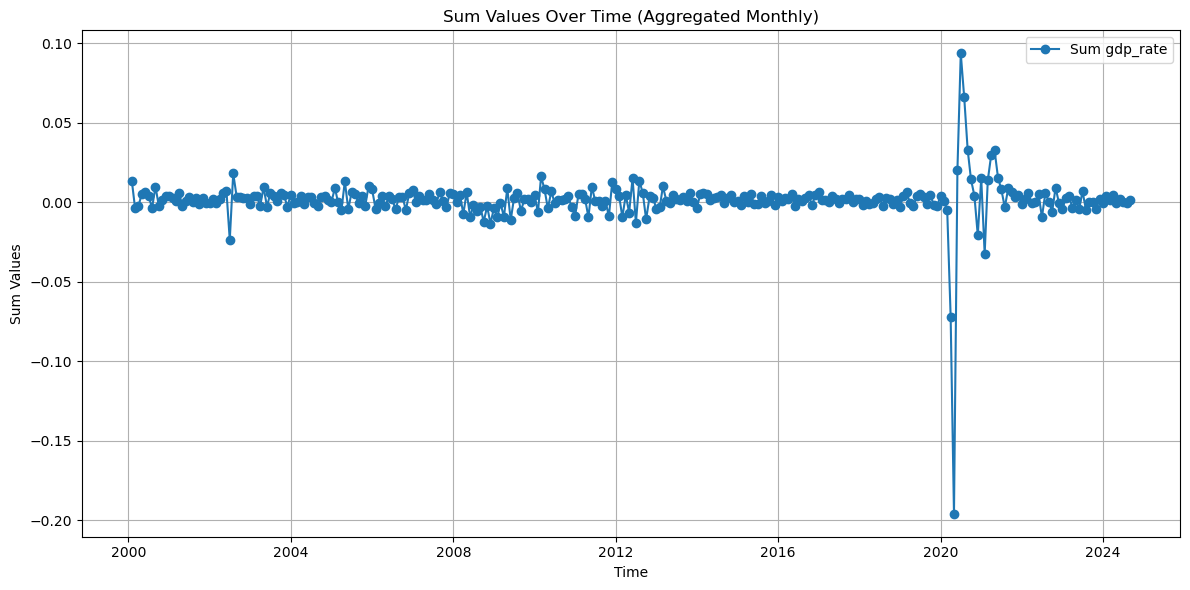

Visualization complete for economic_indicators
Visualizing trends for economic_indicators


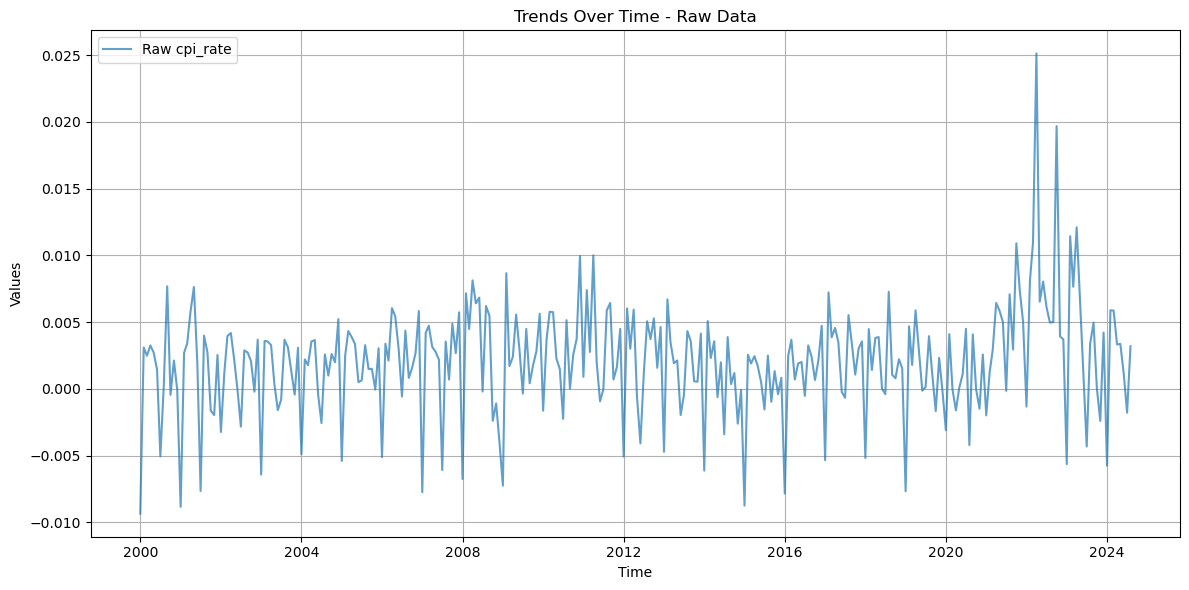

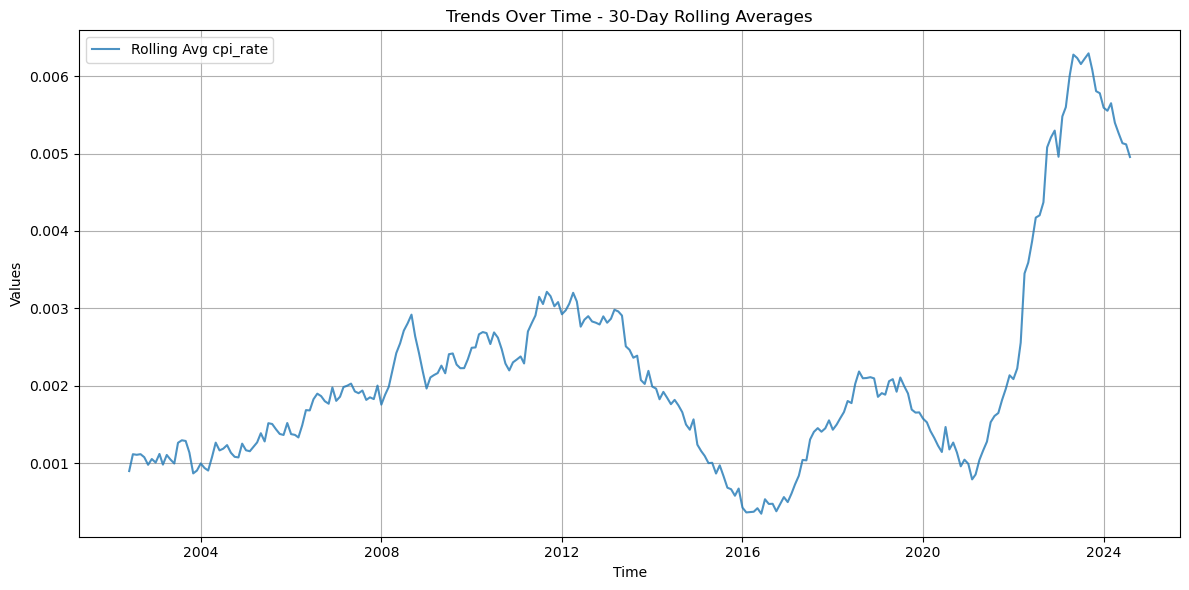

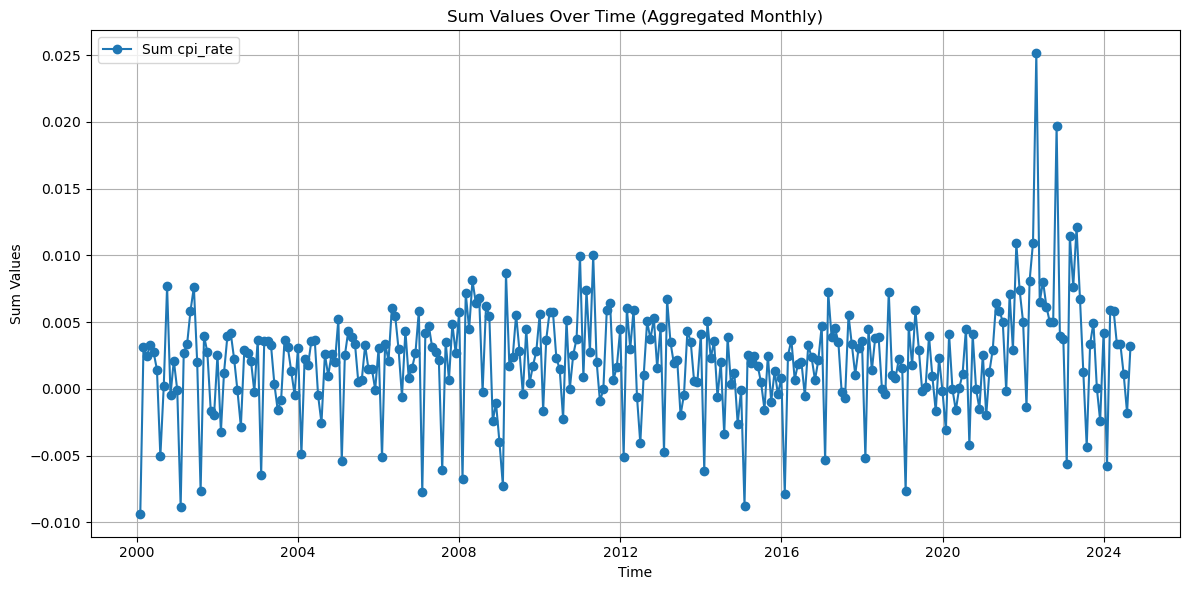

Visualization complete for economic_indicators
Visualizing trends for economic_indicators


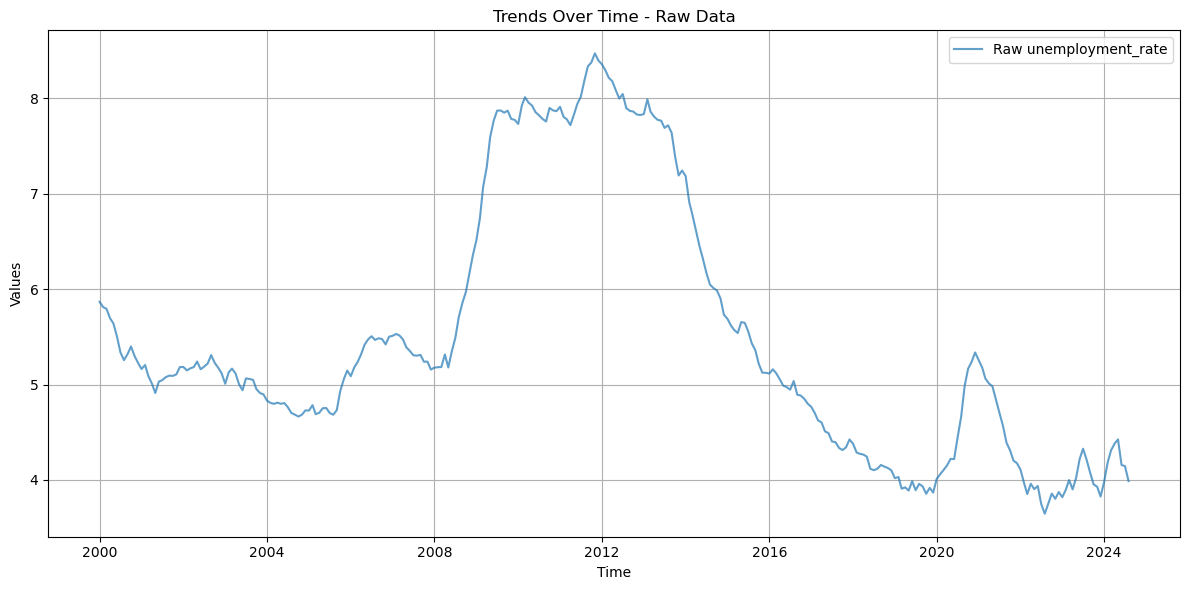

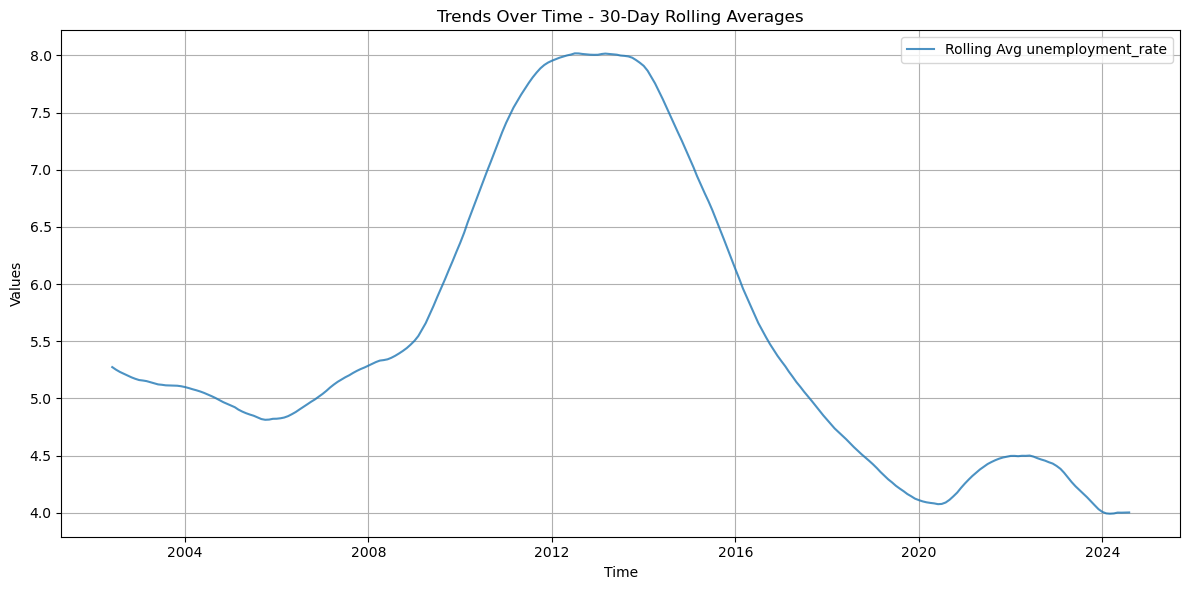

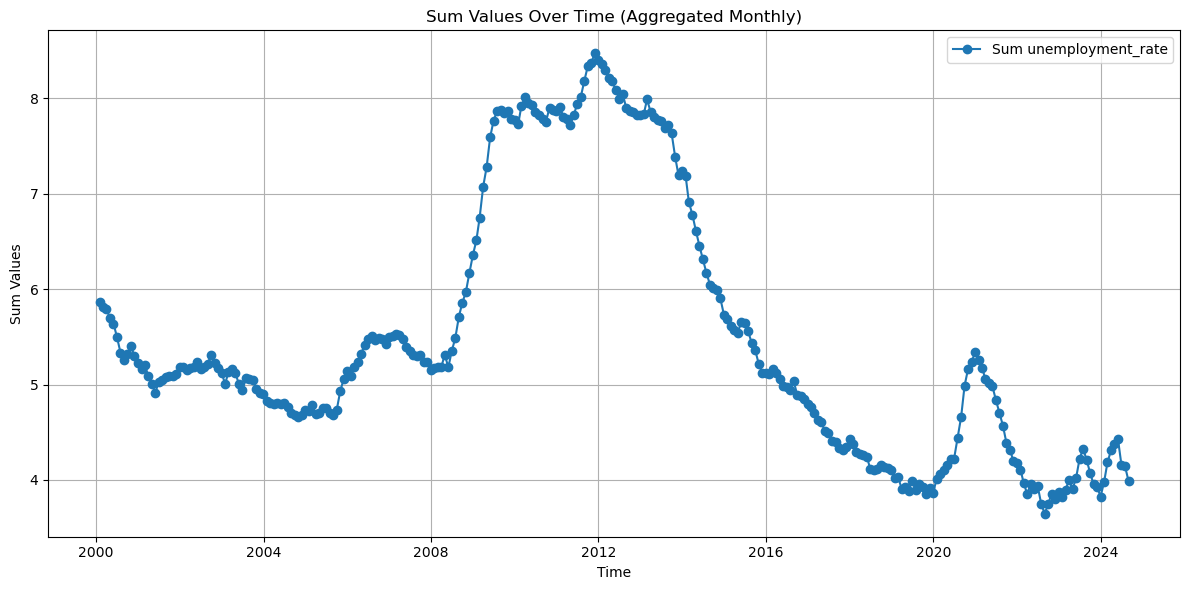

Visualization complete for economic_indicators


In [99]:
# Apply the function
visualize_trend_over_time(economic_indicators, time_col='date', value_cols=['gdp_rate'], aggregation='sum', rolling_window=30, file_name="economic_indicators")
visualize_trend_over_time(economic_indicators, time_col='date', value_cols=['cpi_rate'], aggregation='sum', rolling_window=30, file_name="economic_indicators")
visualize_trend_over_time(economic_indicators, time_col='date', value_cols=['unemployment_rate'], aggregation='sum', rolling_window=30, file_name="economic_indicators")

Visualizing trends for economic_indicators


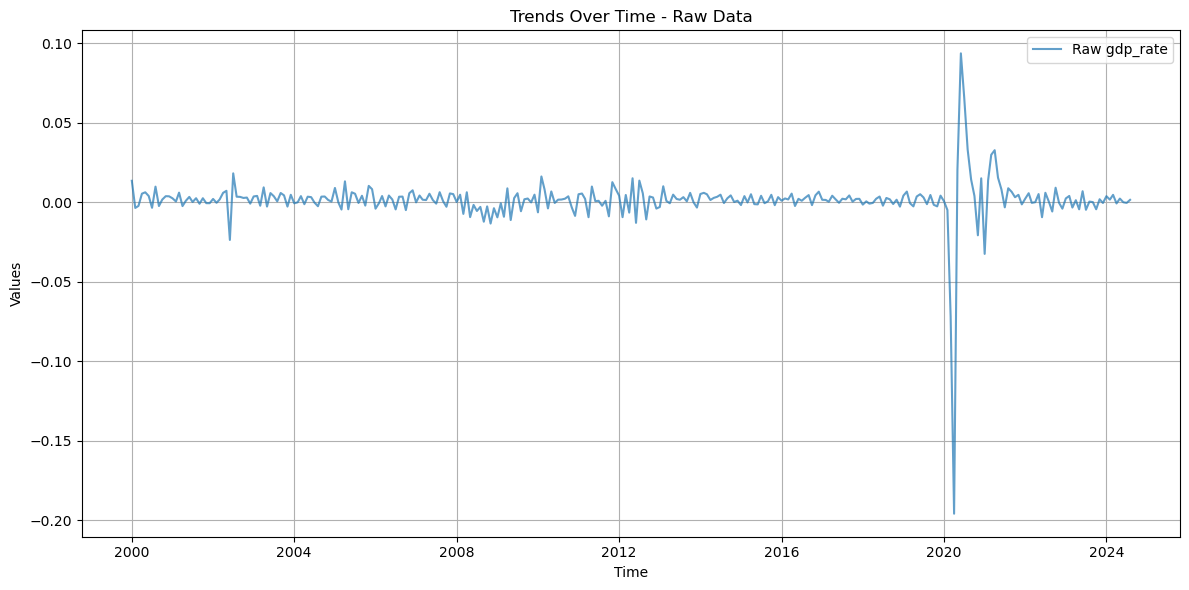

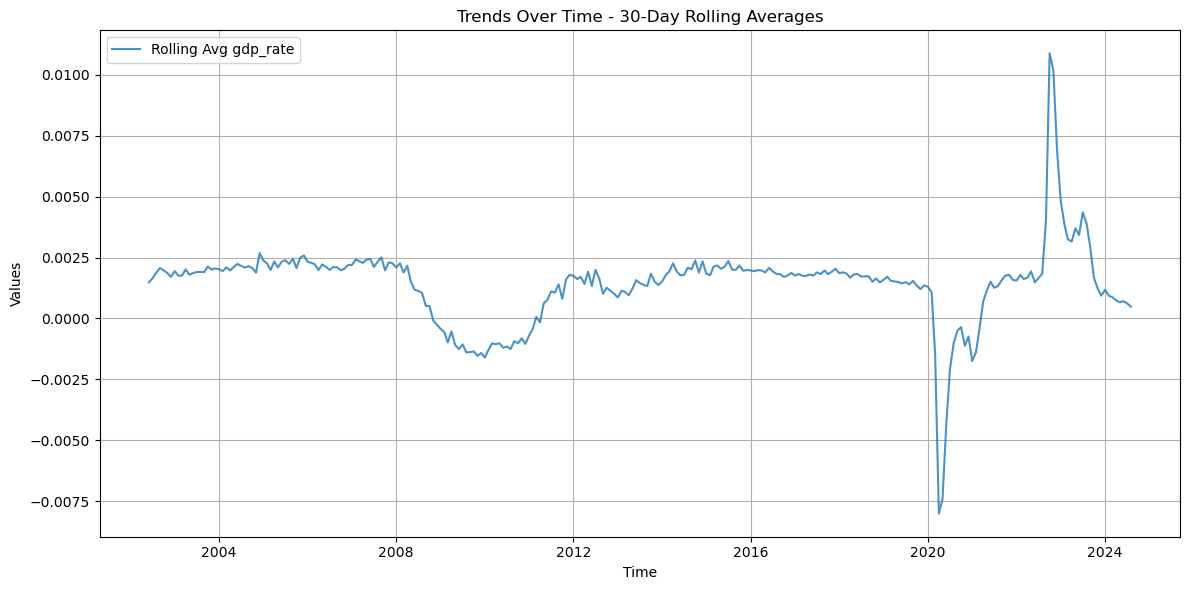

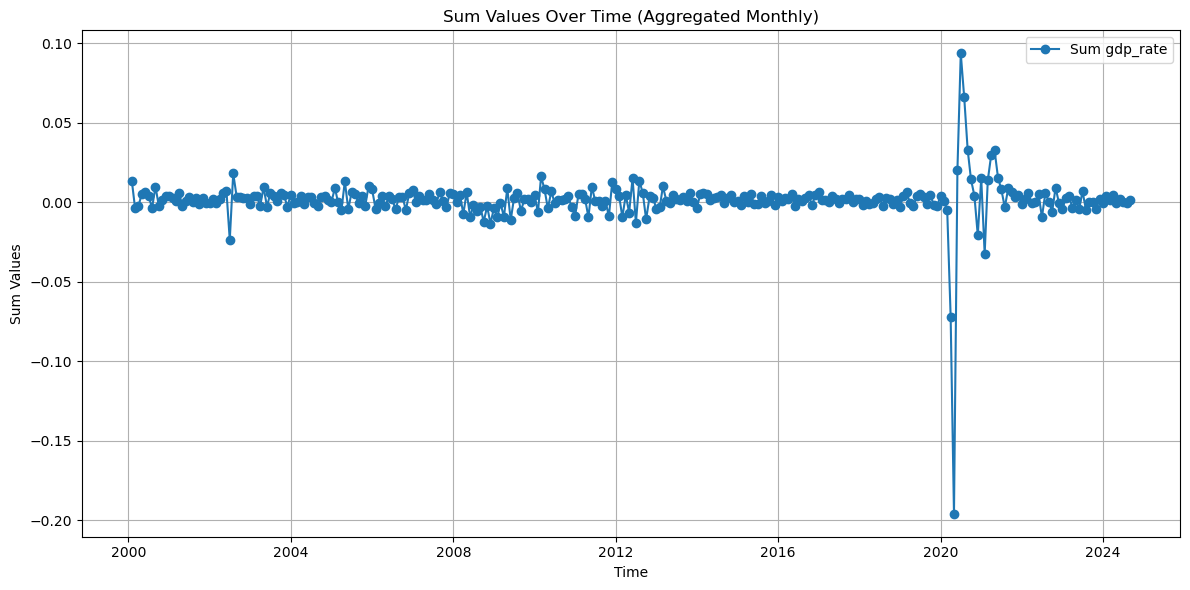

Visualization complete for economic_indicators
Visualizing trends for economic_indicators


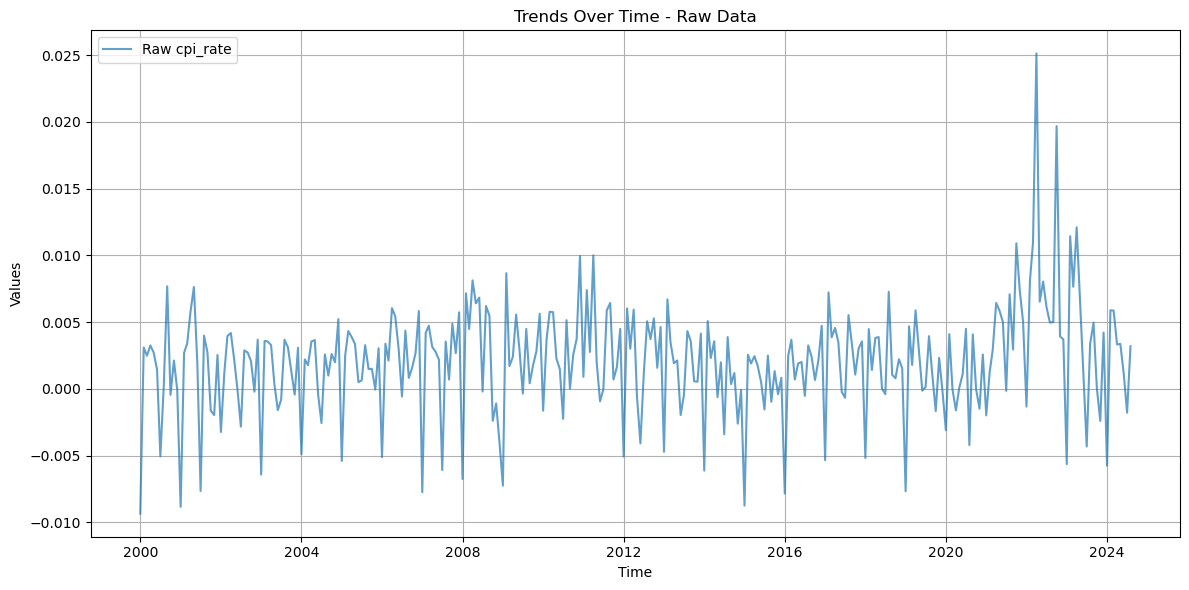

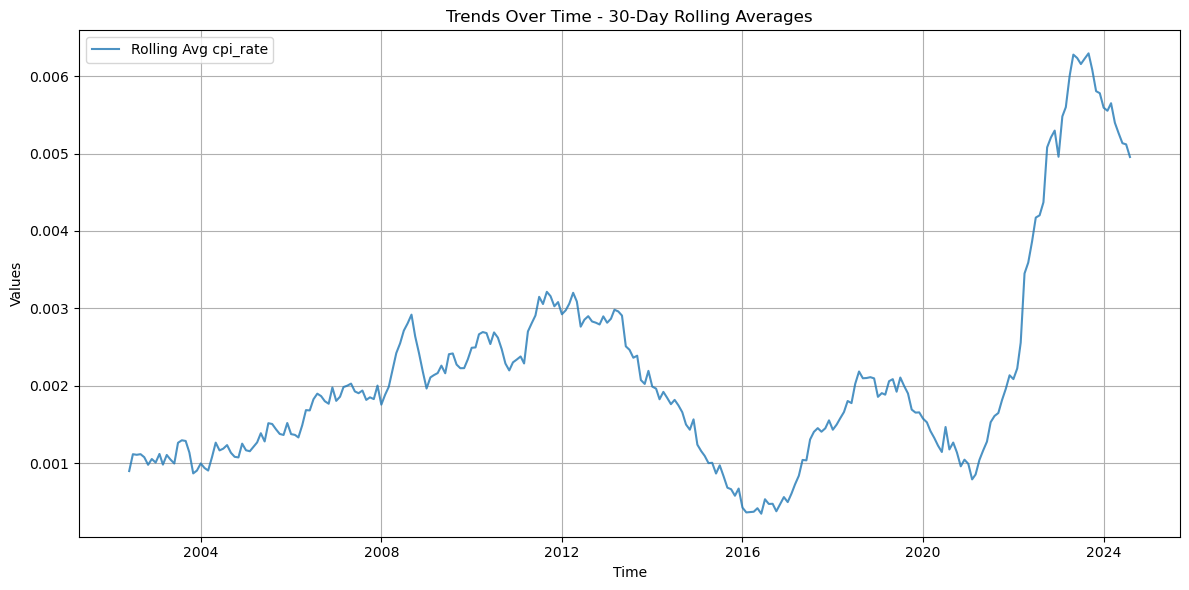

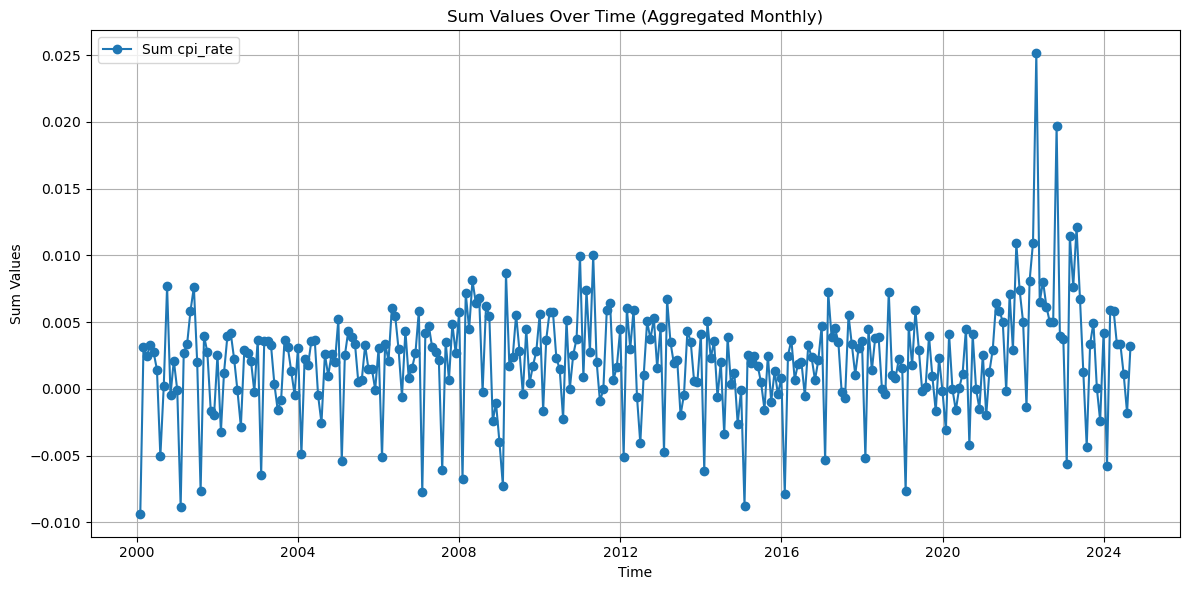

Visualization complete for economic_indicators
Visualizing trends for economic_indicators


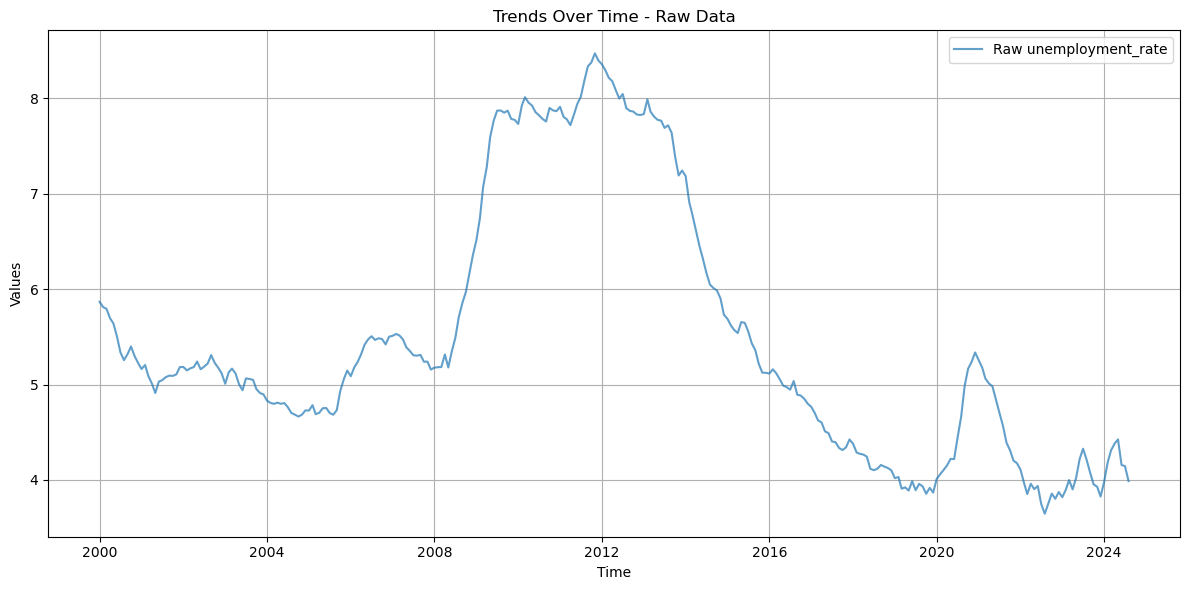

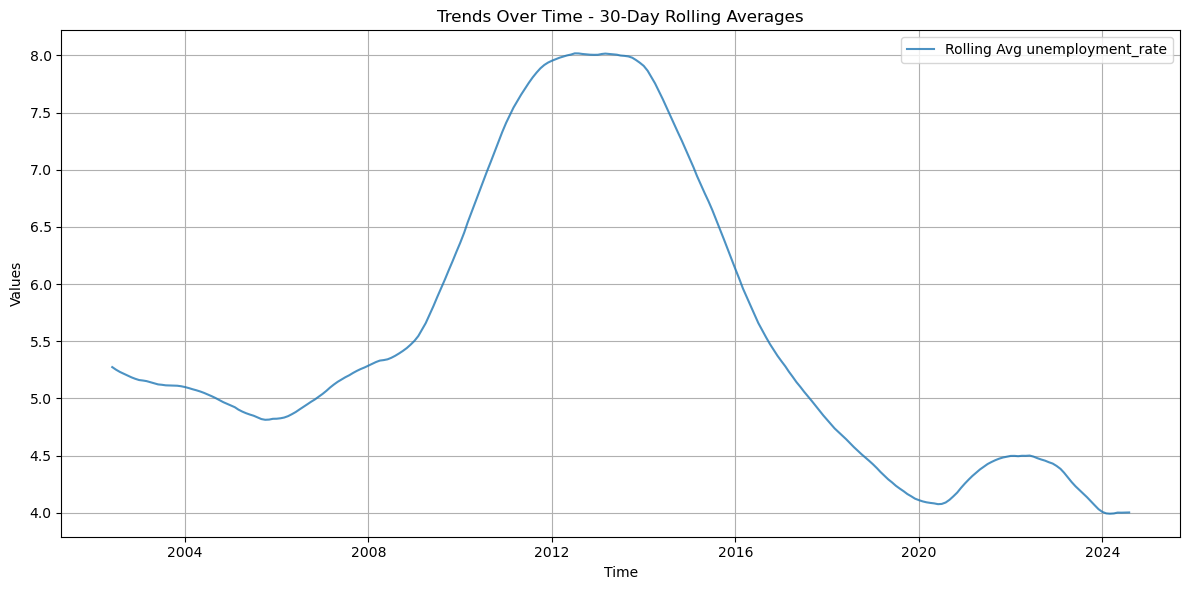

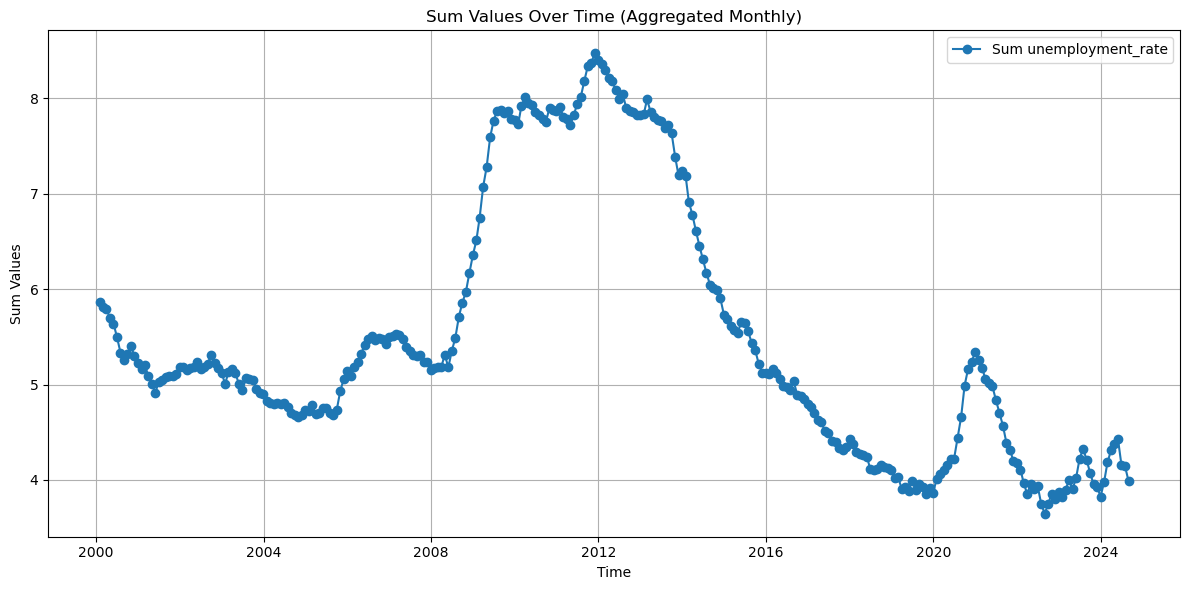

Visualization complete for economic_indicators
Plots saved to economic_indicators_over_time_1.pdf


In [100]:
# Create a PDF.
# Define a list of plotting functions with their arguments
plot_functions = [
    lambda: visualize_trend_over_time(economic_indicators, time_col='date', value_cols=['gdp_rate'], aggregation='sum', rolling_window=30, file_name="economic_indicators"),
    lambda: visualize_trend_over_time(economic_indicators, time_col='date', value_cols=['cpi_rate'], aggregation='sum', rolling_window=30, file_name="economic_indicators"),
    lambda: visualize_trend_over_time(economic_indicators, time_col='date', value_cols=['unemployment_rate'], aggregation='sum', rolling_window=30, file_name="economic_indicators")
]

# Save plots to a single PDF
save_plots_to_pdf(plot_functions, pdf_path="economic_indicators_over_time_1.pdf")


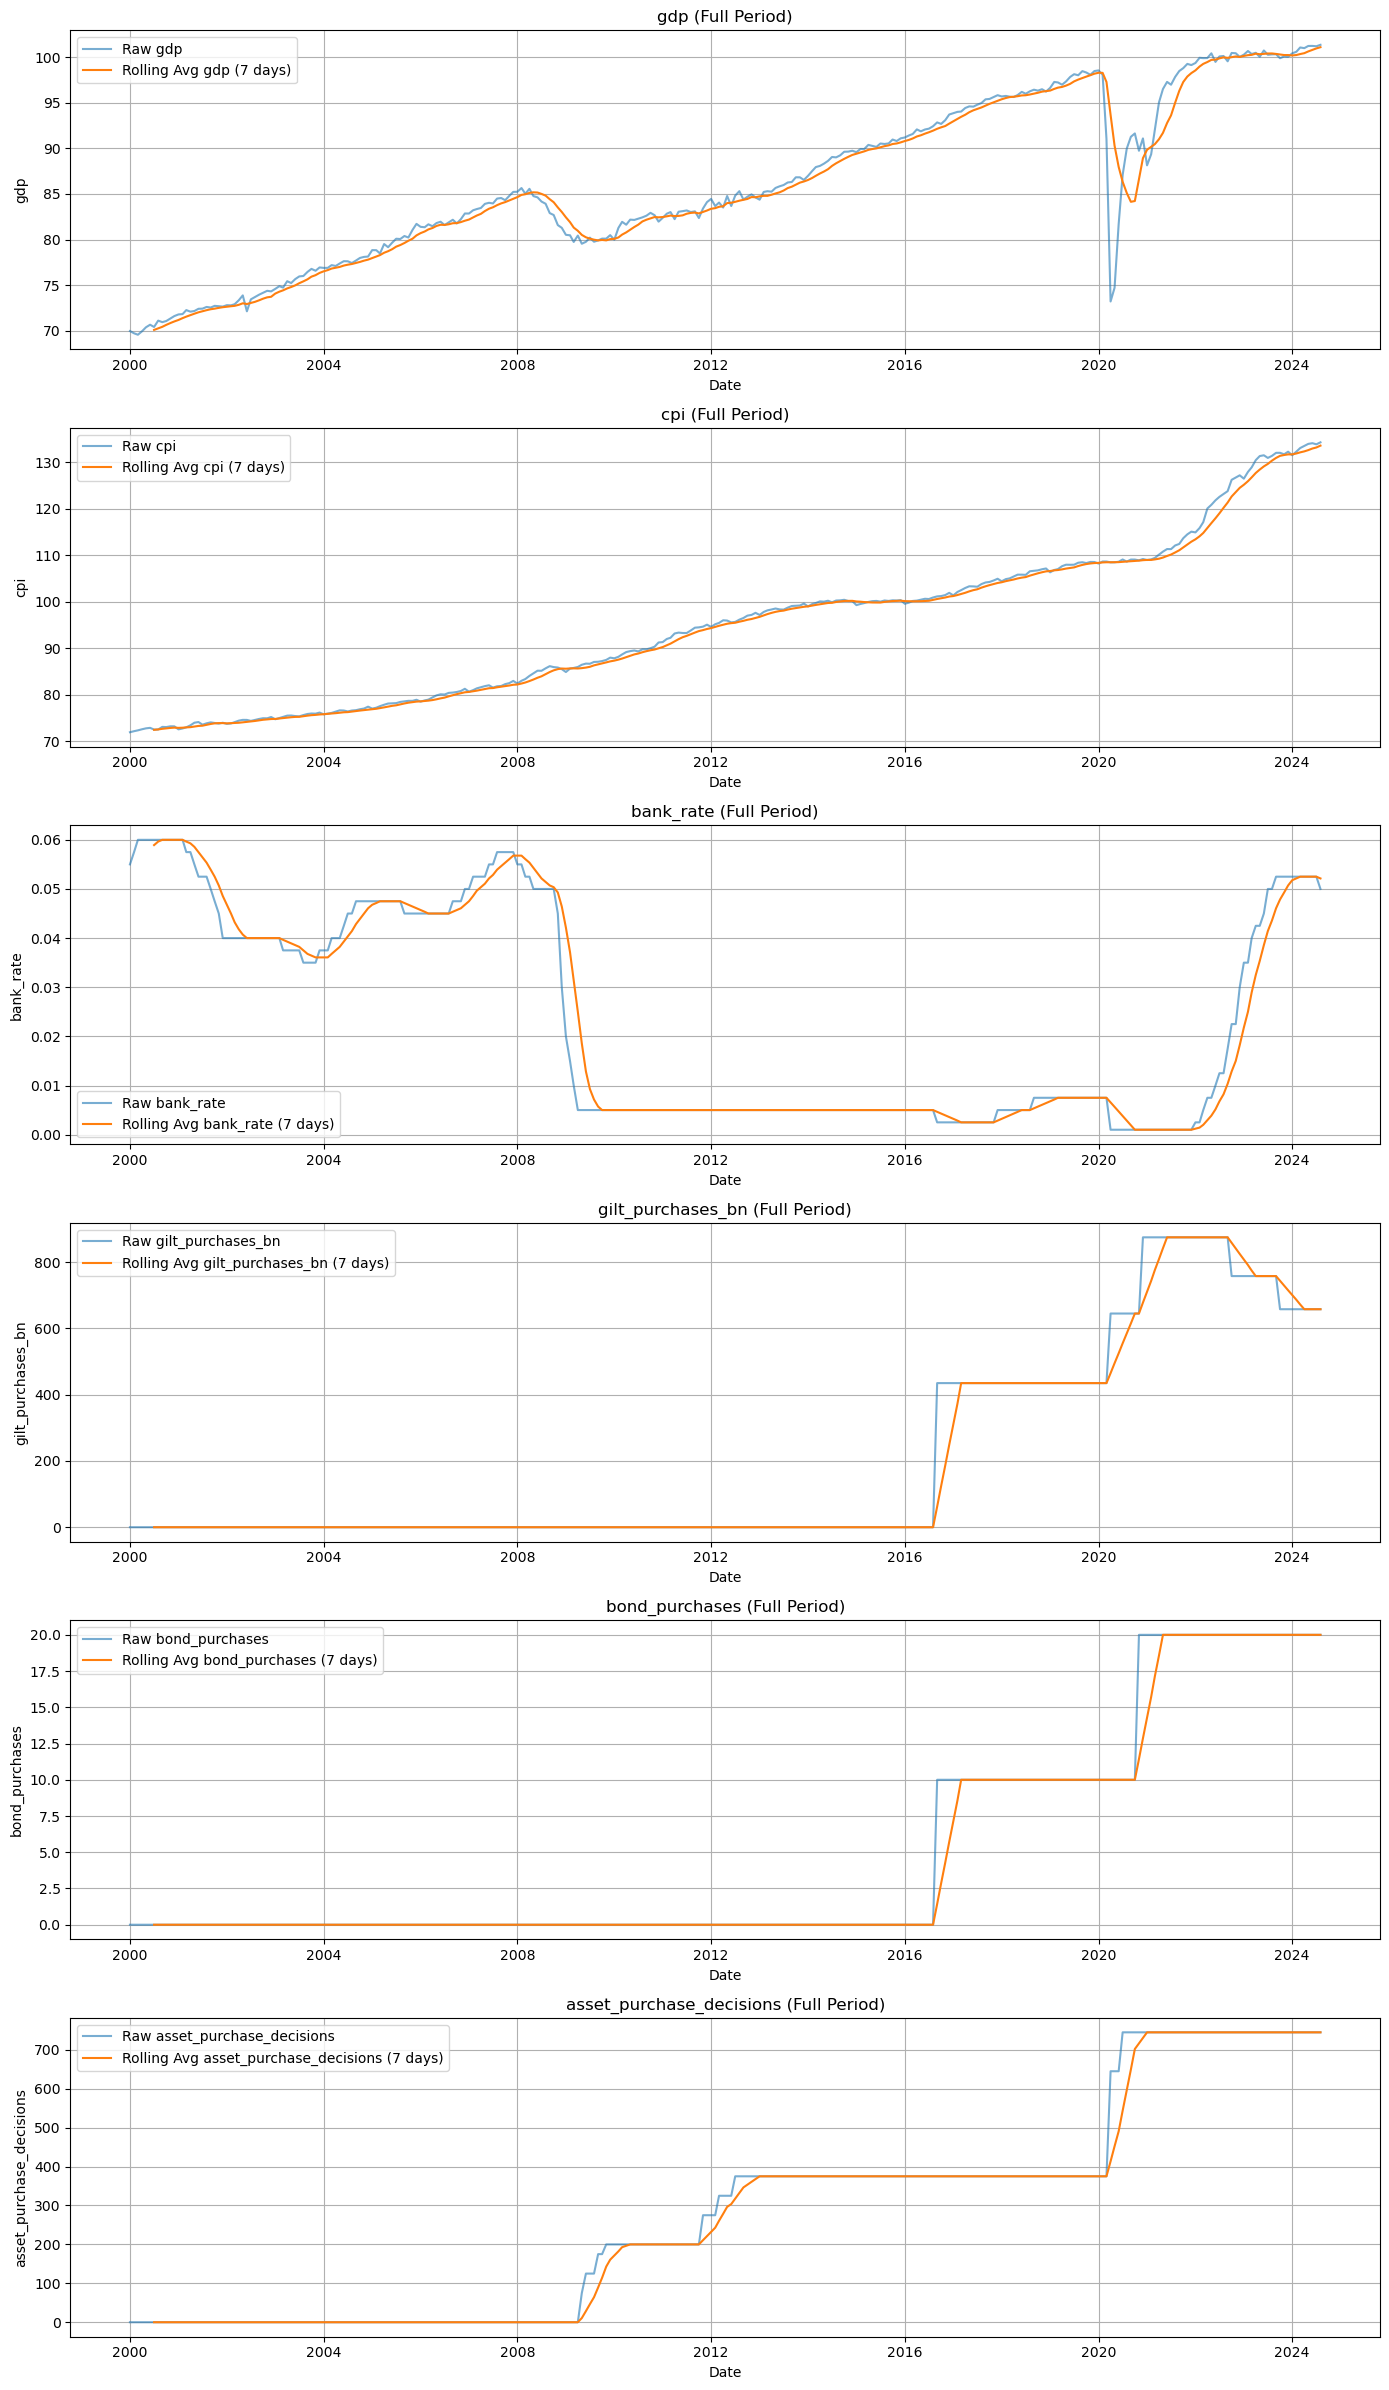

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_raw_and_rolling_values(df, columns, rolling_window=7):
    """
    Plots raw and rolling trends for specified columns in the DataFrame.
    """
    # Ensure the date column is in datetime format
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])  # Drop rows with NaT dates
    df = df.sort_values(by='date')   # Sort by date for clean plotting

    # Set up the figure for multiple plots
    fig, axes = plt.subplots(len(columns), 1, figsize=(14, 4 * len(columns)))
    if len(columns) == 1:
        axes = [axes]  # Make axes iterable for a single plot

    # Plot each specified column
    for i, col in enumerate(columns):
        ax = axes[i]
        # Plot raw values
        ax.plot(df['date'], df[col], label=f'Raw {col}', alpha=0.6)
        # Plot rolling mean
        ax.plot(df['date'], df[col].rolling(window=rolling_window).mean(),
                label=f'Rolling Avg {col} ({rolling_window} days)')
        
        # Configure plot appearance
        ax.set_title(f'{col} (Full Period)')
        ax.set_xlabel('Date')
        ax.set_ylabel(col)
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

columns_to_plot = ['gdp', 'cpi', 'bank_rate', 'gilt_purchases_bn', 'bond_purchases', 'asset_purchase_decisions']

# Call the function 
plot_raw_and_rolling_values(economic_indicators, columns=columns_to_plot, rolling_window=7)

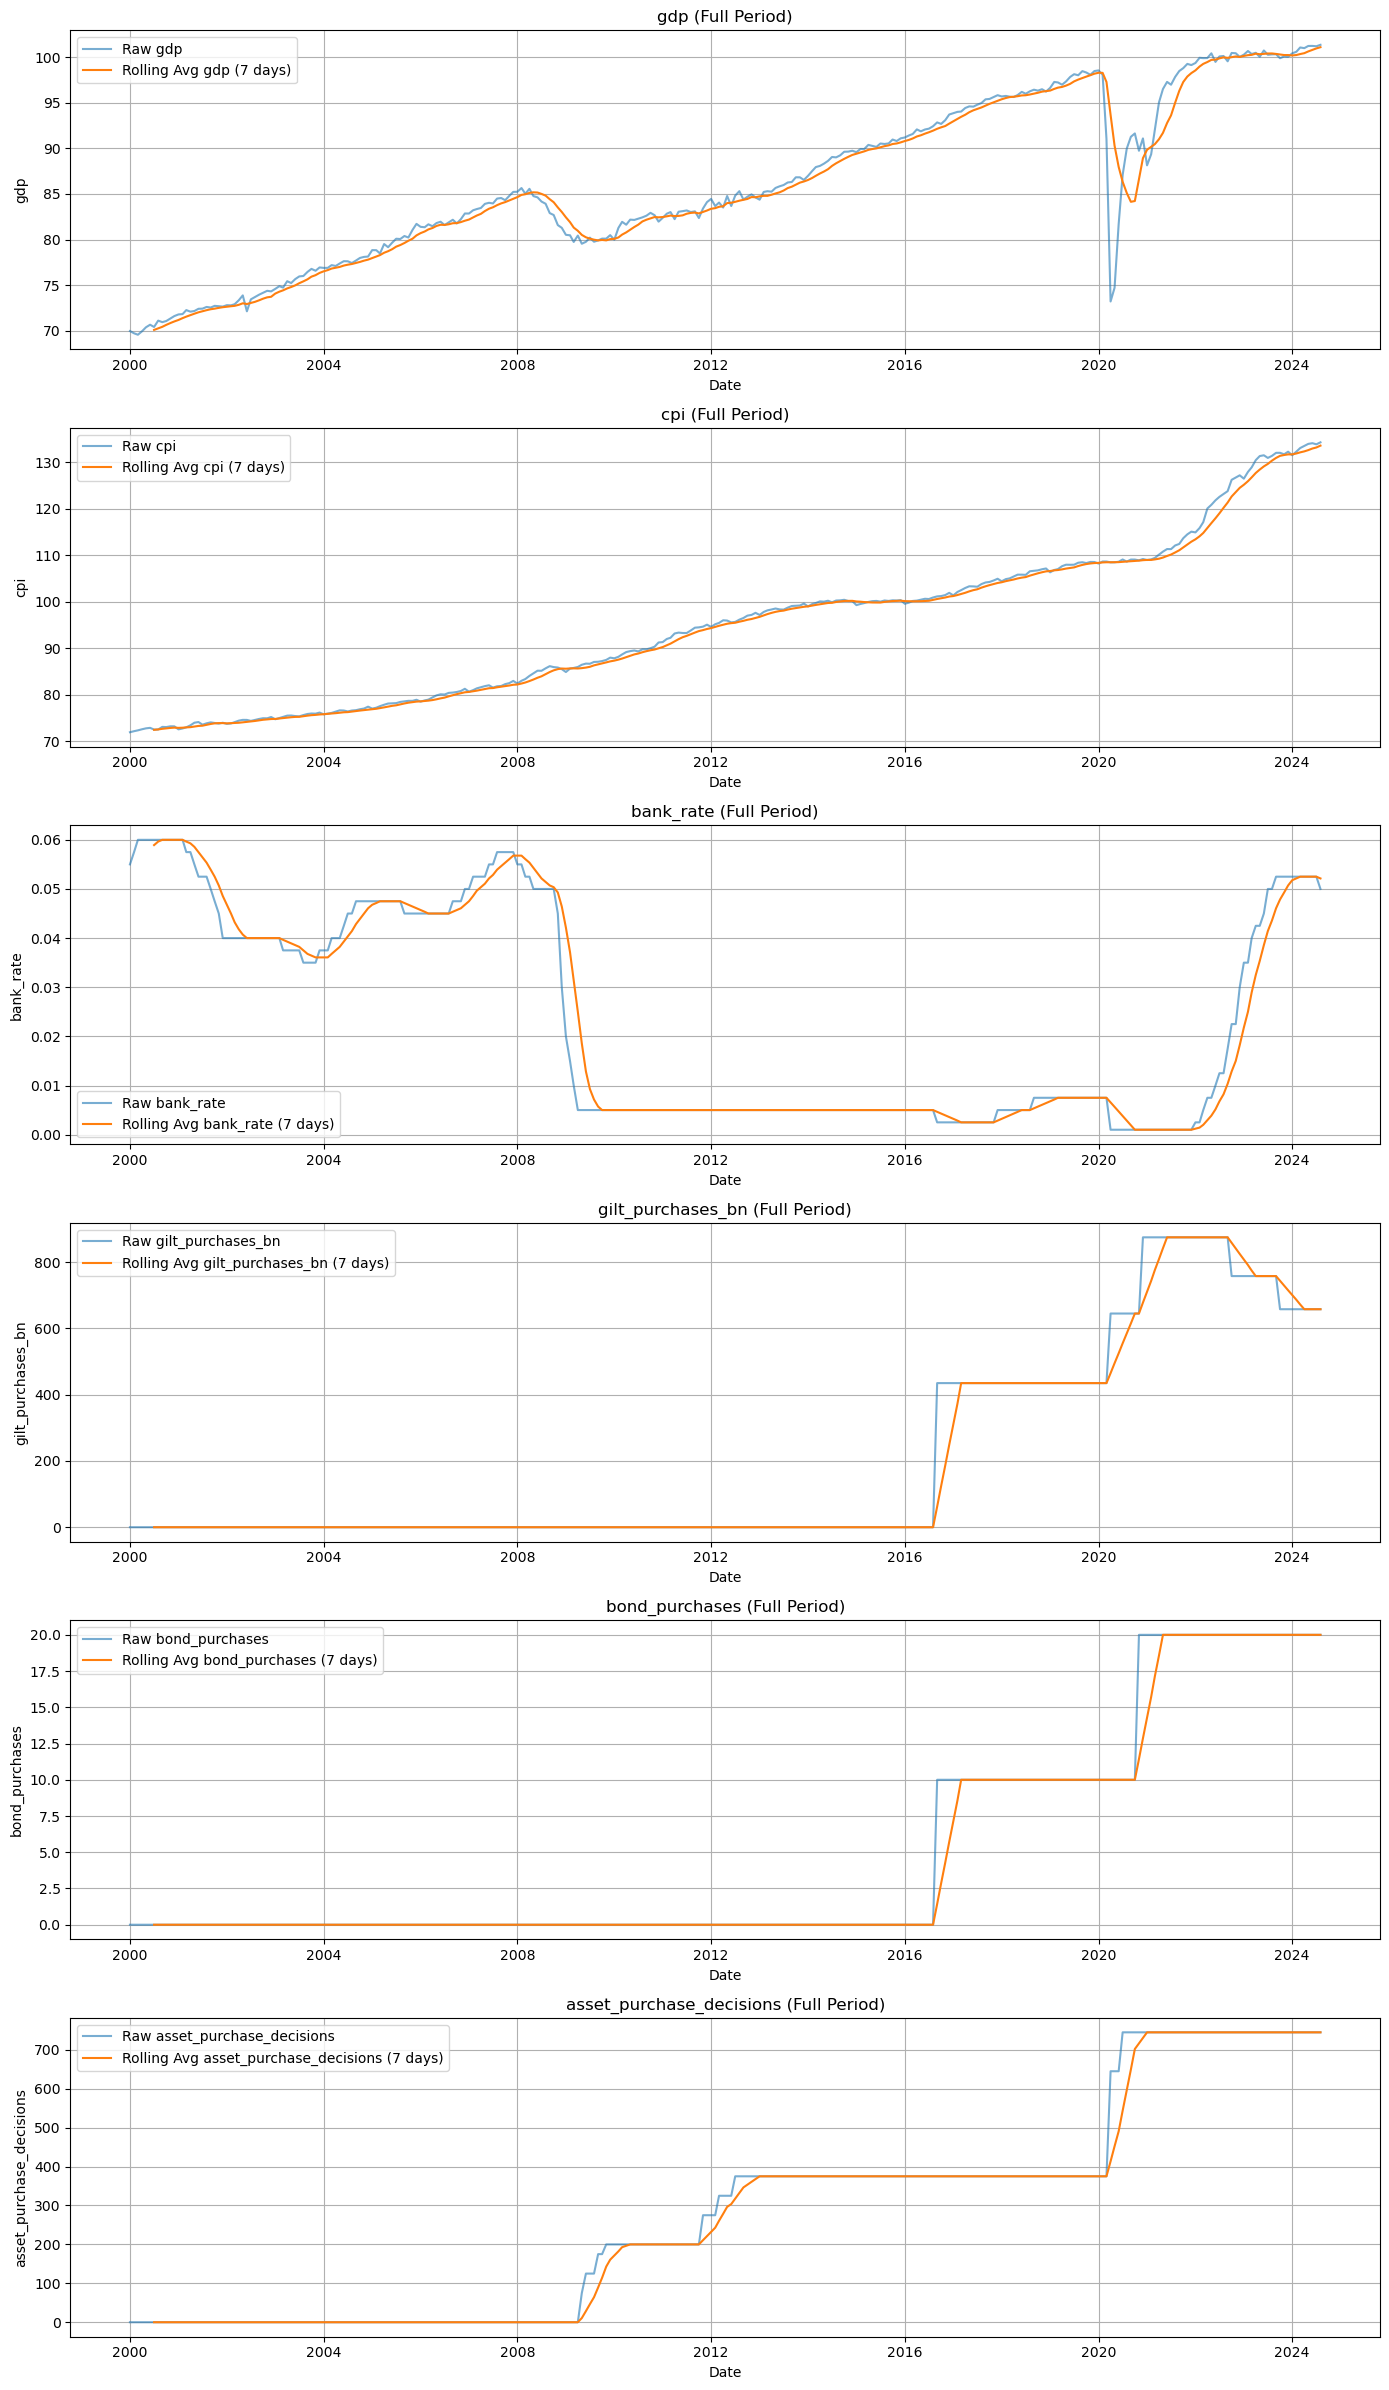

Plots saved to economic_indicators_over_time_2.pdf


In [102]:
# Create a PDF.
# Define a list of plotting functions with their arguments
plot_functions = [
    lambda: plot_raw_and_rolling_values(economic_indicators, columns=columns_to_plot, rolling_window=7)
]

# Save plots to a single PDF
save_plots_to_pdf(plot_functions, pdf_path="economic_indicators_over_time_2.pdf")


##### **Business Observation:**

**Bank Rate Trends:**
- Financial Crisis (2008): The Bank Rate, which reflects central bank interest rates, shows a significant drop around 2008. This reduction in the rate is typical during economic downturns as central banks lower interest rates to stimulate borrowing, spending, and investment. This was part of a broader effort to stabilize economies during the global financial crisis.
- Post-2008 Period: After the initial crisis, the Bank Rate remains low for an extended period, indicating a prolonged effort to support economic recovery. Rates stay low throughout the 2010s, reflecting continued caution and a slow return to normal monetary policy.
- COVID-19 (2020): Another sharp decline in the Bank Rate is visible around the start of the pandemic. Central banks once again reduced rates quickly to support economies facing sudden contractions due to lockdowns and other restrictions.

**Stock of Govt. Bond Purchases:**
- Introduction of Quantitative Easing (2008-2009): The rise in the Stock of Govt. Bond Purchases around 2008-2009 reflects quantitative easing (QE) initiatives. By purchasing government bonds, central banks aimed to inject liquidity into the financial system, encouraging lending and investment.
- Sustained Growth: Over the following years, the stock of government bond purchases continues to rise, showing the central bank’s sustained efforts to support the economy through asset purchases.
- COVID-19 Response (2020): The data shows a renewed increase in government bond purchases in 2020, highlighting a similar QE response to provide liquidity and stabilize markets as the pandemic disrupted economic activity.

**Asset Purchase Decisions:**
- Financial Crisis Response: The Asset Purchase Decisions trend aligns with the timing of government bond purchases, reflecting the decision to purchase additional assets to maintain economic stability.
- Pandemic-Induced Increase: During COVID-19, the central bank once again ramped up asset purchases, as indicated by a significant increase in this metric. This demonstrates an aggressive monetary policy stance aimed at cushioning the economy from the shock of the pandemic.

**[Table of Contents](#Table_of_contents)**

#

# 4 Sentiment Analysis on Speech Data

<a id="Naive_Bayes_Sentiment_Classifier"></a>
## 4.1 Naive Bayes Sentiment Classifier

### I. Wordclouds and Frequency distribution

In [108]:
# Define the function:
def tokenize_and_wordcloud(df, columns, colormaps):
    """
    Tokenize text, create word clouds, and generate frequency distribution.
    Removes stopwords during tokenization.
    """
    if len(columns) != len(colormaps):
        raise ValueError("The number of columns must match the number of colormaps.") 
    
    stop_words = set(stopwords.words('english'))  # Load stopwords list
    freq_dists = {}
    
    for i, col in enumerate(columns):
        # Tokenize the text column and remove stopwords
        df[f'{col}_tokens'] = df[col].apply(
            lambda x: [word for word in word_tokenize(str(x)) if word.lower() not in stop_words and word.isalpha()]
        )
        
        # Create a single string of all tokens for the WordCloud
        all_text = ' '.join([' '.join(tokens) for tokens in df[f'{col}_tokens']])
        
        # Generate a WordCloud with the specified colormap for this column
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormaps[i]).generate(all_text)

        # Plot the WordCloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'WordCloud for {col}', fontsize=16)
        plt.show()
        
        # Generate Frequency Distribution
        all_tokens = [token for tokens in df[f'{col}_tokens'] for token in tokens]
        freq_dist = FreqDist(all_tokens)
        
        # Store the frequency distribution in the dictionary
        freq_dists[col] = freq_dist
        
        # Plot the 20 most common words
        plt.figure(figsize=(10, 5))
        freq_dist.plot(20, cumulative=False, title=f'Frequency Distribution for {col}')
        plt.show()

         # Print the most common words
        most_common = freq_dist.most_common(20)  # Get the top 20 most common words
        print(f'Most common words for {col}:')
        for word, count in most_common:
            print(f'{word}: {count}')
        print('\n')  
    
    return freq_dists

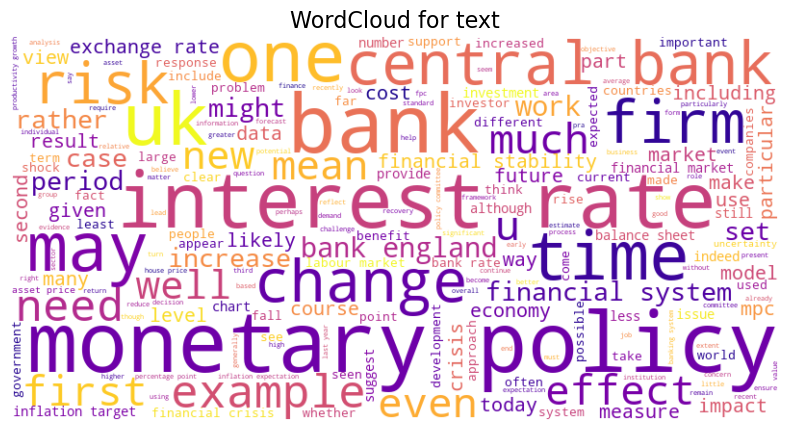

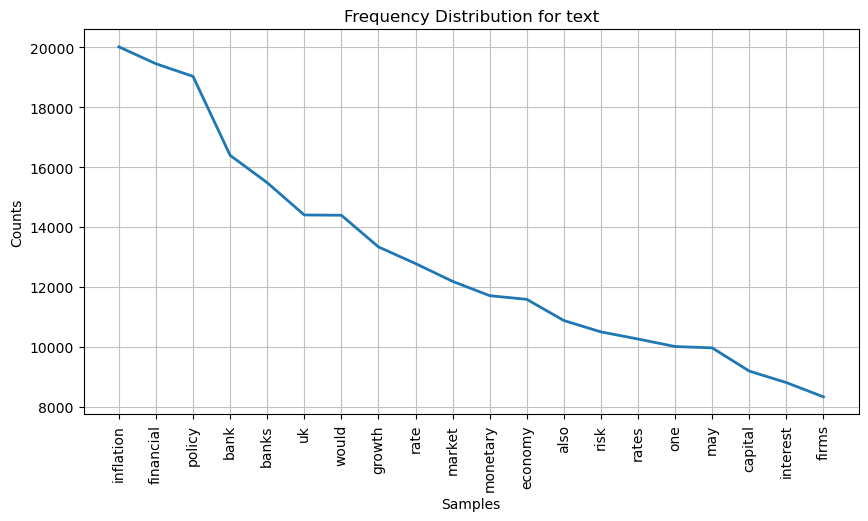

Most common words for text:
inflation: 20019
financial: 19454
policy: 19032
bank: 16395
banks: 15481
uk: 14402
would: 14393
growth: 13335
rate: 12779
market: 12184
monetary: 11706
economy: 11583
also: 10876
risk: 10496
rates: 10258
one: 10007
may: 9962
capital: 9187
interest: 8803
firms: 8326




In [110]:
# Define your text columns and colors
text_columns = ['text']
column_colors = ['plasma']

# Apply tokenization, generate word clouds, and frequency distributions
freq_dists = tokenize_and_wordcloud(speeches, text_columns, column_colors)

###

### II. Polarity and Sentiment Scores

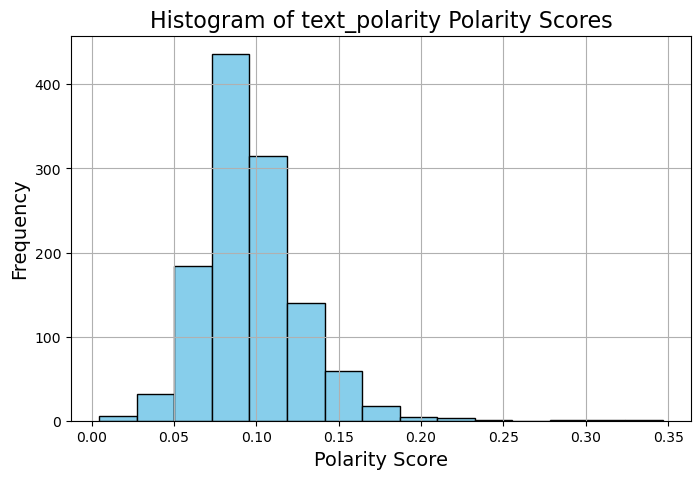

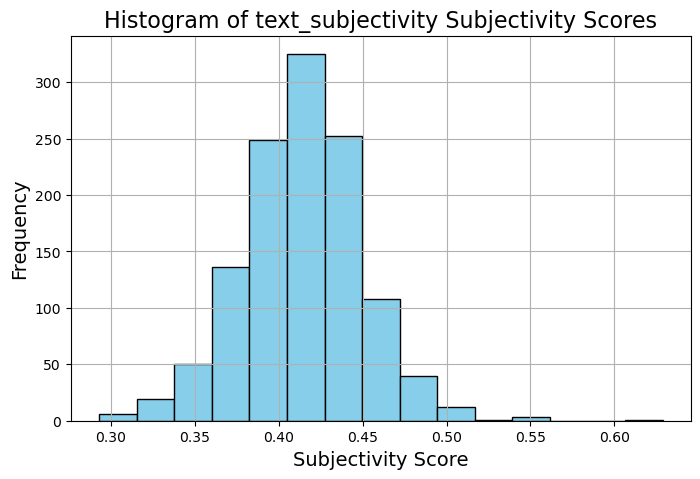

                                                   text  text_polarity  \
0     thank you chairman im actually very pleased to...       0.083288   
1     its a great pleasure to be here in the beautif...       0.076711   
2     few industries have suffered more from volatil...       0.091432   
3     my topic this evening is the use of forecasts ...       0.086707   
4     six years ago this week sterling left the exch...       0.058467   
...                                                 ...            ...   
1197  thank you very much for the invitation to spea...       0.102899   
1198  huw pill talks about how we will bring inflati...       0.089167   
1199  we are meeting in the most difficult of times ...       0.104092   
1200  these are divided into seven categories suffra...       0.123791   
1201  between them the covid pandemic and russias in...       0.075980   

      text_subjectivity  
0              0.435206  
1              0.368726  
2              0.394993  
3      

In [112]:
# Extract both polarity and subjectivity.
def generate_sentiment(comment):
    '''Extract both polarity (-1 to +1) and subjectivity (0 to 1) for each comment'''
    sentiment = TextBlob(comment).sentiment
    return sentiment.polarity, sentiment.subjectivity

# Plot the sentiment histogram (polarity and subjectivity) and save the image
def plot_sentiment_histogram(df, column, bins=15, sentiment_type='Polarity', filename=None):
    '''Generate histogram plot of sentiment polarity or subjectivity scores and save the plot to a file'''
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column} {sentiment_type} Scores', fontsize=16)
    plt.xlabel(f'{sentiment_type} Score', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    
    # Save the plot if a filename is provided
    if filename is None:
        filename = f'{column}_{sentiment_type}_histogram.png'
    plt.savefig(filename)
    
    plt.show()

# Apply extraction and plot histograms.
def apply_sentiment_and_plot(df, text_columns):
    '''Apply sentiment function to text columns and plot histograms for both polarity and subjectivity'''
    for col in text_columns:
        # Apply sentiment function to each column and create new columns for polarity and subjectivity
        df[[f'{col}_polarity', f'{col}_subjectivity']] = df[col].apply(
            lambda x: pd.Series(generate_sentiment(x))
        )
        
        # Plot histogram of polarity scores for this column and save it
        plot_sentiment_histogram(df, f'{col}_polarity', sentiment_type='Polarity', filename=f'{col}_polarity_histogram.png')
        
        # Plot histogram of subjectivity scores for this column and save it
        plot_sentiment_histogram(df, f'{col}_subjectivity', sentiment_type='Subjectivity', filename=f'{col}_subjectivity_histogram.png')

# Define your text columns to apply the sentiment function
text_columns = ['text']

# Apply the sentiment score generation and histogram plotting
apply_sentiment_and_plot(speeches, text_columns)

# Display the DataFrame with the new sentiment columns
print(speeches[['text', 'text_polarity', 'text_subjectivity']])


**Data Observations:**

- **Polarity Scores**:
The polarity scores for the speeches appear mostly neutral to slightly positive, with values clustering closer to zero.
There are a few speeches with higher polarity scores (e.g., 0.9), suggesting some positive sentiment, but these are limited.

- **Subjectivity Scores**:
The subjectivity scores show a range of values, with some speeches being relatively objective (e.g., values closer to 0.3) and others more subjective (e.g., values closer to 0.5).
This range indicates that while some speeches maintain a more neutral tone, others have a subjective quality, possibly reflecting personal opinions or emotional appeals by the speakers.

- **General Sentiment Trend**:
Overall, the speeches are generally neutral to slightly positive, with moderate subjectivity. This aligns with the formal and informational nature of most speeches, especially those with a focus on policy or economic discussions.

###

### III. Top 20 Positive and Negative Speeches

In [114]:
top_positive = speeches.sort_values(by='text_polarity', ascending=False)
top_positive.head()

reference       date   author  is_gov  \
1019  r190725a_BOE 2019-07-25  breeden   False   
68    r001002a_BOE 2000-10-02   george   False   
568   r130426a_BOE 2013-04-26     king    True   
1032  r191010a_BOE 2019-10-10  no_info   False   
347   r090529a_BOE 2009-05-29  no_info   False   

                                                   text  year  text_length  \
1019  at the most senior levels in the organisation ...  2019         1801   
68    call me a masochist if you like but i actually...  2000         8524   
568   good morning everyone i am delighted to welcom...  2013         4145   
1032  it is a pleasure to be back at turner contempo...  2019         6433   
347   i am delighted and honoured to be asked to ope...  2009         6001   

                                            text_tokens  text_polarity  \
1019  [senior, levels, organisation, visibly, suppor...       0.346667   
68    [call, masochist, like, actually, enjoy, job, ...       0.307699   
568   [good, morning, everyone, delighted, welcome, ...       0.286045   
1032  [pleasure, back, turner, contemporary, margate...       0.239464   
347   [delighted, honoured, asked, open, magnificent...       0.221934   

      text_subjectivity  
1019           0.628889  
68             0.497836  
568            0.528787  
1032           0.481695  
347            0.541410

In [116]:
top_negative = speeches.sort_values(by='text_polarity')
top_negative.head()

reference       date    author  is_gov  \
948  r180928b_BOE 2018-09-28   no_info   False   
520  r120606a_BOE 2012-06-06    gracie   False   
189  r041125a_BOE 2004-11-25      bean   False   
885  r170929a_BOE 2017-09-29  cunliffe   False   
777  r160224a_BOE 2016-02-24  cunliffe   False   

                                                  text  year  text_length  \
948  shadow banks didnt contain problems they sprea...  2018         2756   
520  all speeches are available online at corporate...  2012        17146   
189  good evening i understand that the queen has a...  2004        13122   
885  this month marks the  anniversary of the failu...  2017        26665   
777  there is a wellknown myth  much loved in manag...  2016        23291   

                                           text_tokens  text_polarity  \
948  [shadow, banks, didnt, contain, problems, spre...       0.004528   
520  [speeches, available, online, corporate, failu...       0.015819   
189  [good, evening, understand, queen, also, colch...       0.018555   
885  [month, marks, anniversary, failure, northern,...       0.023257   
777  [wellknown, myth, much, loved, management, sch...       0.023947   

     text_subjectivity  
948           0.359551  
520           0.378361  
189           0.376482  
885           0.433588  
777           0.403191

##

<a id="Loughran_and_McDonald_Sentiment_Word_Lists"></a>
## 4.2 BoE Wordlist - Loughran and McDonald Sentiment Word Lists

In [118]:
# Select only the binary columns (ignoring 'word')
binary_columns = sentiment_wordlist.columns[1:]

# Count 0s and 1s for each binary column
count_zeros_ones = {}

for col in binary_columns:
    count_zeros_ones[col] = sentiment_wordlist[col].value_counts()

# Convert the results to a DataFrame for easy viewing, filling NaNs with 0
count_zeros_ones_df = pd.DataFrame(count_zeros_ones).fillna(0).astype(int)

# Display the counts
print(count_zeros_ones_df)


   negative  positive  uncertainty  litigious  strong  weak  constraining
0      1525      3522         3583       2975    3861  3853          3696
1      2355       358          297        905      19    27           184


- The provided dataset result significantly unbalanced.

In [121]:
# Creating sets for faster lookup
negative_words = set(sentiment_wordlist[sentiment_wordlist['negative'] == 1]['word'])
positive_words = set(sentiment_wordlist[sentiment_wordlist['positive'] == 1]['word'])
# uncertainty_words = set(sentiment_wordlist[sentiment_wordlist['uncertainty'] == 1]['word'])
# litigious_words = set(sentiment_wordlist[sentiment_wordlist['litigious'] == 1]['word'])

negate = {"aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt", "ain't", "aren't", "can't",
          "couldn't", "daren't", "didn't", "doesn't", "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt",
          "neither", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "neednt", "needn't",
          "never", "none", "nope", "nor", "not", "nothing", "nowhere", "oughtnt", "shant", "shouldnt", "wasnt",
          "werent", "oughtn't", "shan't", "shouldn't", "wasn't", "weren't", "without", "wont", "wouldnt", "won't",
          "wouldn't", "rarely", "seldom", "despite", "no", "nobody"} 

def negated(word):
    """Determine if the preceding word is a negation word."""
    return word.lower() in negate

def tone_count_with_negation_check(article):
    """Count positive and negative words with negation check."""
    pos_count = 0
    neg_count = 0
    pos_words = []
    neg_words = []

    # Extract individual words from the article
    input_words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', article.lower())
    word_count = len(input_words)

    for i in range(word_count):
        word = input_words[i]
        
        # Check if the word is negative
        if word in negative_words:
            neg_count += 1
            neg_words.append(word)
        
        # Check if the word is positive, with negation check
        elif word in positive_words:
            # Check for negation within the last 3 words
            if (i >= 1 and negated(input_words[i - 1])) or \
               (i >= 2 and negated(input_words[i - 2])) or \
               (i >= 3 and negated(input_words[i - 3])):
                neg_count += 1
                neg_words.append(word + ' (with negation)')
            else:
                pos_count += 1
                pos_words.append(word)

    return pos_count, neg_count, pos_words, neg_words

# Initializing new columns in the DataFrame
speeches['pos_count'] = 0
speeches['neg_count'] = 0
speeches['pos_words'] = ''
speeches['neg_words'] = ''

# Iterate through the rows of the DataFrame and analyze the text in the 'text' column
for index, row in speeches.iterrows():
    speeches_text = row['text']
    
    # Call the function to analyze each speech text
    pos_count, neg_count, pos_words, neg_words = tone_count_with_negation_check(speeches_text)

    # Update the DataFrame with the results
    speeches.at[index, 'pos_count'] = pos_count
    speeches.at[index, 'neg_count'] = neg_count
    speeches.at[index, 'pos_words'] = ', '.join(pos_words)  # Join list to a string for storage
    speeches.at[index, 'neg_words'] = ', '.join(neg_words)  # Join list to a string for storage

# Now you should have pos_count and neg_count available in your DataFrame
speeches.head()


reference       date   author  is_gov  \
0  r980915a_BOE 1998-09-15   george   False   
1  r981021b_BOE 1998-10-21   george   False   
2  r981021a_BOE 1998-10-21     king    True   
3  r981101a_BOE 1998-11-01     budd   False   
4  r981101b_BOE 1998-11-01  vickers   False   

                                                text  year  text_length  \
0  thank you chairman im actually very pleased to...  1998        13731   
1  its a great pleasure to be here in the beautif...  1998        24263   
2  few industries have suffered more from volatil...  1998        13678   
3  my topic this evening is the use of forecasts ...  1998        27679   
4  six years ago this week sterling left the exch...  1998        27693   

                                         text_tokens  text_polarity  \
0  [thank, chairman, im, actually, pleased, oppor...       0.083288   
1  [great, pleasure, beautiful, city, bruges, hon...       0.076711   
2  [industries, suffered, volatility, british, ec...       0.091432   
3  [topic, evening, use, forecasts, economic, pol...       0.086707   
4  [six, years, ago, week, sterling, left, exchan...       0.058467   

   text_subjectivity  pos_count  neg_count  \
0           0.435206         38         61   
1           0.368726         82         87   
2           0.394993         32         62   
3           0.476692         36         83   
4           0.394488         43        103   

                                           pos_words  \
0  pleased, opportunity, stability, growth, growt...   
1  great, pleasure, beautiful, opportunity, succe...   
2  able, transparency, stability, good, opportuni...   
3  greatly, influential, advantage, enable, best,...   
4  stability, growth, stability, stability, stabi...   

                                           neg_words  
0  serious, concerns, concern, seriously, problem...  
1  deliberate, wrong, arguments, crucial, suffere...  
2  suffered, volatility, volatile, decline, decli...  
3  grossly, dispute, absence, question, suspiciou...  
4  unemployment, force, question, problem, distur...

In [125]:
# Save the speeches DF with sentiment score as a .csv file
speeches.to_csv('loughran_mcdonald_sentimentscore.csv', index=False)

##### **Note on TextBlob for Sentiment Analysis**

While TextBlob offers quick sentiment analysis, it's limited for our business question—predicting sentiment based on economic indicators—for several reasons:

- **Lacks Multi-Dimensional Sentiment**: TextBlob provides a single polarity score, insufficient for mixed sentiments (e.g., positive on growth, negative on inflation).
- **Simplistic Polarity**: It struggles with nuanced sentiment, lacking distinctions between subtle variations like slightly or strongly positive.
- **Outdated NLP Approach**: TextBlob uses a basic lexicon-based method, missing advanced techniques (e.g., transformers) that capture context.
- **Inaccurate Polarity Detection**: TextBlob often misclassifies negative speeches as positive, making it unsuitable for this study.

##

<a id="4_Exploratory_Data_Visualisations"></a>
## 4.3 Exploratory Data Visualisations

### I.	Timeline and Speech Sentiment Changes

In [128]:
# Calculate net sentiment (positive count - negative count)
speeches['net_sentiment'] = speeches['pos_count'] - speeches['neg_count']

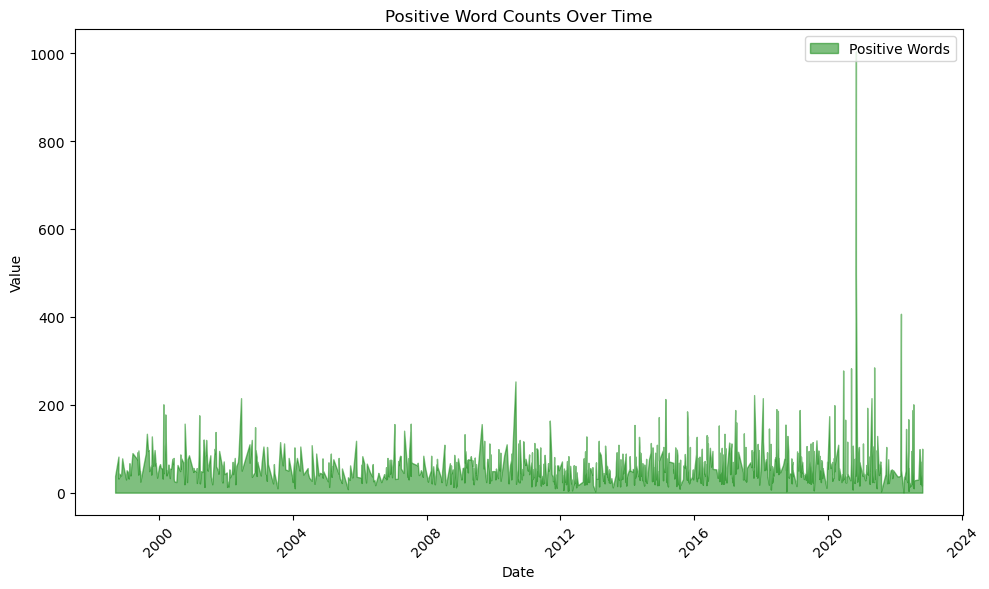

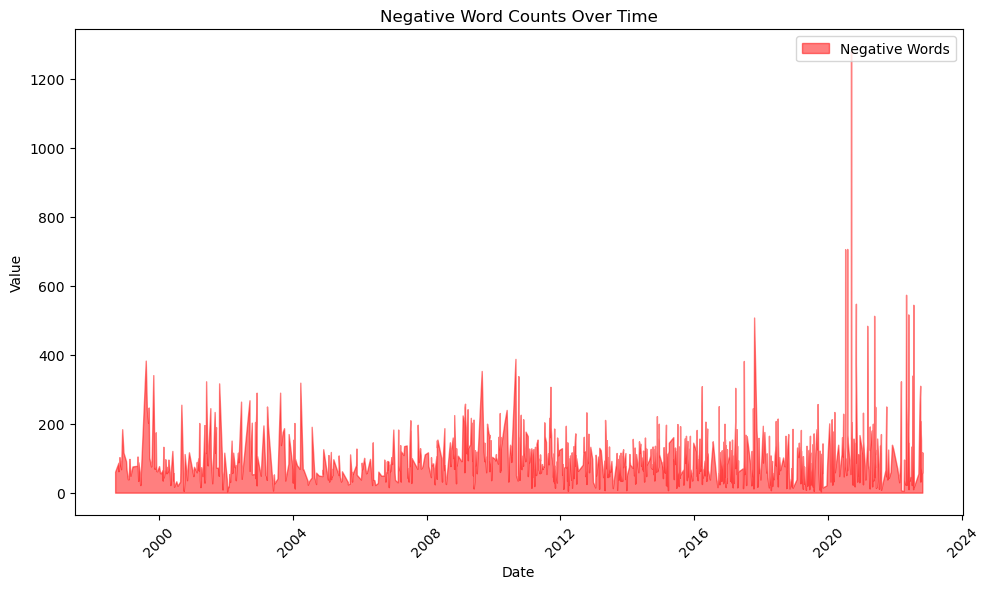

In [130]:

def plot_stacked_area(df, date_column, columns, labels=None, colors=None, title="Stacked Area Plot"):
    """
    Plots a stacked area chart for specified columns over time.
    """
    # Convert date column to datetime format if it isn't already
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    
    # Default labels and colors if not provided
    if labels is None:
        labels = columns
    if colors is None:
        colors = plt.cm.Paired(range(len(columns)))  # Choose a color map for variety

    # Plot each column with fill_between
    plt.figure(figsize=(10, 6))
    for i, column in enumerate(columns):
        plt.fill_between(df[date_column], df[column], label=labels[i], color=colors[i], alpha=0.5)

    # Add labels, title, and legend
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()

    # Formatting
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function:
plot_stacked_area(df=speeches, date_column='date', columns=['pos_count'], labels=['Positive Words'], 
    colors=['green'], title="Positive Word Counts Over Time")

plot_stacked_area(df=speeches, date_column='date', columns=['neg_count'], labels=['Negative Words'], 
    colors=['red'], title="Negative Word Counts Over Time")


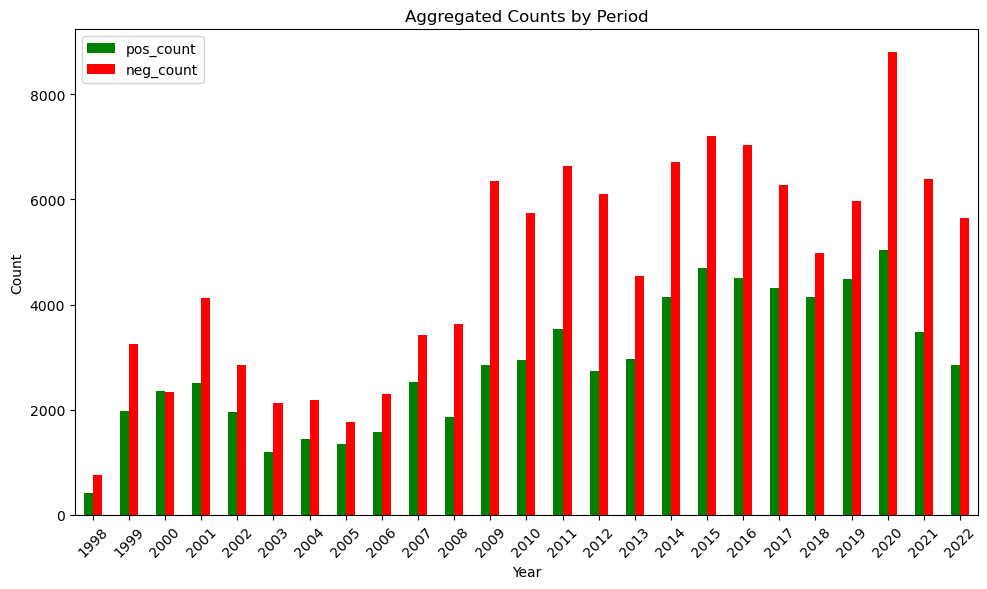

In [132]:
# Bar Plot for Aggregated Counts by a Specified Period
def plot_bar_aggregated_counts(df, date_column, columns, period='year', labels=None, colors=None, title="Aggregated Counts by Period"):
    """
    Plots a bar chart of aggregated counts by specified period.

    """
    # Convert date column to datetime format and extract the period
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df[period] = getattr(df[date_column].dt, period)
    
    # Aggregate by period and sum specified columns
    aggregated_counts = df.groupby(period)[columns].sum()
    
    # Plot
    aggregated_counts.plot(kind='bar', figsize=(10, 6), color=colors or ['blue', 'orange'])
    plt.title(title)
    plt.xlabel(period.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function
plot_bar_aggregated_counts(speeches, 'date', ['pos_count', 'neg_count'], period='year', labels=['Positive Words', 'Negative Words'], colors=['green', 'red'])


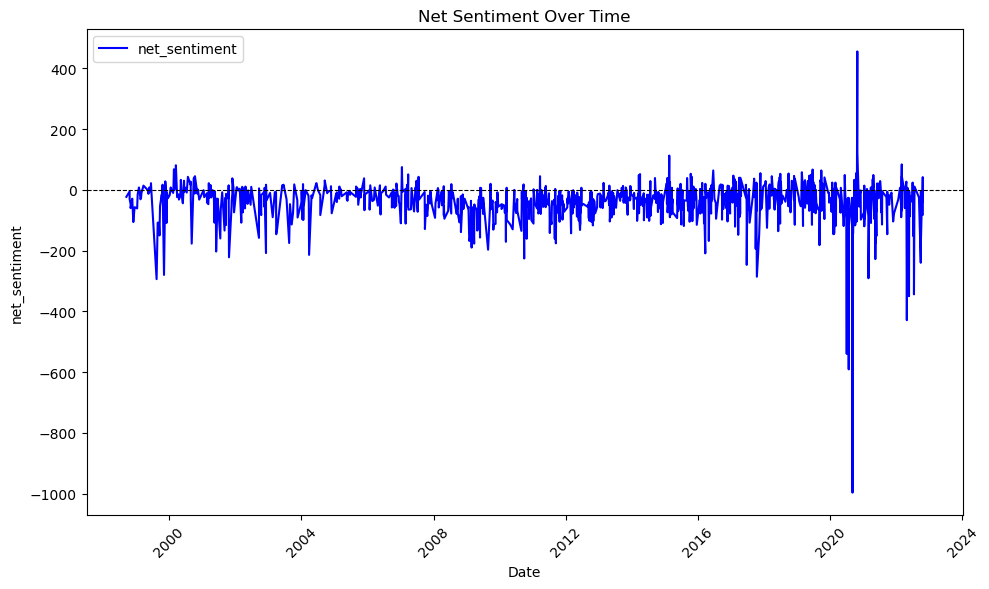

In [133]:
# Line Plot for Net Sentiment over time
def plot_line_over_time(df, date_column, value_column, title="Net Sentiment Over Time", line_color='blue'):
    """
    Plots a line graph over time for a specified value column.
    """
    # Ensure date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    
    plt.figure(figsize=(10, 6))
    plt.plot(df[date_column], df[value_column], color=line_color, label=value_column)
    plt.xlabel('Date')
    plt.ylabel(value_column)
    plt.title(title)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function
plot_line_over_time(speeches, 'date', 'net_sentiment', title="Net Sentiment Over Time", line_color='blue')


In [136]:
# Ensure the 'date' column is in datetime format
speeches['date'] = pd.to_datetime(speeches['date'])

# Extract the year from the 'date' column
speeches['year'] = speeches['date'].dt.year

# Group by year and calculate the average (mean) of pos_count and neg_count
yearly_avg = speeches.groupby('year')[['pos_count', 'neg_count']].mean().reset_index()

# Display the yearly averages
print(yearly_avg.head())


   year  pos_count  neg_count
0  1998  50.875000     95.500
1  1999  65.600000    108.300
2  2000  65.361111     65.000
3  2001  62.900000    102.975
4  2002  65.133333     94.800


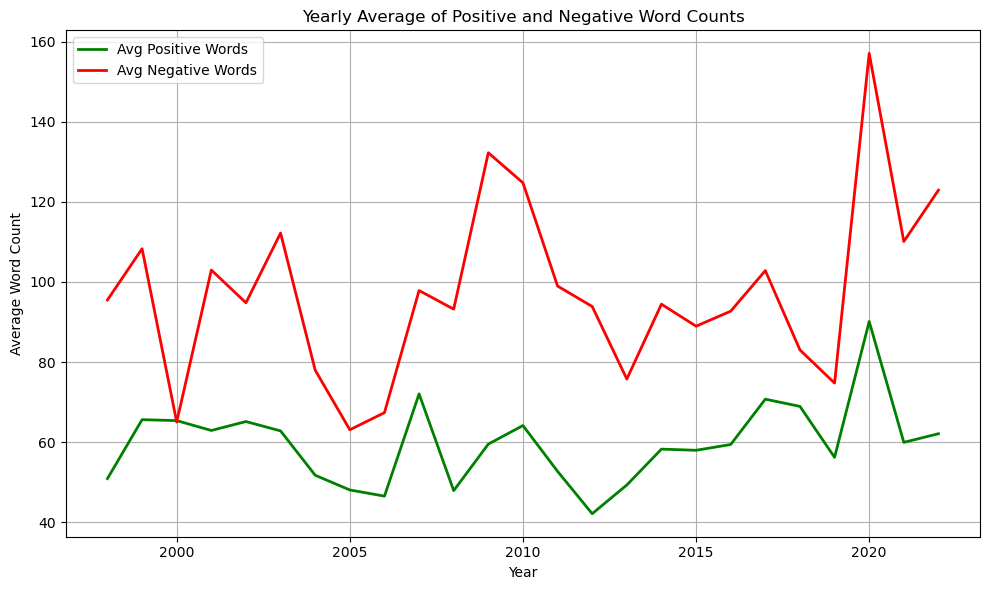

In [138]:
import matplotlib.pyplot as plt

# Plot the yearly averages
plt.figure(figsize=(10, 6))

# Plot positive word count average per year
plt.plot(yearly_avg['year'], yearly_avg['pos_count'], label='Avg Positive Words', color='green', linewidth=2)

# Plot negative word count average per year
plt.plot(yearly_avg['year'], yearly_avg['neg_count'], label='Avg Negative Words', color='red', linewidth=2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Word Count')
plt.title('Yearly Average of Positive and Negative Word Counts')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

###

### II. Pattern Investigation

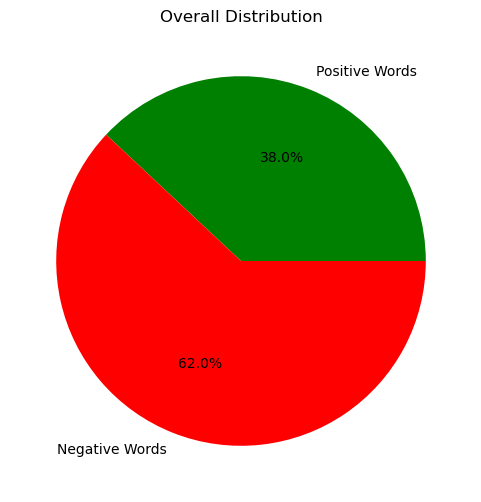

In [140]:
def plot_pie_chart(df, columns, labels=None, colors=None, title="Overall Distribution"):
    """
    Creates a pie chart for specified columns.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - columns (list of str): Columns to sum and display in the pie chart.
    - labels (list of str): Labels for the pie chart slices.
    - colors (list of str): Colors for each slice.
    - title (str): Title of the pie chart.
    """
    values = [df[col].sum() for col in columns]
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels or columns, autopct='%1.1f%%', colors=colors)
    plt.title(title)
    plt.show()

# Example usage
plot_pie_chart(speeches, ['pos_count', 'neg_count'], labels=['Positive Words', 'Negative Words'], colors=['green', 'red'])


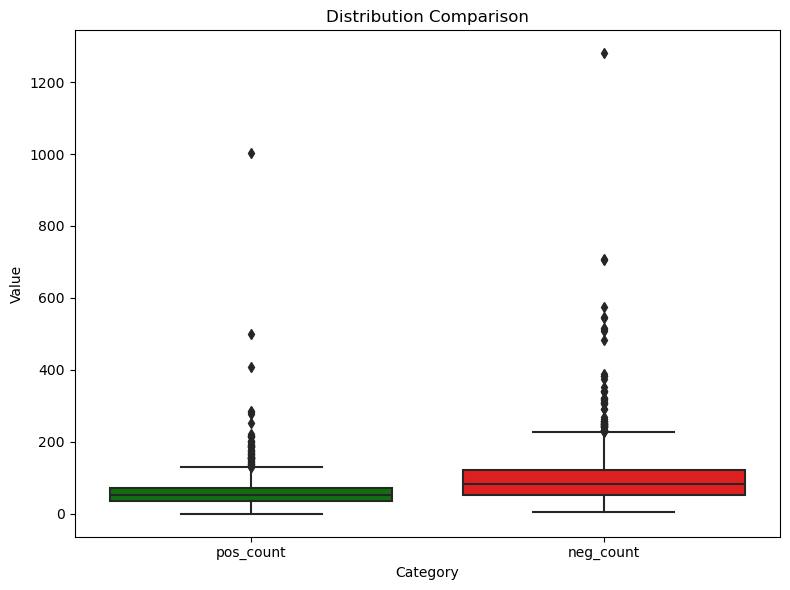

In [142]:
# Create a new DataFrame for box plot visualization
sentiment_data = pd.melt(speeches[['pos_count', 'neg_count']], var_name='Sentiment', value_name='Word Count')

# Box plot for Distribution comparision
def plot_box_plot(df, columns, labels=None, colors=None, title="Distribution Comparison"):
    """
    Creates a box plot for comparing distributions of specified columns.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - columns (list of str): Columns to compare.
    - labels (list of str): Labels for each column (default is column names).
    - colors (dict): Dictionary mapping columns to colors.
    - title (str): Title of the box plot.
    """
    data = pd.melt(df[columns], var_name='Category', value_name='Value')
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Category', y='Value', data=data, palette=colors)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Example usage
plot_box_plot(speeches, ['pos_count', 'neg_count'], labels=['Positive Words', 'Negative Words'], colors={'pos_count': 'green', 'neg_count': 'red'})


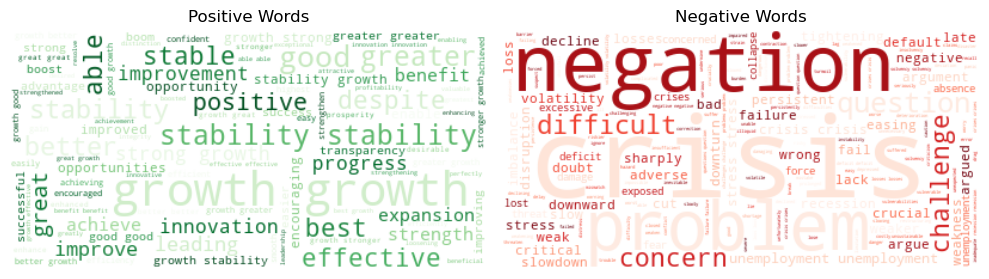

In [144]:
# Wordclouds for text columns.

from wordcloud import WordCloud

def plot_word_cloud(df, text_column1, text_column2, colormap1='Greens', colormap2='Reds', title1='Word Cloud 1', title2='Word Cloud 2'):
    """
    Plots two word clouds for specified text columns.

    """
    text1 = ' '.join(df[text_column1].sum()) if isinstance(df[text_column1].iloc[0], list) else ' '.join(df[text_column1])
    text2 = ' '.join(df[text_column2].sum()) if isinstance(df[text_column2].iloc[0], list) else ' '.join(df[text_column2])

    # Generate and plot word clouds
    wordcloud1 = WordCloud(background_color='white', colormap=colormap1).generate(text1)
    wordcloud2 = WordCloud(background_color='white', colormap=colormap2).generate(text2)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud1, interpolation='bilinear')
    plt.axis('off')
    plt.title(title1)

    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud2, interpolation='bilinear')
    plt.axis('off')
    plt.title(title2)

    plt.tight_layout()
    plt.show()

# Example usage
plot_word_cloud(speeches, 'pos_words', 'neg_words', title1='Positive Words', title2='Negative Words')



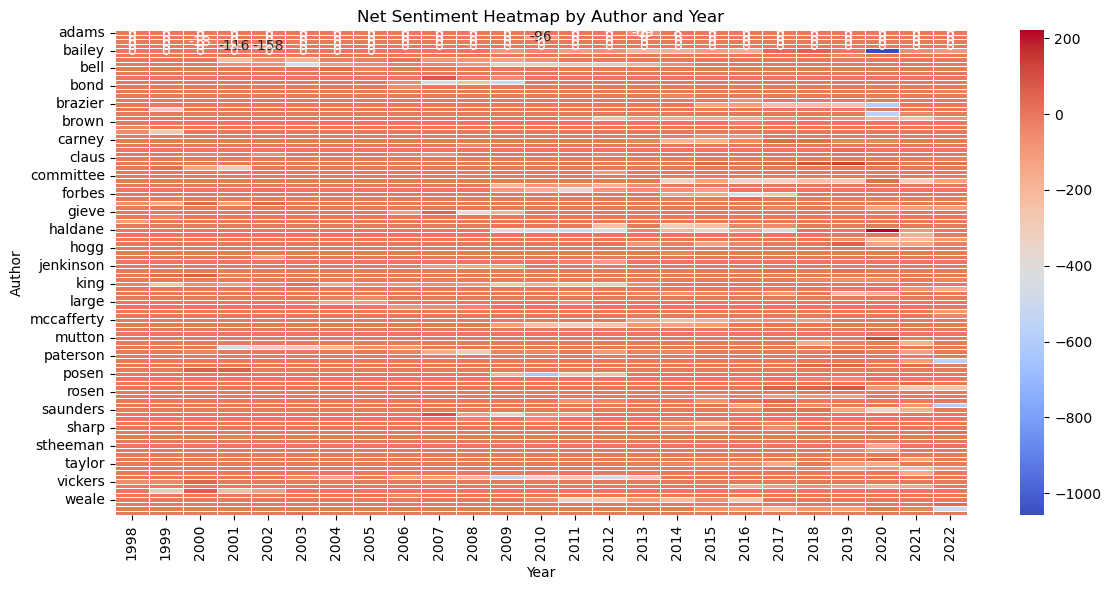

In [146]:
# Heatmap for Pivoted Data
def plot_heatmap(df, index_column, columns_column, values_column, title="Heatmap", cmap='coolwarm'):
    """
    Creates a heatmap for pivoted data.
    """
    pivot_data = df.pivot_table(values=values_column, index=index_column, columns=columns_column, aggfunc='sum', fill_value=0)
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_data, cmap=cmap, annot=True, fmt=".0f", linewidths=0.5)
    plt.title(title)
    plt.xlabel(columns_column.capitalize())
    plt.ylabel(index_column.capitalize())
    plt.tight_layout()
    plt.show()

# Example usage
plot_heatmap(speeches, 'author', 'year', 'net_sentiment', title="Net Sentiment Heatmap by Author and Year")


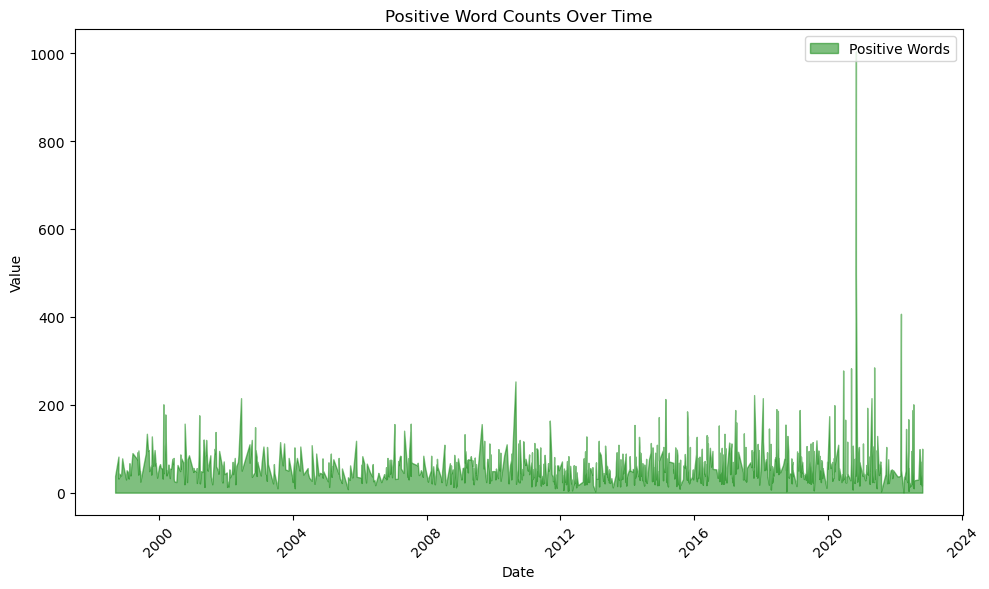

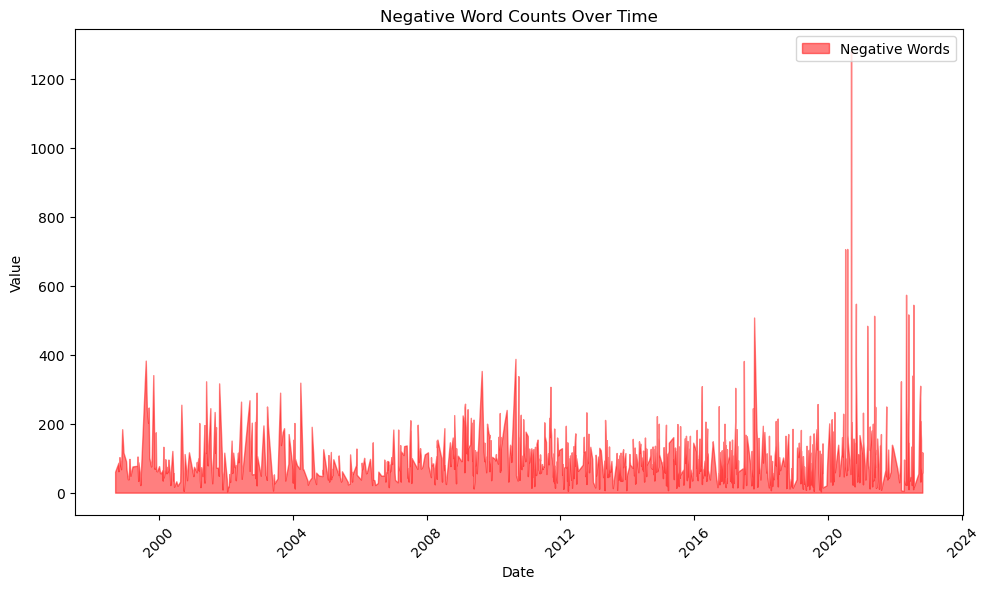

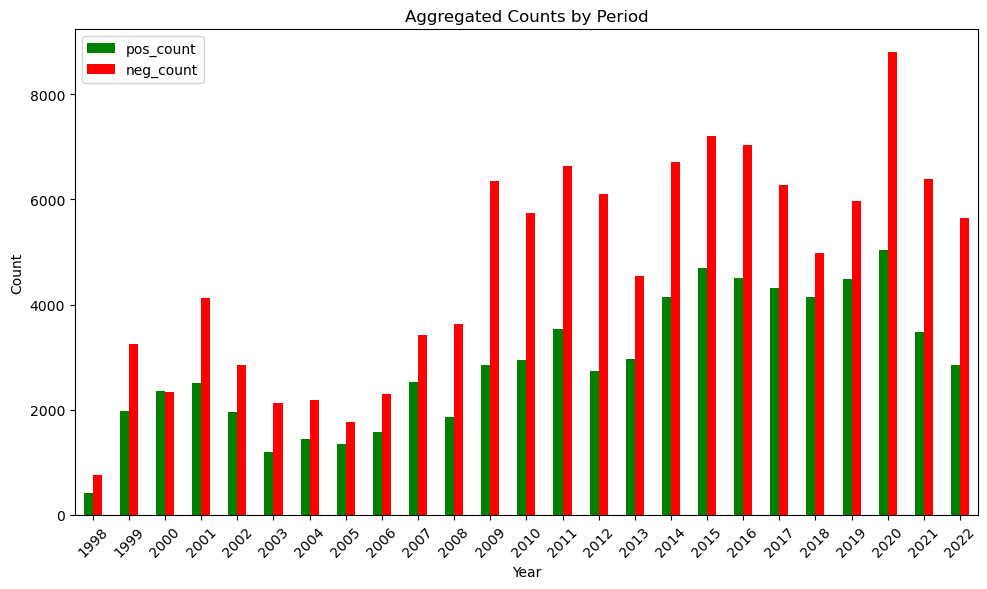

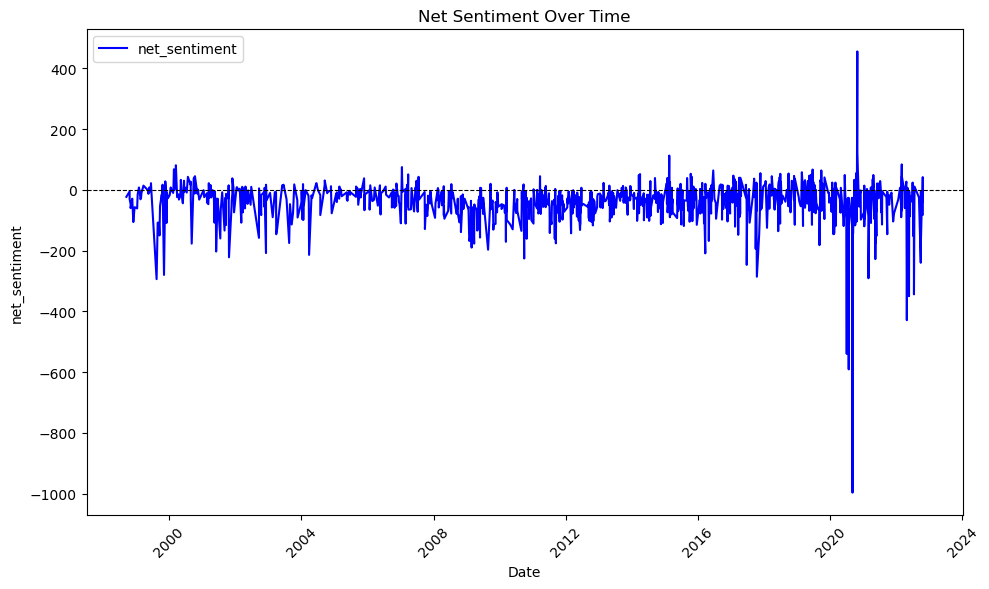

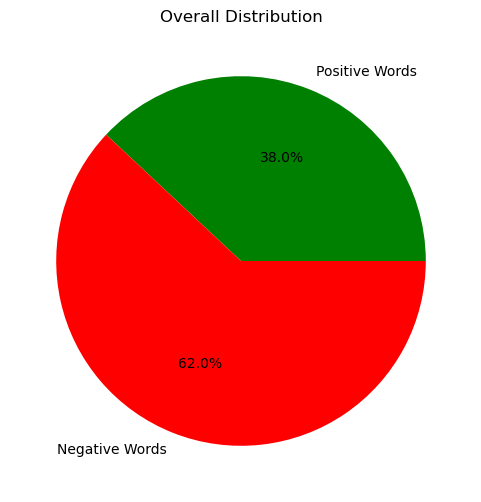

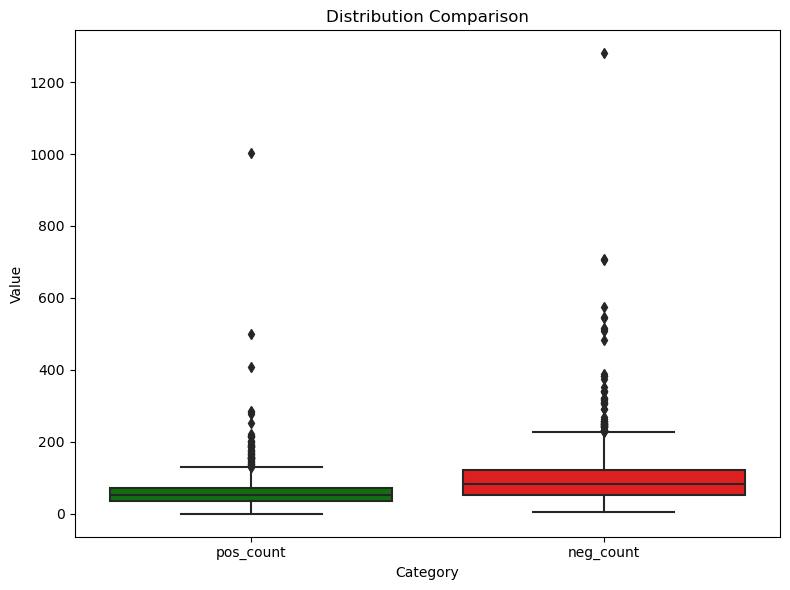

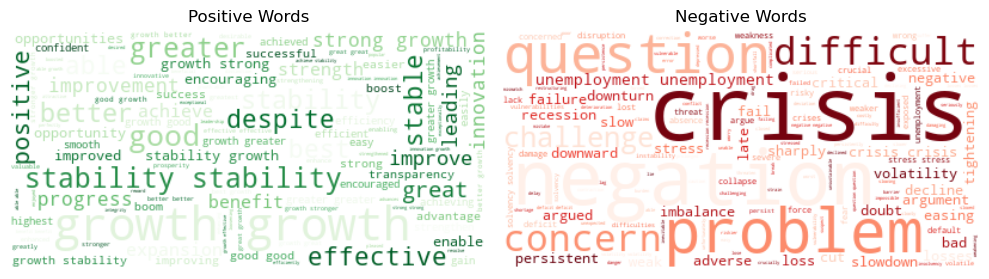

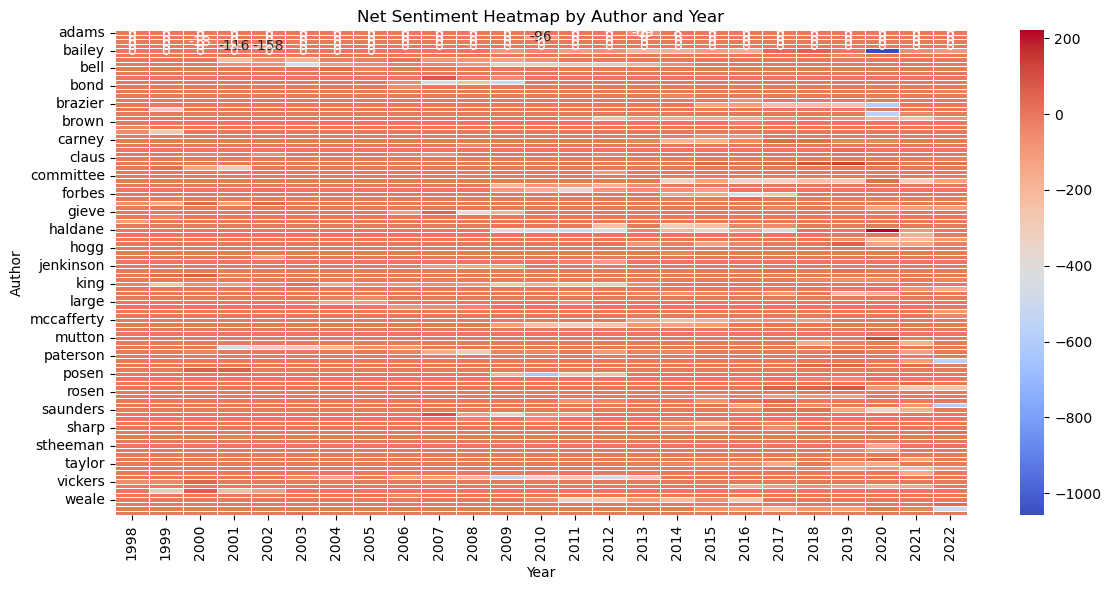

Plots saved to loughran_mcdonald_sentimentscore.pdf


In [148]:
# Create a PDF.
# Define a list of plotting functions with their arguments
plot_functions = [
    lambda: plot_stacked_area(df=speeches, date_column='date', columns=['pos_count'], labels=['Positive Words'], colors=['green'], title="Positive Word Counts Over Time"),
    lambda: plot_stacked_area(df=speeches, date_column='date', columns=['neg_count'], labels=['Negative Words'], colors=['red'], title="Negative Word Counts Over Time"),
    lambda: plot_bar_aggregated_counts(speeches, 'date', ['pos_count', 'neg_count'], period='year', labels=['Positive Words', 'Negative Words'], colors=['green', 'red']),
    lambda:plot_line_over_time(speeches, 'date', 'net_sentiment', title="Net Sentiment Over Time", line_color='blue'),
    lambda: plot_pie_chart(speeches, ['pos_count', 'neg_count'], labels=['Positive Words', 'Negative Words'], colors=['green', 'red']),
    lambda: plot_box_plot(speeches, ['pos_count', 'neg_count'], labels=['Positive Words', 'Negative Words'], colors={'pos_count': 'green', 'neg_count': 'red'}),
    lambda: plot_word_cloud(speeches, 'pos_words', 'neg_words', title1='Positive Words', title2='Negative Words'),
    lambda: plot_heatmap(speeches, 'author', 'year', 'net_sentiment', title="Net Sentiment Heatmap by Author and Year")
]

# Save plots to a single PDF
save_plots_to_pdf(plot_functions, pdf_path="loughran_mcdonald_sentimentscore.pdf")


**[Table of Contents](#Table_of_contents)**